# References

- http://allselenium.info/working-with-checkboxes-using-python-selenium-webdriver/ 
- https://github.com/BryanBumgardner/gutenburg_nlp - elizabethan stop words
- http://brandonrose.org/clustering - structure of stemming and tokenizing for visualization
- https://machinelearningmastery.com/save-load-keras-deep-learning-models/ various save methods for keras models
- https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0 - for neural network adjustment for skew
- Tsai, A.C., Liou, M., Simak, M., Cheng, P.E., On hyperbolictransformations to normality. Computational Statistics and Data Analysis (2017),http://dx.doi.org/10.1016/j.csda.2017.06.001
- Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017). Self-Normalizing Neural Networks. In Advances in Neural Information Processing Systems (NIPS).
- https://medium.com/@mikaelagurney/add-dynamic-components-to-your-html-templates-using-form-s-flask-and-jinja-59b4169ec3e1 for dynamic page loading without javascript using jinja

# Obtain

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pickle
from math import floor
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
import re
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import TextTilingTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import random
from keras import models, layers, optimizers
from keras.models import load_model

Using TensorFlow backend.


## Full Texts

### Acquire Available Titles, Authors, and URLs

In [2]:
def get_titles_and_urls(website_list):
    '''To acquire a list of titles and website extenstions for gutenberg.org from the Bookshelves part of the website. 
    Requires a list of website urls to be passed in. 
    Returns titles and link extensions'''
    titles = []
    links = []
    for counter, website in enumerate(website_list):
        driver = webdriver.Firefox()
        driver.implicitly_wait(5)
        driver.get(website)
        for x, y  in enumerate(driver.find_elements_by_xpath('./html/body/div[1]/div[2]/div[2]/div/ul/li')):
            try:
                if [i.get_attribute('alt') for i in y.find_elements_by_xpath('./a[@class="image"]/img')][0] == 'BookIcon.png':
                    titles.append(y.find_elements_by_xpath('./a')[0].text)
                    links.append(y.find_elements_by_xpath('./a')[0].get_attribute('href'))
                else:
                    continue
            except:
                continue
        driver.quit()
        print('Website', counter+1, 'information acquired!')
    print('Is length of titles scrapped and links scrapped equal?', len(titles)==len(links))
    return titles, links

In [3]:
websites = ["https://www.gutenberg.org/wiki/Children%27s_Literature_(Bookshelf)", 
            "https://www.gutenberg.org/wiki/Children%27s_Fiction_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Adventure_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Fantasy_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Humor_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Mystery_Fiction_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Movie_Books_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Science_Fiction_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Children%27s_History_(Bookshelf)",
            "https://www.gutenberg.org/wiki/Plays_(Bookshelf)"]
titles, links = get_titles_and_urls(websites)

Website 1 information acquired!
Website 2 information acquired!
Website 3 information acquired!
Website 4 information acquired!
Website 5 information acquired!
Website 6 information acquired!
Website 7 information acquired!
Website 8 information acquired!
Website 9 information acquired!
Website 10 information acquired!
Is length of titles scrapped and links scrapped equal? True


### Prep URLs for Webscrapping

In [4]:
links_to_search = []
for x in links:
    links_to_search.append(x.split('/')[4])
len(links_to_search)

2437

### Webscrapping for Full Texts

In [5]:
special_cases = [57, 158, 189, 189, 590, 941, 2175]
for x in special_cases:
    titles.pop(x)
    links_to_search.pop(x)

In [6]:
texts = []
urls_used = []
urls_not_used = []
for i in range(0, len(links_to_search)):
    to_find = links_to_search[i]
    print(i, to_find)
    try:
        driver = webdriver.Firefox()
        driver.implicitly_wait(5)
        driver.get("https://www.gutenberg.org/ebooks/"+to_find+".txt.utf-8")
        text = driver.find_element_by_xpath('//pre')
        texts.append(text.text)
        driver.quit()
        urls_used.append(i)
        print('Text acquired!')
    except NoSuchElementException as inst:
        print(inst)          # __str__ allows args to be printed directly,
        driver = webdriver.Firefox()
        driver.implicitly_wait(5)
        driver.get("https://www.gutenberg.org/files/"+to_find+"/"+to_find+"-0.txt")
        text = driver.find_element_by_xpath('//pre')
        texts.append(text.text)
        driver.quit()
        urls_used.append(i)
        print('Text acquired!')
    driver.quit()

0 22234
Text acquired!
1 2726
Text acquired!
2 163
Text acquired!
3 5830
Text acquired!
4 2786
Text acquired!
5 3499
Text acquired!
6 10360
Text acquired!
7 2788
Text acquired!
8 514
Text acquired!
9 7425
Text acquired!
10 5352
Text acquired!
11 3806
Text acquired!
12 8188
Text acquired!
13 2787
Text acquired!
14 17337
Text acquired!
15 21946
Text acquired!
16 2804
Text acquired!
17 22022
Text acquired!
18 3795
Text acquired!
19 16
Text acquired!
20 4357
Text acquired!
21 22566
Text acquired!
22 517
Text acquired!
23 518
Text acquired!
24 961
Text acquired!
25 519
Text acquired!
26 520
Text acquired!
27 25519
Text acquired!
28 24459
Text acquired!
29 419
Text acquired!
30 54
Text acquired!
31 5660
Text acquired!
32 22225
Text acquired!
33 436
Text acquired!
34 5312
Text acquired!
35 486
Text acquired!
36 955
Text acquired!
37 25581
Text acquired!
38 485
Text acquired!
39 957
Text acquired!
40 4358
Text acquired!
41 4356
Text acquired!
42 16259
Text acquired!
43 956
Text acquired!
44 96

330 21719
Text acquired!
331 23372
Text acquired!
332 21823
Text acquired!
333 23267
Text acquired!
334 21720
Text acquired!
335 23262
Text acquired!
336 21721
Text acquired!
337 21725
Text acquired!
338 21710
Text acquired!
339 21726
Text acquired!
340 21727
Text acquired!
341 10929
Text acquired!
342 21729
Text acquired!
343 23373
Text acquired!
344 21730
Text acquired!
345 23492
Text acquired!
346 23380
Text acquired!
347 21202
Text acquired!
348 21735
Text acquired!
349 21732
Text acquired!
350 23505
Text acquired!
351 23263
Text acquired!
352 21737
Text acquired!
353 23384
Text acquired!
354 21733
Text acquired!
355 15689
Text acquired!
356 21734
Text acquired!
357 21736
Text acquired!
358 23389
Text acquired!
359 21757
Text acquired!
360 21758
Text acquired!
361 21738
Text acquired!
362 21739
Text acquired!
363 21705
Text acquired!
364 21740
Text acquired!
365 21741
Text acquired!
366 21742
Text acquired!
367 21743
Text acquired!
368 21744
Text acquired!
369 21695
Text acquired!


654 288
Text acquired!
655 11752
Text acquired!
656 9608
Text acquired!
657 9663
Text acquired!
658 10882
Text acquired!
659 11639
Text acquired!
660 8715
Text acquired!
661 9829
Text acquired!
662 8771
Text acquired!
663 9488
Text acquired!
664 10041
Text acquired!
665 17134
Text acquired!
666 2414
Text acquired!
667 831
Text acquired!
668 15551
Text acquired!
669 16435
Text acquired!
670 7477
Text acquired!
671 4282
Text acquired!
672 8129
Text acquired!
673 7838
Text acquired!
674 8395
Text acquired!
675 1311
Text acquired!
676 11283
Text acquired!
677 19393
Message: Unable to locate element: //pre

Text acquired!
678 13664
Text acquired!
679 10806
Text acquired!
680 11440
Text acquired!
681 5713
Text acquired!
682 13821
Text acquired!
683 8183
Text acquired!
684 13820
Text acquired!
685 19959
Text acquired!
686 19973
Text acquired!
687 19976
Text acquired!
688 11097
Text acquired!
689 10662
Text acquired!
690 10002
Text acquired!
691 12753
Text acquired!
692 6582
Text acquired!
693

983 41064
Text acquired!
984 32436
Text acquired!
985 30971
Text acquired!
986 51650
Text acquired!
987 51184
Text acquired!
988 22239
Text acquired!
989 31501
Text acquired!
990 37653
Text acquired!
991 29542
Text acquired!
992 51273
Text acquired!
993 27392
Text acquired!
994 29303
Text acquired!
995 51397
Text acquired!
996 51132
Text acquired!
997 604
Text acquired!
998 29618
Text acquired!
999 23688
Text acquired!
1000 31840
Text acquired!
1001 30427
Text acquired!
1002 31547
Text acquired!
1003 1607
Text acquired!
1004 51274
Text acquired!
1005 24517
Text acquired!
1006 51129
Text acquired!
1007 23148
Text acquired!
1008 51546
Text acquired!
1009 29623
Text acquired!
1010 8681
Text acquired!
1011 51823
Text acquired!
1012 51330
Text acquired!
1013 29310
Text acquired!
1014 29298
Text acquired!
1015 30307
Text acquired!
1016 30303
Text acquired!
1017 32029
Text acquired!
1018 29475
Text acquired!
1019 23868
Text acquired!
1020 22701
Text acquired!
1021 7052
Text acquired!
1022 730

Text acquired!
1290 50826
Text acquired!
1291 51396
Text acquired!
1292 50863
Text acquired!
1293 19660
Text acquired!
1294 22754
Text acquired!
1295 50682
Text acquired!
1296 51498
Text acquired!
1297 21582
Text acquired!
1298 32162
Text acquired!
1299 32705
Text acquired!
1300 20856
Text acquired!
1301 52167
Message: Unable to locate element: //pre

Text acquired!
1302 52326
Message: Unable to locate element: //pre

Text acquired!
1303 50571
Text acquired!
1304 31262
Text acquired!
1305 29559
Text acquired!
1306 31962
Text acquired!
1307 51588
Text acquired!
1308 30267
Text acquired!
1309 29140
Text acquired!
1310 28933
Text acquired!
1311 23535
Text acquired!
1312 51256
Text acquired!
1313 51570
Text acquired!
1314 51475
Text acquired!
1315 31897
Text acquired!
1316 24543
Text acquired!
1317 29046
Text acquired!
1318 23831
Text acquired!
1319 4920
Text acquired!
1320 5965
Text acquired!
1321 5699
Text acquired!
1322 5703
Text acquired!
1323 32067
Text acquired!
1324 30251
Text acqui

Text acquired!
1596 23028
Text acquired!
1597 26782
Text acquired!
1598 51781
Text acquired!
1599 51712
Text acquired!
1600 21782
Text acquired!
1601 23379
Text acquired!
1602 51727
Text acquired!
1603 17394
Text acquired!
1604 13841
Text acquired!
1605 29975
Text acquired!
1606 51609
Text acquired!
1607 27665
Text acquired!
1608 22470
Text acquired!
1609 51152
Text acquired!
1610 50819
Text acquired!
1611 51549
Text acquired!
1612 22579
Text acquired!
1613 51436
Text acquired!
1614 51082
Text acquired!
1615 23164
Text acquired!
1616 51353
Text acquired!
1617 51493
Text acquired!
1618 51530
Text acquired!
1619 50753
Text acquired!
1620 29662
Text acquired!
1621 51101
Text acquired!
1622 25024
Text acquired!
1623 23162
Text acquired!
1624 51461
Text acquired!
1625 51380
Text acquired!
1626 29504
Text acquired!
1627 50905
Text acquired!
1628 24104
Text acquired!
1629 23439
Text acquired!
1630 24149
Text acquired!
1631 42901
Text acquired!
1632 51782
Text acquired!
1633 30408
Text acquire

Text acquired!
1905 30334
Message: Unable to locate element: //pre

Text acquired!
1906 23942
Text acquired!
1907 29027
Text acquired!
1908 24150
Text acquired!
1909 29789
Text acquired!
1910 30242
Text acquired!
1911 29789
Text acquired!
1912 43038
Text acquired!
1913 35103
Text acquired!
1914 49767
Text acquired!
1915 29680
Text acquired!
1916 51170
Text acquired!
1917 51268
Text acquired!
1918 51483
Text acquired!
1919 51008
Text acquired!
1920 29601
Text acquired!
1921 51027
Text acquired!
1922 29620
Text acquired!
1923 19526
Text acquired!
1924 19709
Text acquired!
1925 21092
Text acquired!
1926 18753
Text acquired!
1927 19027
Text acquired!
1928 18786
Text acquired!
1929 18520
Text acquired!
1930 6714
Text acquired!
1931 4994
Text acquired!
1932 7473
Text acquired!
1933 6468
Text acquired!
1934 6717
Text acquired!
1935 14665
Text acquired!
1936 19731
Text acquired!
1937 20132
Text acquired!
1938 51740
Text acquired!
1939 29910
Text acquired!
1940 41029
Text acquired!
1941 51091
T

Text acquired!
2215 22538
Text acquired!
2216 28111
Text acquired!
2217 29832
Text acquired!
2218 27143
Text acquired!
2219 28628
Text acquired!
2220 26917
Text acquired!
2221 11870
Text acquired!
2222 456
Text acquired!
2223 1013
Text acquired!
2224 11696
Text acquired!
2225 159
Text acquired!
2226 12750
Text acquired!
2227 27365
Message: Unable to locate element: //pre

Text acquired!
2228 35
Text acquired!
2229 1743
Text acquired!
2230 36
Text acquired!
2231 775
Text acquired!
2232 12163
Text acquired!
2233 1059
Text acquired!
2234 25862
Text acquired!
2235 26967
Text acquired!
2236 29149
Text acquired!
2237 51663
Text acquired!
2238 29410
Text acquired!
2239 27089
Text acquired!
2240 51687
Text acquired!
2241 30474
Text acquired!
2242 24418
Text acquired!
2243 50923
Text acquired!
2244 27019
Text acquired!
2245 50713
Text acquired!
2246 33644
Text acquired!
2247 51232
Text acquired!
2248 24392
Text acquired!
2249 29240
Text acquired!
2250 50138
Text acquired!
2251 32563
Text acquir

In [7]:
len(texts)

2430

In [8]:
# file = open('full_texts.pickle', 'wb')

In [9]:
# pickle.dump([titles, texts], file)

In [10]:
# file.close()

## Lexile Levels

In [8]:
file = open('full_texts.pickle', 'rb')

In [9]:
full_text_titles, full_text_texts = pickle.load(file)

In [10]:
file.close()

In [11]:
driver = webdriver.Firefox()
driver.implicitly_wait(5)
driver.get("https://hub.lexile.com/find-a-book/search")
analytics = driver.find_element_by_xpath('//label[@for="checkbox_1"]')
result = analytics.is_selected()
if result:
    print('Checkbox already selected')
else:
    analytics.click()
    print('Analytics Checkbox deselected.')
save_analytics_button = driver.find_element_by_xpath('//button[text()="Save Preferences"]')
save_analytics_button.click()

Analytics Checkbox deselected.


In [12]:
books = []
authors = []
lexiles = []

In [13]:
for x in range(0, len(full_text_titles)):
    print(x)
    value = str(full_text_titles[x]).replace("/", ' ').replace('!', '')
    search_bar = driver.find_element_by_xpath('//input[@name="quickSearch"]')
    search_bar.send_keys(value)
    search_button = driver.find_element_by_xpath('//button[text()="Search"]')
    search_button.click()
    print('Finding books')
    titles = driver.find_elements_by_xpath('//*[@data-testid="book-title"]')
    book_titles = []
    for result in titles:
        book_titles.append(result.text)
    print('Finding authors')
    authors_of_books = driver.find_elements_by_xpath('//*[@data-testid="book-authors"]')
    book_authors = []
    for result in authors_of_books:
        book_authors.append(result.text)
    print('Finding levels')
    levels = driver.find_elements_by_class_name('sc-iFMziU.ixIPnd')
    lexile_levels = []
    for result in levels:
        lexile_levels.append(result.text)
    books.append(book_titles)
    authors.append(book_authors)
    lexiles.append(lexile_levels)
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.element_to_be_clickable((By.XPATH, '//button[text()="New Search"]')))
    element.click()
driver.close()

0
Finding books
Finding authors
Finding levels
1
Finding books
Finding authors
Finding levels
2
Finding books
Finding authors
Finding levels
3
Finding books
Finding authors
Finding levels
4
Finding books
Finding authors
Finding levels
5
Finding books
Finding authors
Finding levels
6
Finding books
Finding authors
Finding levels
7
Finding books
Finding authors
Finding levels
8
Finding books
Finding authors
Finding levels
9
Finding books
Finding authors
Finding levels
10
Finding books
Finding authors
Finding levels
11
Finding books
Finding authors
Finding levels
12
Finding books
Finding authors
Finding levels
13
Finding books
Finding authors
Finding levels
14
Finding books
Finding authors
Finding levels
15
Finding books
Finding authors
Finding levels
16
Finding books
Finding authors
Finding levels
17
Finding books
Finding authors
Finding levels
18
Finding books
Finding authors
Finding levels
19
Finding books
Finding authors
Finding levels
20
Finding books
Finding authors
Finding levels
21

170
Finding books
Finding authors
Finding levels
171
Finding books
Finding authors
Finding levels
172
Finding books
Finding authors
Finding levels
173
Finding books
Finding authors
Finding levels
174
Finding books
Finding authors
Finding levels
175
Finding books
Finding authors
Finding levels
176
Finding books
Finding authors
Finding levels
177
Finding books
Finding authors
Finding levels
178
Finding books
Finding authors
Finding levels
179
Finding books
Finding authors
Finding levels
180
Finding books
Finding authors
Finding levels
181
Finding books
Finding authors
Finding levels
182
Finding books
Finding authors
Finding levels
183
Finding books
Finding authors
Finding levels
184
Finding books
Finding authors
Finding levels
185
Finding books
Finding authors
Finding levels
186
Finding books
Finding authors
Finding levels
187
Finding books
Finding authors
Finding levels
188
Finding books
Finding authors
Finding levels
189
Finding books
Finding authors
Finding levels
190
Finding books
Fi

Finding authors
Finding levels
338
Finding books
Finding authors
Finding levels
339
Finding books
Finding authors
Finding levels
340
Finding books
Finding authors
Finding levels
341
Finding books
Finding authors
Finding levels
342
Finding books
Finding authors
Finding levels
343
Finding books
Finding authors
Finding levels
344
Finding books
Finding authors
Finding levels
345
Finding books
Finding authors
Finding levels
346
Finding books
Finding authors
Finding levels
347
Finding books
Finding authors
Finding levels
348
Finding books
Finding authors
Finding levels
349
Finding books
Finding authors
Finding levels
350
Finding books
Finding authors
Finding levels
351
Finding books
Finding authors
Finding levels
352
Finding books
Finding authors
Finding levels
353
Finding books
Finding authors
Finding levels
354
Finding books
Finding authors
Finding levels
355
Finding books
Finding authors
Finding levels
356
Finding books
Finding authors
Finding levels
357
Finding books
Finding authors
Find

Finding levels
505
Finding books
Finding authors
Finding levels
506
Finding books
Finding authors
Finding levels
507
Finding books
Finding authors
Finding levels
508
Finding books
Finding authors
Finding levels
509
Finding books
Finding authors
Finding levels
510
Finding books
Finding authors
Finding levels
511
Finding books
Finding authors
Finding levels
512
Finding books
Finding authors
Finding levels
513
Finding books
Finding authors
Finding levels
514
Finding books
Finding authors
Finding levels
515
Finding books
Finding authors
Finding levels
516
Finding books
Finding authors
Finding levels
517
Finding books
Finding authors
Finding levels
518
Finding books
Finding authors
Finding levels
519
Finding books
Finding authors
Finding levels
520
Finding books
Finding authors
Finding levels
521
Finding books
Finding authors
Finding levels
522
Finding books
Finding authors
Finding levels
523
Finding books
Finding authors
Finding levels
524
Finding books
Finding authors
Finding levels
525
F

672
Finding books
Finding authors
Finding levels
673
Finding books
Finding authors
Finding levels
674
Finding books
Finding authors
Finding levels
675
Finding books
Finding authors
Finding levels
676
Finding books
Finding authors
Finding levels
677
Finding books
Finding authors
Finding levels
678
Finding books
Finding authors
Finding levels
679
Finding books
Finding authors
Finding levels
680
Finding books
Finding authors
Finding levels
681
Finding books
Finding authors
Finding levels
682
Finding books
Finding authors
Finding levels
683
Finding books
Finding authors
Finding levels
684
Finding books
Finding authors
Finding levels
685
Finding books
Finding authors
Finding levels
686
Finding books
Finding authors
Finding levels
687
Finding books
Finding authors
Finding levels
688
Finding books
Finding authors
Finding levels
689
Finding books
Finding authors
Finding levels
690
Finding books
Finding authors
Finding levels
691
Finding books
Finding authors
Finding levels
692
Finding books
Fi

Finding authors
Finding levels
840
Finding books
Finding authors
Finding levels
841
Finding books
Finding authors
Finding levels
842
Finding books
Finding authors
Finding levels
843
Finding books
Finding authors
Finding levels
844
Finding books
Finding authors
Finding levels
845
Finding books
Finding authors
Finding levels
846
Finding books
Finding authors
Finding levels
847
Finding books
Finding authors
Finding levels
848
Finding books
Finding authors
Finding levels
849
Finding books
Finding authors
Finding levels
850
Finding books
Finding authors
Finding levels
851
Finding books
Finding authors
Finding levels
852
Finding books
Finding authors
Finding levels
853
Finding books
Finding authors
Finding levels
854
Finding books
Finding authors
Finding levels
855
Finding books
Finding authors
Finding levels
856
Finding books
Finding authors
Finding levels
857
Finding books
Finding authors
Finding levels
858
Finding books
Finding authors
Finding levels
859
Finding books
Finding authors
Find

1007
Finding books
Finding authors
Finding levels
1008
Finding books
Finding authors
Finding levels
1009
Finding books
Finding authors
Finding levels
1010
Finding books
Finding authors
Finding levels
1011
Finding books
Finding authors
Finding levels
1012
Finding books
Finding authors
Finding levels
1013
Finding books
Finding authors
Finding levels
1014
Finding books
Finding authors
Finding levels
1015
Finding books
Finding authors
Finding levels
1016
Finding books
Finding authors
Finding levels
1017
Finding books
Finding authors
Finding levels
1018
Finding books
Finding authors
Finding levels
1019
Finding books
Finding authors
Finding levels
1020
Finding books
Finding authors
Finding levels
1021
Finding books
Finding authors
Finding levels
1022
Finding books
Finding authors
Finding levels
1023
Finding books
Finding authors
Finding levels
1024
Finding books
Finding authors
Finding levels
1025
Finding books
Finding authors
Finding levels
1026
Finding books
Finding authors
Finding levels


1171
Finding books
Finding authors
Finding levels
1172
Finding books
Finding authors
Finding levels
1173
Finding books
Finding authors
Finding levels
1174
Finding books
Finding authors
Finding levels
1175
Finding books
Finding authors
Finding levels
1176
Finding books
Finding authors
Finding levels
1177
Finding books
Finding authors
Finding levels
1178
Finding books
Finding authors
Finding levels
1179
Finding books
Finding authors
Finding levels
1180
Finding books
Finding authors
Finding levels
1181
Finding books
Finding authors
Finding levels
1182
Finding books
Finding authors
Finding levels
1183
Finding books
Finding authors
Finding levels
1184
Finding books
Finding authors
Finding levels
1185
Finding books
Finding authors
Finding levels
1186
Finding books
Finding authors
Finding levels
1187
Finding books
Finding authors
Finding levels
1188
Finding books
Finding authors
Finding levels
1189
Finding books
Finding authors
Finding levels
1190
Finding books
Finding authors
Finding levels


1335
Finding books
Finding authors
Finding levels
1336
Finding books
Finding authors
Finding levels
1337
Finding books
Finding authors
Finding levels
1338
Finding books
Finding authors
Finding levels
1339
Finding books
Finding authors
Finding levels
1340
Finding books
Finding authors
Finding levels
1341
Finding books
Finding authors
Finding levels
1342
Finding books
Finding authors
Finding levels
1343
Finding books
Finding authors
Finding levels
1344
Finding books
Finding authors
Finding levels
1345
Finding books
Finding authors
Finding levels
1346
Finding books
Finding authors
Finding levels
1347
Finding books
Finding authors
Finding levels
1348
Finding books
Finding authors
Finding levels
1349
Finding books
Finding authors
Finding levels
1350
Finding books
Finding authors
Finding levels
1351
Finding books
Finding authors
Finding levels
1352
Finding books
Finding authors
Finding levels
1353
Finding books
Finding authors
Finding levels
1354
Finding books
Finding authors
Finding levels


1499
Finding books
Finding authors
Finding levels
1500
Finding books
Finding authors
Finding levels
1501
Finding books
Finding authors
Finding levels
1502
Finding books
Finding authors
Finding levels
1503
Finding books
Finding authors
Finding levels
1504
Finding books
Finding authors
Finding levels
1505
Finding books
Finding authors
Finding levels
1506
Finding books
Finding authors
Finding levels
1507
Finding books
Finding authors
Finding levels
1508
Finding books
Finding authors
Finding levels
1509
Finding books
Finding authors
Finding levels
1510
Finding books
Finding authors
Finding levels
1511
Finding books
Finding authors
Finding levels
1512
Finding books
Finding authors
Finding levels
1513
Finding books
Finding authors
Finding levels
1514
Finding books
Finding authors
Finding levels
1515
Finding books
Finding authors
Finding levels
1516
Finding books
Finding authors
Finding levels
1517
Finding books
Finding authors
Finding levels
1518
Finding books
Finding authors
Finding levels


1663
Finding books
Finding authors
Finding levels
1664
Finding books
Finding authors
Finding levels
1665
Finding books
Finding authors
Finding levels
1666
Finding books
Finding authors
Finding levels
1667
Finding books
Finding authors
Finding levels
1668
Finding books
Finding authors
Finding levels
1669
Finding books
Finding authors
Finding levels
1670
Finding books
Finding authors
Finding levels
1671
Finding books
Finding authors
Finding levels
1672
Finding books
Finding authors
Finding levels
1673
Finding books
Finding authors
Finding levels
1674
Finding books
Finding authors
Finding levels
1675
Finding books
Finding authors
Finding levels
1676
Finding books
Finding authors
Finding levels
1677
Finding books
Finding authors
Finding levels
1678
Finding books
Finding authors
Finding levels
1679
Finding books
Finding authors
Finding levels
1680
Finding books
Finding authors
Finding levels
1681
Finding books
Finding authors
Finding levels
1682
Finding books
Finding authors
Finding levels


1827
Finding books
Finding authors
Finding levels
1828
Finding books
Finding authors
Finding levels
1829
Finding books
Finding authors
Finding levels
1830
Finding books
Finding authors
Finding levels
1831
Finding books
Finding authors
Finding levels
1832
Finding books
Finding authors
Finding levels
1833
Finding books
Finding authors
Finding levels
1834
Finding books
Finding authors
Finding levels
1835
Finding books
Finding authors
Finding levels
1836
Finding books
Finding authors
Finding levels
1837
Finding books
Finding authors
Finding levels
1838
Finding books
Finding authors
Finding levels
1839
Finding books
Finding authors
Finding levels
1840
Finding books
Finding authors
Finding levels
1841
Finding books
Finding authors
Finding levels
1842
Finding books
Finding authors
Finding levels
1843
Finding books
Finding authors
Finding levels
1844
Finding books
Finding authors
Finding levels
1845
Finding books
Finding authors
Finding levels
1846
Finding books
Finding authors
Finding levels


1991
Finding books
Finding authors
Finding levels
1992
Finding books
Finding authors
Finding levels
1993
Finding books
Finding authors
Finding levels
1994
Finding books
Finding authors
Finding levels
1995
Finding books
Finding authors
Finding levels
1996
Finding books
Finding authors
Finding levels
1997
Finding books
Finding authors
Finding levels
1998
Finding books
Finding authors
Finding levels
1999
Finding books
Finding authors
Finding levels
2000
Finding books
Finding authors
Finding levels
2001
Finding books
Finding authors
Finding levels
2002
Finding books
Finding authors
Finding levels
2003
Finding books
Finding authors
Finding levels
2004
Finding books
Finding authors
Finding levels
2005
Finding books
Finding authors
Finding levels
2006
Finding books
Finding authors
Finding levels
2007
Finding books
Finding authors
Finding levels
2008
Finding books
Finding authors
Finding levels
2009
Finding books
Finding authors
Finding levels
2010
Finding books
Finding authors
Finding levels


2155
Finding books
Finding authors
Finding levels
2156
Finding books
Finding authors
Finding levels
2157
Finding books
Finding authors
Finding levels
2158
Finding books
Finding authors
Finding levels
2159
Finding books
Finding authors
Finding levels
2160
Finding books
Finding authors
Finding levels
2161
Finding books
Finding authors
Finding levels
2162
Finding books
Finding authors
Finding levels
2163
Finding books
Finding authors
Finding levels
2164
Finding books
Finding authors
Finding levels
2165
Finding books
Finding authors
Finding levels
2166
Finding books
Finding authors
Finding levels
2167
Finding books
Finding authors
Finding levels
2168
Finding books
Finding authors
Finding levels
2169
Finding books
Finding authors
Finding levels
2170
Finding books
Finding authors
Finding levels
2171
Finding books
Finding authors
Finding levels
2172
Finding books
Finding authors
Finding levels
2173
Finding books
Finding authors
Finding levels
2174
Finding books
Finding authors
Finding levels


2319
Finding books
Finding authors
Finding levels
2320
Finding books
Finding authors
Finding levels
2321
Finding books
Finding authors
Finding levels
2322
Finding books
Finding authors
Finding levels
2323
Finding books
Finding authors
Finding levels
2324
Finding books
Finding authors
Finding levels
2325
Finding books
Finding authors
Finding levels
2326
Finding books
Finding authors
Finding levels
2327
Finding books
Finding authors
Finding levels
2328
Finding books
Finding authors
Finding levels
2329
Finding books
Finding authors
Finding levels
2330
Finding books
Finding authors
Finding levels
2331
Finding books
Finding authors
Finding levels
2332
Finding books
Finding authors
Finding levels
2333
Finding books
Finding authors
Finding levels
2334
Finding books
Finding authors
Finding levels
2335
Finding books
Finding authors
Finding levels
2336
Finding books
Finding authors
Finding levels
2337
Finding books
Finding authors
Finding levels
2338
Finding books
Finding authors
Finding levels


In [14]:
# file = open('lexile_levels.pickle', 'wb')

In [15]:
# pickle.dump([books, authors, lexiles], file)

In [16]:
# file.close()

# Scrub

In [4]:
file = open('full_texts.pickle', 'rb')

In [5]:
full_text_titles, full_text_texts = pickle.load(file)

In [6]:
file.close()

In [7]:
parse1 = []
parse2 = []
parse3 = []
parse4 = []
titles_from_text = []
for x in range(0, len(full_text_texts)):
#     print('1. removing license agreement at end')
    parse1.append(re.sub('\n', ' ', full_text_texts[x]))
#     print('2. removing extras at the end of the text')
    if len(parse1[x].split('THE END'))==2:
        parse2.append(parse1[x].split('THE END')[0])
    elif len(parse1[x].split("End of the Project Gutenberg EBook"))==2:
        parse2.append(parse1[x].split("End of the Project Gutenberg EBook")[0])
    elif len(parse1[x].split('The End'))==2:
        parse2.append(parse1[x].split('The End')[0])
    elif len(parse1[x].split('End of Project Gutenberg\'s'))==2:
        parse2.append(parse1[x].split('End of Project Gutenberg\'s')[0])
    elif len(parse1[x].split('END OF THE PROJECT GUTENBERG EBOOK'))==2:
        parse2.append(parse1[x].split('END OF THE PROJECT GUTENBERG EBOOK')[0]) 
    elif len(parse1[x].split('END OF THIS PROJECT GUTENBERG EBOOK'))==2:
        parse2.append(parse1[x].split('END OF THIS PROJECT GUTENBERG EBOOK')[0])
    elif len(parse1[x].split('The Project Gutenberg Etext'))==4:
        parse2.append(parse1[x].split('The Project Gutenberg Etext')[2])
    elif len(parse1[x].split('*Project Gutenberg Etext'))==4:
        parse2.append(parse1[x].split('*Project Gutenberg Etext')[2])
    elif len(parse1[x].split('End of Project Gutenberg Etext'))==2:
        parse2.append(parse1[x].split('End of Project Gutenberg Etext')[0])
    elif len(parse1[x].split('End of this Project Gutenberg Etext'))==2:
        parse2.append(parse1[x].split('End of this Project Gutenberg Etext')[0])
    elif len(parse1[x].split('End of the Project Gutenberg Etext'))==2:
        parse2.append(parse1[x].split('End of the Project Gutenberg Etext')[0])
    elif len(parse1[x].split('FINIS.'))==2:
        parse2.append(parse1[x].split('FINIS.')[0])
    else:
        print('problem at: ', x)
#     print('3. removing anything at ebook related at beginning of text')
    if len(parse2[x].split('START OF THIS PROJECT GUTENBERG EBOOK'))==2:
        parse3.append(parse2[x].split('START OF THIS PROJECT GUTENBERG EBOOK')[1])
    elif len(parse2[x].split("START OF THE PROJECT GUTENBERG EBOOK"))==2:
        parse3.append(parse2[x].split("START OF THE PROJECT GUTENBERG EBOOK")[1])
    elif len(parse2[x].split("THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED."))==2:
        parse3.append(parse2[x].split("THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED.")[1])
    elif len(parse2[x].split("THE SMALL PRINT! FOR PUBLIC DOMAIN ETEXTS"))==2:
        parse3.append(parse2[x].split("THE SMALL PRINT! FOR PUBLIC DOMAIN ETEXTS")[1].split('*END*')[1])
    elif len(parse2[x].split('START OF THE PROJECT GUTENBERG ETEXT'))==2:
        parse3.append(parse2[x].split('START OF THE PROJECT GUTENBERG ETEXT')[1])
    elif len(parse2[x].split('The Project Gutenberg Etext of'))==3:
        parse3.append(parse2[x].split('The Project Gutenberg Etext of')[2])
    else:
        print('problem at: ', x)
    if len(parse3[x].split('***'))==2:
        parse4.append(parse3[x].split('***')[1])
    elif len(parse3[x].split('***'))==48:
        if len(parse3[x].split('***')[47].split('*'))==2:
            parse4.append(parse3[x].split('***')[47].split('*')[1])
        else:
            parse4.append(parse3[x].split('***')[47])
    elif len(parse3[x].split('***'))==3:
        if len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team'))==2:
            parse4.append(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[1])
        elif len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team'))==1:
            if len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)'))==2:
                parse4.append(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[1])
            elif len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)'))==1:
                if len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('.org'))==2:
                    parse4.append(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('.org')[1])
                elif len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('.ac.uk'))==2:
                    parse4.append(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('.ac.uk')[1])
                elif len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('.edu/women/.'))==2:
                    parse4.append(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('.edu/women/.')[0])
                elif len(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('     '))==839:
                    parse4.append(parse3[x].split('***')[1].split('Online Distributed Proofreading Team')[0].split('.zip)')[0].split('This eBook was')[1])
                else:
                    parse4.append(parse3[x])
            else:
                print('review: ', x)
        else:
            print('look at: ', x)
    elif len(parse3[x].split('***'))==7:
        parse4.append(parse3[x])
    else:
        print('problem at: ', x)
    print('Book number ', x, ' done!')
    titles_from_text.append(parse3[x].split('*** ')[0].strip().title())

Book number  0  done!
Book number  1  done!
Book number  2  done!
Book number  3  done!
Book number  4  done!
Book number  5  done!
Book number  6  done!
Book number  7  done!
Book number  8  done!
Book number  9  done!
Book number  10  done!
Book number  11  done!
Book number  12  done!
Book number  13  done!
Book number  14  done!
Book number  15  done!
Book number  16  done!
Book number  17  done!
Book number  18  done!
Book number  19  done!
Book number  20  done!
Book number  21  done!
Book number  22  done!
Book number  23  done!
Book number  24  done!
Book number  25  done!
Book number  26  done!
Book number  27  done!
Book number  28  done!
Book number  29  done!
Book number  30  done!
Book number  31  done!
Book number  32  done!
Book number  33  done!
Book number  34  done!
Book number  35  done!
Book number  36  done!
Book number  37  done!
Book number  38  done!
Book number  39  done!
Book number  40  done!
Book number  41  done!
Book number  42  done!
Book number  43  done

Book number  405  done!
Book number  406  done!
Book number  407  done!
Book number  408  done!
Book number  409  done!
Book number  410  done!
Book number  411  done!
Book number  412  done!
Book number  413  done!
Book number  414  done!
Book number  415  done!
Book number  416  done!
Book number  417  done!
Book number  418  done!
Book number  419  done!
Book number  420  done!
Book number  421  done!
Book number  422  done!
Book number  423  done!
Book number  424  done!
Book number  425  done!
Book number  426  done!
Book number  427  done!
Book number  428  done!
Book number  429  done!
Book number  430  done!
Book number  431  done!
Book number  432  done!
Book number  433  done!
Book number  434  done!
Book number  435  done!
Book number  436  done!
Book number  437  done!
Book number  438  done!
Book number  439  done!
Book number  440  done!
Book number  441  done!
Book number  442  done!
Book number  443  done!
Book number  444  done!
Book number  445  done!
Book number  446

Book number  878  done!
Book number  879  done!
Book number  880  done!
Book number  881  done!
Book number  882  done!
Book number  883  done!
Book number  884  done!
Book number  885  done!
Book number  886  done!
Book number  887  done!
Book number  888  done!
Book number  889  done!
Book number  890  done!
Book number  891  done!
Book number  892  done!
Book number  893  done!
Book number  894  done!
Book number  895  done!
Book number  896  done!
Book number  897  done!
Book number  898  done!
Book number  899  done!
Book number  900  done!
Book number  901  done!
Book number  902  done!
Book number  903  done!
Book number  904  done!
Book number  905  done!
Book number  906  done!
Book number  907  done!
Book number  908  done!
Book number  909  done!
Book number  910  done!
Book number  911  done!
Book number  912  done!
Book number  913  done!
Book number  914  done!
Book number  915  done!
Book number  916  done!
Book number  917  done!
Book number  918  done!
Book number  919

Book number  1373  done!
Book number  1374  done!
Book number  1375  done!
Book number  1376  done!
Book number  1377  done!
Book number  1378  done!
Book number  1379  done!
Book number  1380  done!
Book number  1381  done!
Book number  1382  done!
Book number  1383  done!
Book number  1384  done!
Book number  1385  done!
Book number  1386  done!
Book number  1387  done!
Book number  1388  done!
Book number  1389  done!
Book number  1390  done!
Book number  1391  done!
Book number  1392  done!
Book number  1393  done!
Book number  1394  done!
Book number  1395  done!
Book number  1396  done!
Book number  1397  done!
Book number  1398  done!
Book number  1399  done!
Book number  1400  done!
Book number  1401  done!
Book number  1402  done!
Book number  1403  done!
Book number  1404  done!
Book number  1405  done!
Book number  1406  done!
Book number  1407  done!
Book number  1408  done!
Book number  1409  done!
Book number  1410  done!
Book number  1411  done!
Book number  1412  done!


Book number  1760  done!
Book number  1761  done!
Book number  1762  done!
Book number  1763  done!
Book number  1764  done!
Book number  1765  done!
Book number  1766  done!
Book number  1767  done!
Book number  1768  done!
Book number  1769  done!
Book number  1770  done!
Book number  1771  done!
Book number  1772  done!
Book number  1773  done!
Book number  1774  done!
Book number  1775  done!
Book number  1776  done!
Book number  1777  done!
Book number  1778  done!
Book number  1779  done!
Book number  1780  done!
Book number  1781  done!
Book number  1782  done!
Book number  1783  done!
Book number  1784  done!
Book number  1785  done!
Book number  1786  done!
Book number  1787  done!
Book number  1788  done!
Book number  1789  done!
Book number  1790  done!
Book number  1791  done!
Book number  1792  done!
Book number  1793  done!
Book number  1794  done!
Book number  1795  done!
Book number  1796  done!
Book number  1797  done!
Book number  1798  done!
Book number  1799  done!


Book number  2174  done!
Book number  2175  done!
Book number  2176  done!
Book number  2177  done!
Book number  2178  done!
problem at:  2179
Book number  2179  done!
Book number  2180  done!
Book number  2181  done!
Book number  2182  done!
Book number  2183  done!
Book number  2184  done!
Book number  2185  done!
Book number  2186  done!
Book number  2187  done!
Book number  2188  done!
Book number  2189  done!
Book number  2190  done!
Book number  2191  done!
Book number  2192  done!
Book number  2193  done!
Book number  2194  done!
Book number  2195  done!
Book number  2196  done!
Book number  2197  done!
Book number  2198  done!
Book number  2199  done!
Book number  2200  done!
Book number  2201  done!
Book number  2202  done!
Book number  2203  done!
Book number  2204  done!
Book number  2205  done!
Book number  2206  done!
Book number  2207  done!
Book number  2208  done!
Book number  2209  done!
Book number  2210  done!
Book number  2211  done!
Book number  2212  done!
Book nu

In [8]:
len(full_text_texts)

2430

In [9]:
len(titles_from_text)

2430

In [10]:
file = open('lexile_levels.pickle', 'rb')

In [11]:
books, authors, lexiles = pickle.load(file)

In [12]:
file.close()

In [265]:
search_results_books = []
for i in range(0, len(books)):
    for j in range(0, len(books[i])):
        if books[i][j] == titles_from_text[i]:
            print(i, j, books[i][j], titles_from_text[i])
#             if j == 0: then append books[i][j] to search_results_books
#             if the above hasn't been done yet, then append books[i][j] to search_results_books
# use break

1 0 Eight Cousins Eight Cousins
2 0 Flower Fables Flower Fables
4 3 Jack And Jill Jack And Jill
7 0 Little Men Little Men
8 0 Little Women Little Women
8 1 Little Women Little Women
8 2 Little Women Little Women
8 3 Little Women Little Women
8 4 Little Women Little Women
8 5 Little Women Little Women
8 6 Little Women Little Women
8 7 Little Women Little Women
8 8 Little Women Little Women
8 9 Little Women Little Women
8 10 Little Women Little Women
8 11 Little Women Little Women
8 12 Little Women Little Women
8 13 Little Women Little Women
8 14 Little Women Little Women
8 15 Little Women Little Women
8 16 Little Women Little Women
11 0 A Modern Cinderella A Modern Cinderella
13 0 An Old-Fashioned Girl An Old-Fashioned Girl
18 0 Under The Lilacs Under The Lilacs
19 0 Peter Pan Peter Pan
19 1 Peter Pan Peter Pan
19 2 Peter Pan Peter Pan
19 3 Peter Pan Peter Pan
19 4 Peter Pan Peter Pan
19 5 Peter Pan Peter Pan
19 6 Peter Pan Peter Pan
19 7 Peter Pan Peter Pan
19 8 Peter Pan Peter Pan
19 

2366 0 The Oregon Trail The Oregon Trail
2366 1 The Oregon Trail The Oregon Trail
2366 2 The Oregon Trail The Oregon Trail
2366 3 The Oregon Trail The Oregon Trail
2366 4 The Oregon Trail The Oregon Trail
2366 5 The Oregon Trail The Oregon Trail
2366 6 The Oregon Trail The Oregon Trail
2366 7 The Oregon Trail The Oregon Trail
2366 8 The Oregon Trail The Oregon Trail
2366 9 The Oregon Trail The Oregon Trail
2366 10 The Oregon Trail The Oregon Trail
2366 11 The Oregon Trail The Oregon Trail
2366 12 The Oregon Trail The Oregon Trail
2366 13 The Oregon Trail The Oregon Trail
2366 14 The Oregon Trail The Oregon Trail
2426 0 The Oedipus Trilogy The Oedipus Trilogy
2428 0 An Ideal Husband An Ideal Husband


In [16]:
search_results_books = []
for i, j in enumerate(books):
    try:
        search_results_books.append(j[0])
    except:
        search_results_books.append('')
search_results_books

['',
 'Eight Cousins',
 'Flower Fables',
 '',
 'Jack and Jill',
 "Jo's Boys",
 '',
 'Little Men',
 'Little Women',
 '',
 '',
 'A Modern Cinderella',
 '',
 'An Old-Fashioned Girl',
 '',
 '',
 'Rose in Bloom',
 '',
 'Under The Lilacs',
 'Peter Pan',
 'Her Stories: African\nAmerican Folktales, F…',
 'Illustrated Odyssey',
 'The Emerald City of Oz',
 'The Enchanted Island\nof Yew',
 'Glinda of Oz',
 '',
 'The Life and\nAdventures of Santa…',
 'The Wizard of Oz',
 'Oz, The Complete\nCollection, Volume 4',
 'The Magic of Oz',
 'Oz, The Complete\nCollection, Volume 1',
 'Mary Louise Loses Her\nManners',
 'Demythologizing the\nRomance of Conquest',
 '',
 '',
 'Ozma of Oz',
 'The Patchwork Girl of\nOz',
 'Oz, The Complete\nCollection, Volume 4',
 'The Wizard of Oz',
 'Oz, The Complete\nCollection, Volume 3',
 'Taffy Trouble',
 'Sky',
 '',
 'Oz, The Complete\nCollection, Volume 3',
 'The Tin Woodman of\nOz',
 '',
 'The Wonderful Wizard\nof Oz',
 'Living Rain Forest, The:\nAn Animal Alphabet…',
 

In [17]:
search_results_lexiles = []
for i, j in enumerate(lexiles):
    try:
        search_results_lexiles.append(j[0])
    except:
        search_results_lexiles.append('')
search_results_lexiles

['',
 '1150L',
 '1200L',
 '',
 'AD550L',
 '1120L',
 '',
 '1150L',
 '790L',
 '',
 '',
 '1210L',
 '',
 '1290L',
 '',
 '',
 '1360L',
 '',
 'AD590L',
 'AD750L',
 '960L',
 '730L',
 '990L',
 '1100L',
 '1130L',
 '',
 '1170L',
 '490L',
 '1100L',
 '1110L',
 '980L',
 '550L',
 '1450L',
 '',
 '',
 '1070L',
 '990L',
 '1100L',
 '460L',
 '1040L',
 '610L',
 '350L',
 '',
 '1040L',
 '1090L',
 '',
 '1030L',
 'IG930L',
 '',
 '1050L',
 '950L',
 '920L',
 '970L',
 '920L',
 '',
 '980L',
 '',
 '',
 '',
 '920L',
 '',
 '',
 '900L',
 '330L',
 '920L',
 '',
 '840L',
 '',
 '',
 '',
 '710L',
 '',
 '',
 '1090L',
 '',
 '620L',
 '810L',
 '',
 '680L',
 '500L',
 '140L',
 '',
 '550L',
 '1000L',
 '950L',
 '',
 '',
 '850L',
 '950L',
 'GN400L',
 '940L',
 '1150L',
 '870L',
 '820L',
 '600L',
 '',
 '1050L',
 '',
 '1020L',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'NP',
 '',
 '',
 '',
 '',
 '',
 '640L',
 '',
 '',
 '',
 '',
 '',
 '1280L',
 '570L',
 '570L',
 '570L',
 '1220L',
 'NC1070L',
 '',
 '570L',
 '570L',
 '1110L',
 '',
 '1060L

In [18]:
length_lexiles = []
for x in search_results_lexiles:
    length_lexiles.append(x!='')
print('Number of scraped texts with associated lexile results: ', sum(length_lexiles))

Number of scraped texts with associated lexile results:  1265


In [19]:
for i in range(0, len(search_results_books)):
    search_results_books[i] = re.sub('\n', ' ', search_results_books[i]).title()
search_results_books[:5]

['', 'Eight Cousins', 'Flower Fables', '', 'Jack And Jill']

In [20]:
labeled_data = pd.DataFrame()
labeled_lexiles = []
labeled_titles = []
labeled_text = []
for x in range(0, len(search_results_lexiles)):
    if str(search_results_books[x]) == str(titles_from_text[x]):
        labeled_lexiles.append(search_results_lexiles[x])
        labeled_titles.append(titles_from_text[x])
        labeled_text.append(full_text_texts[x])
    else:
        print(x, 'No title or lexile match to scrapped material')
labeled_data['Lexiles'] = labeled_lexiles
labeled_data['Titles'] = labeled_titles
labeled_data['Texts'] = labeled_text
print('Number of scraped texts that can be labeled with lexile levels: ', len(labeled_data))
labeled_data.sample(5)

0 No title or lexile match to scrapped material
3 No title or lexile match to scrapped material
6 No title or lexile match to scrapped material
9 No title or lexile match to scrapped material
10 No title or lexile match to scrapped material
12 No title or lexile match to scrapped material
14 No title or lexile match to scrapped material
15 No title or lexile match to scrapped material
17 No title or lexile match to scrapped material
20 No title or lexile match to scrapped material
21 No title or lexile match to scrapped material
25 No title or lexile match to scrapped material
26 No title or lexile match to scrapped material
27 No title or lexile match to scrapped material
28 No title or lexile match to scrapped material
30 No title or lexile match to scrapped material
31 No title or lexile match to scrapped material
32 No title or lexile match to scrapped material
33 No title or lexile match to scrapped material
34 No title or lexile match to scrapped material
37 No title or lexile ma

1806 No title or lexile match to scrapped material
1807 No title or lexile match to scrapped material
1808 No title or lexile match to scrapped material
1809 No title or lexile match to scrapped material
1810 No title or lexile match to scrapped material
1811 No title or lexile match to scrapped material
1812 No title or lexile match to scrapped material
1813 No title or lexile match to scrapped material
1814 No title or lexile match to scrapped material
1816 No title or lexile match to scrapped material
1817 No title or lexile match to scrapped material
1818 No title or lexile match to scrapped material
1819 No title or lexile match to scrapped material
1820 No title or lexile match to scrapped material
1821 No title or lexile match to scrapped material
1822 No title or lexile match to scrapped material
1823 No title or lexile match to scrapped material
1824 No title or lexile match to scrapped material
1825 No title or lexile match to scrapped material
1826 No title or lexile match t

Lexiles                        Titles  \
158    950L   The Island Of Doctor Moreau   
67     960L                The Story Girl   
214  HL680L       The Last Place On Earth   
73     880L  Five Little Peppers Grown Up   
92    1200L            Tarzan Of The Apes   

                                                 Texts  
158  The Project Gutenberg EBook of The Island of D...  
67   The Project Gutenberg EBook of The Story Girl,...  
214  Project Gutenberg's The Last Place on Earth, b...  
73   Project Gutenberg's Five Little Peppers Grown ...  
92   The Project Gutenberg EBook of Tarzan of the A...

In [21]:
print('total labeled titles: ',len(set(labeled_data['Titles'])))

total labeled titles:  262


In [22]:
# nans identification
print(len(labeled_data))
labeled_data.isna().sum()

303


Lexiles    0
Titles     0
Texts      0
dtype: int64

In [23]:
print('duplicated rows: ' + str(labeled_data.duplicated().sum()))

duplicated rows: 36


In [24]:
# code to drop duplicate row if necessary
labeled_data.drop_duplicates(inplace=True)
print('duplicated rows: ', labeled_data.duplicated().sum())
print(len(labeled_data))

duplicated rows:  0
267


In [25]:
labeled_data = labeled_data.reset_index().drop('index', axis=1)

In [26]:
print('total labeled titles: ',len(set(labeled_data['Titles'])))

total labeled titles:  262


In [27]:
# no lexile level --> check titles too
labeled_data = labeled_data.drop([209, 265, 266], axis=0)
labeled_data = labeled_data.reset_index().drop('index', axis=1)

In [28]:
# file = open('labeled_data.pickle', 'wb')

In [29]:
# pickle.dump(labeled_data, file)

In [30]:
# file.close()

## Stopwords

In [34]:
nltk.download('stopwords')
stop_word=nltk.corpus.stopwords.words("english")
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eannefawcett\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
file = open('stopwords_elizabethan')

In [36]:
stop_words_elizabethan = file.read().splitlines()
stop_words_elizabethan

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'o',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'no

In [37]:
stop_words = set(stop_word + stop_words_elizabethan[0:125] + stop_words_elizabethan[126:153])
print(stop_words)

{'very', 'll', 'does', 'now', 'wherefore', 'if', 'so', 'hence', 'between', 'thine', 'shouldn', 'or', 'where', 'them', 'do', 'nigh', 'again', 'oft', "you're", 'they', 'did', 'below', 'can', 've', 'shan', 'their', 'his', 'were', 'than', 'art', 'when', 'on', 'against', 'too', 'doth', 'yourselves', 'thither', 'me', 'dost', 'ourselves', 'our', 'only', "'twas", 'under', 'until', 'yours', 'you', 'mightn', 'weren', 'for', 'some', 'themselves', 'there', 'what', 'that', 's', 'hadn', 'am', 'o', 'haven', 'm', 'should', 'having', 'further', 'myself', "you've", 'hither', 'theirs', "should'st", 'mustn', 'whereto', 'because', 'yonder', 'the', 'both', 'own', 'at', 'from', 'all', 'needn', 'withal', 'it', 'i', 'ye', 'thy', 'your', 'more', 'after', 'hath', 'whence', 'couldn', 'he', 'while', 'who', 'in', 'being', 'doesn', "mustn't", "should've", 'to', 'herself', 'as', 'had', 'above', 't', 'won', 'are', 'hast', 'not', 'just', 'thee', 'off', 'other', 'those', 'y', "wasn't", "she's", 'isn', "doesn't", 'such',

In [38]:
file.close()

In [39]:
# file = open('stopwords.pickle', 'wb')

In [40]:
# pickle.dump(stop_words, file)

In [41]:
# file.close()

# Explore and Preprocessing

In [42]:
file = open('labeled_data.pickle', 'rb')

In [43]:
labeled_data = pickle.load(file)
labeled_data.sample(3)

Lexiles                    Titles  \
103    490L                Robin Hood   
121    550L  The Phantom Of The Opera   
131   1170L      The Age Of Innocence   

                                                 Texts  
103  The Project Gutenberg EBook of Robin Hood, by ...  
121  The Project Gutenberg EBook of The Phantom of ...  
131  The Project Gutenberg EBook of The Age of Inno...

In [44]:
file.close()

In [45]:
# previewing categories
labeled_data['Lexiles'].value_counts(normalize=True)

990L       0.026515
1000L      0.022727
880L       0.022727
1070L      0.018939
960L       0.018939
             ...   
AD750L     0.003788
NC1010L    0.003788
HL760L     0.003788
GN350L     0.003788
HL510L     0.003788
Name: Lexiles, Length: 128, dtype: float64

In [46]:
# preprocessing to combine categories
extra_bits_labels = ['AD', 'HL', 'IG', 'NC', 'GN', 'NP', 'BR', 'L']
for x in range(0, len(labeled_data['Lexiles'])):
    for y in extra_bits_labels:
        labeled_data.loc[x,'Lexiles'] = re.sub(y, '', labeled_data.loc[x,'Lexiles'])
labeled_data['Lexiles'].value_counts(normalize=True)

990     0.026515
690     0.022727
1000    0.022727
550     0.022727
880     0.022727
          ...   
380     0.003788
140     0.003788
130     0.003788
760     0.003788
1160    0.003788
Name: Lexiles, Length: 99, dtype: float64

In [47]:
# converting lexiles into continuous data for visualization and binning
labeled_data['Lexiles'] = labeled_data['Lexiles'].astype('float')
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
Lexiles    264 non-null float64
Titles     264 non-null object
Texts      264 non-null object
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


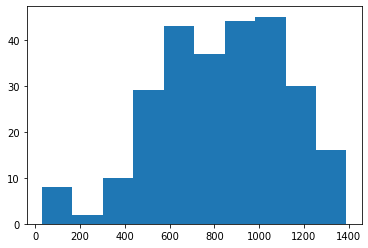

In [48]:
# histogram for lexile levels
plt.hist(labeled_data['Lexiles']);

In [49]:
# normal distribution proofs
labeled_data.describe()

Lexiles
count   264.000000
mean    829.431818
std     287.330805
min      30.000000
25%     617.500000
50%     860.000000
75%    1040.000000
max    1390.000000

In [121]:
from scipy.stats import skew, kurtosis
mean = labeled_data['Lexiles'].mean()
std = labeled_data['Lexiles'].std()
sort = sorted(labeled_data['Lexiles'])
median = sort[int((len(labeled_data['Lexiles']) / 2))]
mode = labeled_data['Lexiles'].mode()
print(' mean: ', floor(mean), '\n','median: ', floor(median), '\n','mode: ', floor(mode))
print('skewed negatively because median and mode are greater than the mean')
skew_amount = skew(labeled_data['Lexiles'])
print("amount of skew: ", skew_amount, "\n", "That's pretty symmetrical because Fisher-Pearson coefficient of skewness is between -0.5 and 0.5")
kurtosis_amount = kurtosis(labeled_data['Lexiles'])
print("amount of kurtosis: ", kurtosis_amount, "\n", "That's a platykurtic distribution because kurtosis is less than 3")

 mean:  829 
 median:  860 
 mode:  990
skewed negatively because median and mode are greater than the mean
amount of skew:  -0.3956209645966705 
 That's pretty symmetrical because Fisher-Pearson coefficient of skewness is between -0.5 and 0.5
amount of kurtosis:  -0.16849460449323939 
 That's a platykurtic distribution because kurtosis is less than 3


In [127]:
from scipy.stats import normaltest as st
# This is a chi-square test against a normal distribution
skew_squared_plus_kurtosis_squared, pvalue = st(labeled_data['Lexiles'])
reject_null = pvalue < 0.05
print(reject_null)
print('Since the p-value is less than an alpha of 0.05, \n',
      'then we can reject the null hypthosis that this data comes from a normal distribution')
print('This means that we need to transform the data prior to passing it into a model.')

True
Since the p-value is less than an alpha of 0.05, 
 then we can reject the null hypthosis that this data comes from a normal distribution
This means that we need to transform the data prior to passing it into a model.


In [131]:
from scipy.stats import shapiro
test_statistic, pvalue = shapiro(labeled_data['Lexiles'])
reject_null = pvalue < 0.05
print(reject_null)
print('Since this p-value is less than an alpha of 0.05, \n',
      'then we can reject the null hypothesis that this data comes from a normal distribution')

True
Since this p-value is less than an alpha of 0.05, 
 then we can reject the null hypothesis that this data comes from a normal distribution


In [132]:
from scipy.stats import anderson
test_statistic, critical_values, significance_levels = anderson(labeled_data['Lexiles'], dist='norm')

In [133]:
critical_values

array([0.568, 0.646, 0.776, 0.905, 1.076])

In [134]:
significance_levels

array([15. , 10. ,  5. ,  2.5,  1. ])

This Anderson-Darling test shows that we can accept the null hypothesis that this data comes from a normal distribution up to a signficance level of 1 %, seen as the critical values are lower than the signficance levels for 15, 10, 5, and 2.5%. We are looking for a significance level of 5%, an alpha of 0.05, so we can actually accept that this data comes from a normal distribution.

Use a hyperbolic transformation to transform data into normal distribution if required. 

ψ(x, θ) = α sinh(βx)sechλ(βx)/β specifically. If you can't figure that out, then use a box-cox transformation.

In [127]:
# binning data and previewing categories to classifiy into
bins = [0, 650, 1050, 1200, 1400]
labeled_data['Lexiles'] = pd.cut(labeled_data['Lexiles'], bins)
labeled_data['Lexiles'].value_counts(normalize=True)

(650, 1050]     0.473485
(0, 650]        0.287879
(1050, 1200]    0.151515
(1200, 1400]    0.087121
Name: Lexiles, dtype: float64

In [271]:
# generating paragraphs to evaluate based on full texts
tt = TextTilingTokenizer(stopwords=stop_words)
paragraphs = []
para_lexiles = []
para_titles = []
para_texts = []
para_data = pd.DataFrame()
for x in range(0, len(labeled_data['Texts'])):
    print('Generating paragraphs for book number ', x+1)
    paragraph = tt.tokenize(labeled_data['Texts'][x])
    paragraphs.append(paragraph)
    print('Storing information for book')
    for y in range(0, len(paragraph)):
        para_lexiles.append(labeled_data['Lexiles'][x])
        para_titles.append(labeled_data['Titles'][x])
        para_texts.append(paragraph[y])
para_data['Lexiles'] = para_lexiles
para_data['Titles'] = para_titles
para_data['Texts'] = para_texts
para_data.sample(5)

Generating paragraphs for book number  1
Storing information for book
Generating paragraphs for book number  2
Storing information for book
Generating paragraphs for book number  3
Storing information for book
Generating paragraphs for book number  4
Storing information for book
Generating paragraphs for book number  5
Storing information for book
Generating paragraphs for book number  6
Storing information for book
Generating paragraphs for book number  7
Storing information for book
Generating paragraphs for book number  8
Storing information for book
Generating paragraphs for book number  9
Storing information for book
Generating paragraphs for book number  10
Storing information for book
Generating paragraphs for book number  11
Storing information for book
Generating paragraphs for book number  12
Storing information for book
Generating paragraphs for book number  13
Storing information for book
Generating paragraphs for book number  14
Storing information for book
Generating para

Storing information for book
Generating paragraphs for book number  117
Storing information for book
Generating paragraphs for book number  118
Storing information for book
Generating paragraphs for book number  119
Storing information for book
Generating paragraphs for book number  120
Storing information for book
Generating paragraphs for book number  121
Storing information for book
Generating paragraphs for book number  122
Storing information for book
Generating paragraphs for book number  123
Storing information for book
Generating paragraphs for book number  124
Storing information for book
Generating paragraphs for book number  125
Storing information for book
Generating paragraphs for book number  126
Storing information for book
Generating paragraphs for book number  127
Storing information for book
Generating paragraphs for book number  128
Storing information for book
Generating paragraphs for book number  129
Storing information for book
Generating paragraphs for book numb

Storing information for book
Generating paragraphs for book number  231
Storing information for book
Generating paragraphs for book number  232
Storing information for book
Generating paragraphs for book number  233
Storing information for book
Generating paragraphs for book number  234
Storing information for book
Generating paragraphs for book number  235
Storing information for book
Generating paragraphs for book number  236
Storing information for book
Generating paragraphs for book number  237
Storing information for book
Generating paragraphs for book number  238
Storing information for book
Generating paragraphs for book number  239
Storing information for book
Generating paragraphs for book number  240
Storing information for book
Generating paragraphs for book number  241
Storing information for book
Generating paragraphs for book number  242
Storing information for book
Generating paragraphs for book number  243
Storing information for book
Generating paragraphs for book numb

Lexiles                 Titles  \
23235  (1050, 1200]  The Yellow Fairy Book   
56709   (650, 1050]                   Mike   
35666   (650, 1050]        The Black Arrow   
8986   (1050, 1200]           Glinda Of Oz   
88941   (650, 1050]             Adaptation   

                                                   Texts  
23235  \n\nSigurd was greatly surprised to hear his Q...  
56709  \n\n"It might clear before eleven. You'd bette...  
35666  \n\nThe old woman laughed aloud.\n\n"Ah, Maste...  
8986   \n\nWhat they saw was more strange than Glinda...  
88941  \n\nHe motioned for the servants to remove the...

In [272]:
len(para_data)

102133

In [273]:
para_data['Texts'][22]

'\n\nSeven boys stood in a row all ages, all sizes, all yellow-haired and\nblue-eyed, all in full Scotch costume, and all smiling, nodding, and\nsaying as with one voice, "How are you, cousin?"\n\nRose gave a little gasp, and looked wildly about her as if ready to fly,\nfor fear magnified the seven and the room seemed full of boys. Before\nshe could run, however, the tallest lad stepped out of the line, saying\npleasantly,\n\n"Don\'t be frightened. This is the Clan come to welcome you; and I\'m the\nchief, Archie, at your service."\n\nHe held out his hand as he spoke, and Rose timidly put her own into a\nbrown paw, which closed over the white morsel and held it as the chief\ncontinued his introductions.'

In [274]:
para_data.to_csv('full_text_to_paragraphs.csv')

In [3]:
para_data = pd.read_csv('full_text_to_paragraphs.csv', index_col=0)
para_data.sample(3)

Lexiles                     Titles  \
101968  (1050, 1200]        The Oedipus Trilogy   
47339       (0, 650]  The Count Of Monte Cristo   
18294    (650, 1050]            The Jungle Book   

                                                    Texts  
101968  \n\nOEDIPUS\nSo, when I cease to be, my worth ...  
47339   \n\nâ€œAnd this is the reason, monsieur,â€ co...  
18294   \n\nAll this will show you how much Mowgli had...

In [4]:
def lemmatize(data):
    '''With raw text data passed in as a single array, will return
    each word with each sentence and its punctuation lemmatized'''
    wnl = WordNetLemmatizer()
    processed = ' '.join(data.splitlines())
    tokens = [word for sent in nltk.sent_tokenize(processed) for word in nltk.word_tokenize(sent)]
    lemmas = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            lemmas.append(wnl.lemmatize(token))
        else:
            lemmas.append(token)
    return lemmas

In [5]:
# lemmatizing data from paragraph inputs
lemmas = []
for x in range(0, len(para_data['Texts'])):
    print('Processing input: ', x+1)
    lemmas.append(lemmatize(para_data['Texts'][x]))

Processing input:  1
Processing input:  2
Processing input:  3
Processing input:  4
Processing input:  5
Processing input:  6
Processing input:  7
Processing input:  8
Processing input:  9
Processing input:  10
Processing input:  11
Processing input:  12
Processing input:  13
Processing input:  14
Processing input:  15
Processing input:  16
Processing input:  17
Processing input:  18
Processing input:  19
Processing input:  20
Processing input:  21
Processing input:  22
Processing input:  23
Processing input:  24
Processing input:  25
Processing input:  26
Processing input:  27
Processing input:  28
Processing input:  29
Processing input:  30
Processing input:  31
Processing input:  32
Processing input:  33
Processing input:  34
Processing input:  35
Processing input:  36
Processing input:  37
Processing input:  38
Processing input:  39
Processing input:  40
Processing input:  41
Processing input:  42
Processing input:  43
Processing input:  44
Processing input:  45
Processing input:  

Processing input:  481
Processing input:  482
Processing input:  483
Processing input:  484
Processing input:  485
Processing input:  486
Processing input:  487
Processing input:  488
Processing input:  489
Processing input:  490
Processing input:  491
Processing input:  492
Processing input:  493
Processing input:  494
Processing input:  495
Processing input:  496
Processing input:  497
Processing input:  498
Processing input:  499
Processing input:  500
Processing input:  501
Processing input:  502
Processing input:  503
Processing input:  504
Processing input:  505
Processing input:  506
Processing input:  507
Processing input:  508
Processing input:  509
Processing input:  510
Processing input:  511
Processing input:  512
Processing input:  513
Processing input:  514
Processing input:  515
Processing input:  516
Processing input:  517
Processing input:  518
Processing input:  519
Processing input:  520
Processing input:  521
Processing input:  522
Processing input:  523
Processing 

Processing input:  980
Processing input:  981
Processing input:  982
Processing input:  983
Processing input:  984
Processing input:  985
Processing input:  986
Processing input:  987
Processing input:  988
Processing input:  989
Processing input:  990
Processing input:  991
Processing input:  992
Processing input:  993
Processing input:  994
Processing input:  995
Processing input:  996
Processing input:  997
Processing input:  998
Processing input:  999
Processing input:  1000
Processing input:  1001
Processing input:  1002
Processing input:  1003
Processing input:  1004
Processing input:  1005
Processing input:  1006
Processing input:  1007
Processing input:  1008
Processing input:  1009
Processing input:  1010
Processing input:  1011
Processing input:  1012
Processing input:  1013
Processing input:  1014
Processing input:  1015
Processing input:  1016
Processing input:  1017
Processing input:  1018
Processing input:  1019
Processing input:  1020
Processing input:  1021
Processing i

Processing input:  1480
Processing input:  1481
Processing input:  1482
Processing input:  1483
Processing input:  1484
Processing input:  1485
Processing input:  1486
Processing input:  1487
Processing input:  1488
Processing input:  1489
Processing input:  1490
Processing input:  1491
Processing input:  1492
Processing input:  1493
Processing input:  1494
Processing input:  1495
Processing input:  1496
Processing input:  1497
Processing input:  1498
Processing input:  1499
Processing input:  1500
Processing input:  1501
Processing input:  1502
Processing input:  1503
Processing input:  1504
Processing input:  1505
Processing input:  1506
Processing input:  1507
Processing input:  1508
Processing input:  1509
Processing input:  1510
Processing input:  1511
Processing input:  1512
Processing input:  1513
Processing input:  1514
Processing input:  1515
Processing input:  1516
Processing input:  1517
Processing input:  1518
Processing input:  1519
Processing input:  1520
Processing input

Processing input:  2230
Processing input:  2231
Processing input:  2232
Processing input:  2233
Processing input:  2234
Processing input:  2235
Processing input:  2236
Processing input:  2237
Processing input:  2238
Processing input:  2239
Processing input:  2240
Processing input:  2241
Processing input:  2242
Processing input:  2243
Processing input:  2244
Processing input:  2245
Processing input:  2246
Processing input:  2247
Processing input:  2248
Processing input:  2249
Processing input:  2250
Processing input:  2251
Processing input:  2252
Processing input:  2253
Processing input:  2254
Processing input:  2255
Processing input:  2256
Processing input:  2257
Processing input:  2258
Processing input:  2259
Processing input:  2260
Processing input:  2261
Processing input:  2262
Processing input:  2263
Processing input:  2264
Processing input:  2265
Processing input:  2266
Processing input:  2267
Processing input:  2268
Processing input:  2269
Processing input:  2270
Processing input

Processing input:  2633
Processing input:  2634
Processing input:  2635
Processing input:  2636
Processing input:  2637
Processing input:  2638
Processing input:  2639
Processing input:  2640
Processing input:  2641
Processing input:  2642
Processing input:  2643
Processing input:  2644
Processing input:  2645
Processing input:  2646
Processing input:  2647
Processing input:  2648
Processing input:  2649
Processing input:  2650
Processing input:  2651
Processing input:  2652
Processing input:  2653
Processing input:  2654
Processing input:  2655
Processing input:  2656
Processing input:  2657
Processing input:  2658
Processing input:  2659
Processing input:  2660
Processing input:  2661
Processing input:  2662
Processing input:  2663
Processing input:  2664
Processing input:  2665
Processing input:  2666
Processing input:  2667
Processing input:  2668
Processing input:  2669
Processing input:  2670
Processing input:  2671
Processing input:  2672
Processing input:  2673
Processing input

Processing input:  3132
Processing input:  3133
Processing input:  3134
Processing input:  3135
Processing input:  3136
Processing input:  3137
Processing input:  3138
Processing input:  3139
Processing input:  3140
Processing input:  3141
Processing input:  3142
Processing input:  3143
Processing input:  3144
Processing input:  3145
Processing input:  3146
Processing input:  3147
Processing input:  3148
Processing input:  3149
Processing input:  3150
Processing input:  3151
Processing input:  3152
Processing input:  3153
Processing input:  3154
Processing input:  3155
Processing input:  3156
Processing input:  3157
Processing input:  3158
Processing input:  3159
Processing input:  3160
Processing input:  3161
Processing input:  3162
Processing input:  3163
Processing input:  3164
Processing input:  3165
Processing input:  3166
Processing input:  3167
Processing input:  3168
Processing input:  3169
Processing input:  3170
Processing input:  3171
Processing input:  3172
Processing input

Processing input:  3479
Processing input:  3480
Processing input:  3481
Processing input:  3482
Processing input:  3483
Processing input:  3484
Processing input:  3485
Processing input:  3486
Processing input:  3487
Processing input:  3488
Processing input:  3489
Processing input:  3490
Processing input:  3491
Processing input:  3492
Processing input:  3493
Processing input:  3494
Processing input:  3495
Processing input:  3496
Processing input:  3497
Processing input:  3498
Processing input:  3499
Processing input:  3500
Processing input:  3501
Processing input:  3502
Processing input:  3503
Processing input:  3504
Processing input:  3505
Processing input:  3506
Processing input:  3507
Processing input:  3508
Processing input:  3509
Processing input:  3510
Processing input:  3511
Processing input:  3512
Processing input:  3513
Processing input:  3514
Processing input:  3515
Processing input:  3516
Processing input:  3517
Processing input:  3518
Processing input:  3519
Processing input

Processing input:  3978
Processing input:  3979
Processing input:  3980
Processing input:  3981
Processing input:  3982
Processing input:  3983
Processing input:  3984
Processing input:  3985
Processing input:  3986
Processing input:  3987
Processing input:  3988
Processing input:  3989
Processing input:  3990
Processing input:  3991
Processing input:  3992
Processing input:  3993
Processing input:  3994
Processing input:  3995
Processing input:  3996
Processing input:  3997
Processing input:  3998
Processing input:  3999
Processing input:  4000
Processing input:  4001
Processing input:  4002
Processing input:  4003
Processing input:  4004
Processing input:  4005
Processing input:  4006
Processing input:  4007
Processing input:  4008
Processing input:  4009
Processing input:  4010
Processing input:  4011
Processing input:  4012
Processing input:  4013
Processing input:  4014
Processing input:  4015
Processing input:  4016
Processing input:  4017
Processing input:  4018
Processing input

Processing input:  4478
Processing input:  4479
Processing input:  4480
Processing input:  4481
Processing input:  4482
Processing input:  4483
Processing input:  4484
Processing input:  4485
Processing input:  4486
Processing input:  4487
Processing input:  4488
Processing input:  4489
Processing input:  4490
Processing input:  4491
Processing input:  4492
Processing input:  4493
Processing input:  4494
Processing input:  4495
Processing input:  4496
Processing input:  4497
Processing input:  4498
Processing input:  4499
Processing input:  4500
Processing input:  4501
Processing input:  4502
Processing input:  4503
Processing input:  4504
Processing input:  4505
Processing input:  4506
Processing input:  4507
Processing input:  4508
Processing input:  4509
Processing input:  4510
Processing input:  4511
Processing input:  4512
Processing input:  4513
Processing input:  4514
Processing input:  4515
Processing input:  4516
Processing input:  4517
Processing input:  4518
Processing input

Processing input:  4977
Processing input:  4978
Processing input:  4979
Processing input:  4980
Processing input:  4981
Processing input:  4982
Processing input:  4983
Processing input:  4984
Processing input:  4985
Processing input:  4986
Processing input:  4987
Processing input:  4988
Processing input:  4989
Processing input:  4990
Processing input:  4991
Processing input:  4992
Processing input:  4993
Processing input:  4994
Processing input:  4995
Processing input:  4996
Processing input:  4997
Processing input:  4998
Processing input:  4999
Processing input:  5000
Processing input:  5001
Processing input:  5002
Processing input:  5003
Processing input:  5004
Processing input:  5005
Processing input:  5006
Processing input:  5007
Processing input:  5008
Processing input:  5009
Processing input:  5010
Processing input:  5011
Processing input:  5012
Processing input:  5013
Processing input:  5014
Processing input:  5015
Processing input:  5016
Processing input:  5017
Processing input

Processing input:  5488
Processing input:  5489
Processing input:  5490
Processing input:  5491
Processing input:  5492
Processing input:  5493
Processing input:  5494
Processing input:  5495
Processing input:  5496
Processing input:  5497
Processing input:  5498
Processing input:  5499
Processing input:  5500
Processing input:  5501
Processing input:  5502
Processing input:  5503
Processing input:  5504
Processing input:  5505
Processing input:  5506
Processing input:  5507
Processing input:  5508
Processing input:  5509
Processing input:  5510
Processing input:  5511
Processing input:  5512
Processing input:  5513
Processing input:  5514
Processing input:  5515
Processing input:  5516
Processing input:  5517
Processing input:  5518
Processing input:  5519
Processing input:  5520
Processing input:  5521
Processing input:  5522
Processing input:  5523
Processing input:  5524
Processing input:  5525
Processing input:  5526
Processing input:  5527
Processing input:  5528
Processing input

Processing input:  5977
Processing input:  5978
Processing input:  5979
Processing input:  5980
Processing input:  5981
Processing input:  5982
Processing input:  5983
Processing input:  5984
Processing input:  5985
Processing input:  5986
Processing input:  5987
Processing input:  5988
Processing input:  5989
Processing input:  5990
Processing input:  5991
Processing input:  5992
Processing input:  5993
Processing input:  5994
Processing input:  5995
Processing input:  5996
Processing input:  5997
Processing input:  5998
Processing input:  5999
Processing input:  6000
Processing input:  6001
Processing input:  6002
Processing input:  6003
Processing input:  6004
Processing input:  6005
Processing input:  6006
Processing input:  6007
Processing input:  6008
Processing input:  6009
Processing input:  6010
Processing input:  6011
Processing input:  6012
Processing input:  6013
Processing input:  6014
Processing input:  6015
Processing input:  6016
Processing input:  6017
Processing input

Processing input:  6476
Processing input:  6477
Processing input:  6478
Processing input:  6479
Processing input:  6480
Processing input:  6481
Processing input:  6482
Processing input:  6483
Processing input:  6484
Processing input:  6485
Processing input:  6486
Processing input:  6487
Processing input:  6488
Processing input:  6489
Processing input:  6490
Processing input:  6491
Processing input:  6492
Processing input:  6493
Processing input:  6494
Processing input:  6495
Processing input:  6496
Processing input:  6497
Processing input:  6498
Processing input:  6499
Processing input:  6500
Processing input:  6501
Processing input:  6502
Processing input:  6503
Processing input:  6504
Processing input:  6505
Processing input:  6506
Processing input:  6507
Processing input:  6508
Processing input:  6509
Processing input:  6510
Processing input:  6511
Processing input:  6512
Processing input:  6513
Processing input:  6514
Processing input:  6515
Processing input:  6516
Processing input

Processing input:  7011
Processing input:  7012
Processing input:  7013
Processing input:  7014
Processing input:  7015
Processing input:  7016
Processing input:  7017
Processing input:  7018
Processing input:  7019
Processing input:  7020
Processing input:  7021
Processing input:  7022
Processing input:  7023
Processing input:  7024
Processing input:  7025
Processing input:  7026
Processing input:  7027
Processing input:  7028
Processing input:  7029
Processing input:  7030
Processing input:  7031
Processing input:  7032
Processing input:  7033
Processing input:  7034
Processing input:  7035
Processing input:  7036
Processing input:  7037
Processing input:  7038
Processing input:  7039
Processing input:  7040
Processing input:  7041
Processing input:  7042
Processing input:  7043
Processing input:  7044
Processing input:  7045
Processing input:  7046
Processing input:  7047
Processing input:  7048
Processing input:  7049
Processing input:  7050
Processing input:  7051
Processing input

Processing input:  7370
Processing input:  7371
Processing input:  7372
Processing input:  7373
Processing input:  7374
Processing input:  7375
Processing input:  7376
Processing input:  7377
Processing input:  7378
Processing input:  7379
Processing input:  7380
Processing input:  7381
Processing input:  7382
Processing input:  7383
Processing input:  7384
Processing input:  7385
Processing input:  7386
Processing input:  7387
Processing input:  7388
Processing input:  7389
Processing input:  7390
Processing input:  7391
Processing input:  7392
Processing input:  7393
Processing input:  7394
Processing input:  7395
Processing input:  7396
Processing input:  7397
Processing input:  7398
Processing input:  7399
Processing input:  7400
Processing input:  7401
Processing input:  7402
Processing input:  7403
Processing input:  7404
Processing input:  7405
Processing input:  7406
Processing input:  7407
Processing input:  7408
Processing input:  7409
Processing input:  7410
Processing input

Processing input:  7975
Processing input:  7976
Processing input:  7977
Processing input:  7978
Processing input:  7979
Processing input:  7980
Processing input:  7981
Processing input:  7982
Processing input:  7983
Processing input:  7984
Processing input:  7985
Processing input:  7986
Processing input:  7987
Processing input:  7988
Processing input:  7989
Processing input:  7990
Processing input:  7991
Processing input:  7992
Processing input:  7993
Processing input:  7994
Processing input:  7995
Processing input:  7996
Processing input:  7997
Processing input:  7998
Processing input:  7999
Processing input:  8000
Processing input:  8001
Processing input:  8002
Processing input:  8003
Processing input:  8004
Processing input:  8005
Processing input:  8006
Processing input:  8007
Processing input:  8008
Processing input:  8009
Processing input:  8010
Processing input:  8011
Processing input:  8012
Processing input:  8013
Processing input:  8014
Processing input:  8015
Processing input

Processing input:  8725
Processing input:  8726
Processing input:  8727
Processing input:  8728
Processing input:  8729
Processing input:  8730
Processing input:  8731
Processing input:  8732
Processing input:  8733
Processing input:  8734
Processing input:  8735
Processing input:  8736
Processing input:  8737
Processing input:  8738
Processing input:  8739
Processing input:  8740
Processing input:  8741
Processing input:  8742
Processing input:  8743
Processing input:  8744
Processing input:  8745
Processing input:  8746
Processing input:  8747
Processing input:  8748
Processing input:  8749
Processing input:  8750
Processing input:  8751
Processing input:  8752
Processing input:  8753
Processing input:  8754
Processing input:  8755
Processing input:  8756
Processing input:  8757
Processing input:  8758
Processing input:  8759
Processing input:  8760
Processing input:  8761
Processing input:  8762
Processing input:  8763
Processing input:  8764
Processing input:  8765
Processing input

Processing input:  9475
Processing input:  9476
Processing input:  9477
Processing input:  9478
Processing input:  9479
Processing input:  9480
Processing input:  9481
Processing input:  9482
Processing input:  9483
Processing input:  9484
Processing input:  9485
Processing input:  9486
Processing input:  9487
Processing input:  9488
Processing input:  9489
Processing input:  9490
Processing input:  9491
Processing input:  9492
Processing input:  9493
Processing input:  9494
Processing input:  9495
Processing input:  9496
Processing input:  9497
Processing input:  9498
Processing input:  9499
Processing input:  9500
Processing input:  9501
Processing input:  9502
Processing input:  9503
Processing input:  9504
Processing input:  9505
Processing input:  9506
Processing input:  9507
Processing input:  9508
Processing input:  9509
Processing input:  9510
Processing input:  9511
Processing input:  9512
Processing input:  9513
Processing input:  9514
Processing input:  9515
Processing input

Processing input:  9974
Processing input:  9975
Processing input:  9976
Processing input:  9977
Processing input:  9978
Processing input:  9979
Processing input:  9980
Processing input:  9981
Processing input:  9982
Processing input:  9983
Processing input:  9984
Processing input:  9985
Processing input:  9986
Processing input:  9987
Processing input:  9988
Processing input:  9989
Processing input:  9990
Processing input:  9991
Processing input:  9992
Processing input:  9993
Processing input:  9994
Processing input:  9995
Processing input:  9996
Processing input:  9997
Processing input:  9998
Processing input:  9999
Processing input:  10000
Processing input:  10001
Processing input:  10002
Processing input:  10003
Processing input:  10004
Processing input:  10005
Processing input:  10006
Processing input:  10007
Processing input:  10008
Processing input:  10009
Processing input:  10010
Processing input:  10011
Processing input:  10012
Processing input:  10013
Processing input:  10014
P

Processing input:  10659
Processing input:  10660
Processing input:  10661
Processing input:  10662
Processing input:  10663
Processing input:  10664
Processing input:  10665
Processing input:  10666
Processing input:  10667
Processing input:  10668
Processing input:  10669
Processing input:  10670
Processing input:  10671
Processing input:  10672
Processing input:  10673
Processing input:  10674
Processing input:  10675
Processing input:  10676
Processing input:  10677
Processing input:  10678
Processing input:  10679
Processing input:  10680
Processing input:  10681
Processing input:  10682
Processing input:  10683
Processing input:  10684
Processing input:  10685
Processing input:  10686
Processing input:  10687
Processing input:  10688
Processing input:  10689
Processing input:  10690
Processing input:  10691
Processing input:  10692
Processing input:  10693
Processing input:  10694
Processing input:  10695
Processing input:  10696
Processing input:  10697
Processing input:  10698


Processing input:  11473
Processing input:  11474
Processing input:  11475
Processing input:  11476
Processing input:  11477
Processing input:  11478
Processing input:  11479
Processing input:  11480
Processing input:  11481
Processing input:  11482
Processing input:  11483
Processing input:  11484
Processing input:  11485
Processing input:  11486
Processing input:  11487
Processing input:  11488
Processing input:  11489
Processing input:  11490
Processing input:  11491
Processing input:  11492
Processing input:  11493
Processing input:  11494
Processing input:  11495
Processing input:  11496
Processing input:  11497
Processing input:  11498
Processing input:  11499
Processing input:  11500
Processing input:  11501
Processing input:  11502
Processing input:  11503
Processing input:  11504
Processing input:  11505
Processing input:  11506
Processing input:  11507
Processing input:  11508
Processing input:  11509
Processing input:  11510
Processing input:  11511
Processing input:  11512


Processing input:  11842
Processing input:  11843
Processing input:  11844
Processing input:  11845
Processing input:  11846
Processing input:  11847
Processing input:  11848
Processing input:  11849
Processing input:  11850
Processing input:  11851
Processing input:  11852
Processing input:  11853
Processing input:  11854
Processing input:  11855
Processing input:  11856
Processing input:  11857
Processing input:  11858
Processing input:  11859
Processing input:  11860
Processing input:  11861
Processing input:  11862
Processing input:  11863
Processing input:  11864
Processing input:  11865
Processing input:  11866
Processing input:  11867
Processing input:  11868
Processing input:  11869
Processing input:  11870
Processing input:  11871
Processing input:  11872
Processing input:  11873
Processing input:  11874
Processing input:  11875
Processing input:  11876
Processing input:  11877
Processing input:  11878
Processing input:  11879
Processing input:  11880
Processing input:  11881


Processing input:  12223
Processing input:  12224
Processing input:  12225
Processing input:  12226
Processing input:  12227
Processing input:  12228
Processing input:  12229
Processing input:  12230
Processing input:  12231
Processing input:  12232
Processing input:  12233
Processing input:  12234
Processing input:  12235
Processing input:  12236
Processing input:  12237
Processing input:  12238
Processing input:  12239
Processing input:  12240
Processing input:  12241
Processing input:  12242
Processing input:  12243
Processing input:  12244
Processing input:  12245
Processing input:  12246
Processing input:  12247
Processing input:  12248
Processing input:  12249
Processing input:  12250
Processing input:  12251
Processing input:  12252
Processing input:  12253
Processing input:  12254
Processing input:  12255
Processing input:  12256
Processing input:  12257
Processing input:  12258
Processing input:  12259
Processing input:  12260
Processing input:  12261
Processing input:  12262


Processing input:  12973
Processing input:  12974
Processing input:  12975
Processing input:  12976
Processing input:  12977
Processing input:  12978
Processing input:  12979
Processing input:  12980
Processing input:  12981
Processing input:  12982
Processing input:  12983
Processing input:  12984
Processing input:  12985
Processing input:  12986
Processing input:  12987
Processing input:  12988
Processing input:  12989
Processing input:  12990
Processing input:  12991
Processing input:  12992
Processing input:  12993
Processing input:  12994
Processing input:  12995
Processing input:  12996
Processing input:  12997
Processing input:  12998
Processing input:  12999
Processing input:  13000
Processing input:  13001
Processing input:  13002
Processing input:  13003
Processing input:  13004
Processing input:  13005
Processing input:  13006
Processing input:  13007
Processing input:  13008
Processing input:  13009
Processing input:  13010
Processing input:  13011
Processing input:  13012


Processing input:  13472
Processing input:  13473
Processing input:  13474
Processing input:  13475
Processing input:  13476
Processing input:  13477
Processing input:  13478
Processing input:  13479
Processing input:  13480
Processing input:  13481
Processing input:  13482
Processing input:  13483
Processing input:  13484
Processing input:  13485
Processing input:  13486
Processing input:  13487
Processing input:  13488
Processing input:  13489
Processing input:  13490
Processing input:  13491
Processing input:  13492
Processing input:  13493
Processing input:  13494
Processing input:  13495
Processing input:  13496
Processing input:  13497
Processing input:  13498
Processing input:  13499
Processing input:  13500
Processing input:  13501
Processing input:  13502
Processing input:  13503
Processing input:  13504
Processing input:  13505
Processing input:  13506
Processing input:  13507
Processing input:  13508
Processing input:  13509
Processing input:  13510
Processing input:  13511


Processing input:  13873
Processing input:  13874
Processing input:  13875
Processing input:  13876
Processing input:  13877
Processing input:  13878
Processing input:  13879
Processing input:  13880
Processing input:  13881
Processing input:  13882
Processing input:  13883
Processing input:  13884
Processing input:  13885
Processing input:  13886
Processing input:  13887
Processing input:  13888
Processing input:  13889
Processing input:  13890
Processing input:  13891
Processing input:  13892
Processing input:  13893
Processing input:  13894
Processing input:  13895
Processing input:  13896
Processing input:  13897
Processing input:  13898
Processing input:  13899
Processing input:  13900
Processing input:  13901
Processing input:  13902
Processing input:  13903
Processing input:  13904
Processing input:  13905
Processing input:  13906
Processing input:  13907
Processing input:  13908
Processing input:  13909
Processing input:  13910
Processing input:  13911
Processing input:  13912


Processing input:  14222
Processing input:  14223
Processing input:  14224
Processing input:  14225
Processing input:  14226
Processing input:  14227
Processing input:  14228
Processing input:  14229
Processing input:  14230
Processing input:  14231
Processing input:  14232
Processing input:  14233
Processing input:  14234
Processing input:  14235
Processing input:  14236
Processing input:  14237
Processing input:  14238
Processing input:  14239
Processing input:  14240
Processing input:  14241
Processing input:  14242
Processing input:  14243
Processing input:  14244
Processing input:  14245
Processing input:  14246
Processing input:  14247
Processing input:  14248
Processing input:  14249
Processing input:  14250
Processing input:  14251
Processing input:  14252
Processing input:  14253
Processing input:  14254
Processing input:  14255
Processing input:  14256
Processing input:  14257
Processing input:  14258
Processing input:  14259
Processing input:  14260
Processing input:  14261


Processing input:  14721
Processing input:  14722
Processing input:  14723
Processing input:  14724
Processing input:  14725
Processing input:  14726
Processing input:  14727
Processing input:  14728
Processing input:  14729
Processing input:  14730
Processing input:  14731
Processing input:  14732
Processing input:  14733
Processing input:  14734
Processing input:  14735
Processing input:  14736
Processing input:  14737
Processing input:  14738
Processing input:  14739
Processing input:  14740
Processing input:  14741
Processing input:  14742
Processing input:  14743
Processing input:  14744
Processing input:  14745
Processing input:  14746
Processing input:  14747
Processing input:  14748
Processing input:  14749
Processing input:  14750
Processing input:  14751
Processing input:  14752
Processing input:  14753
Processing input:  14754
Processing input:  14755
Processing input:  14756
Processing input:  14757
Processing input:  14758
Processing input:  14759
Processing input:  14760


Processing input:  15183
Processing input:  15184
Processing input:  15185
Processing input:  15186
Processing input:  15187
Processing input:  15188
Processing input:  15189
Processing input:  15190
Processing input:  15191
Processing input:  15192
Processing input:  15193
Processing input:  15194
Processing input:  15195
Processing input:  15196
Processing input:  15197
Processing input:  15198
Processing input:  15199
Processing input:  15200
Processing input:  15201
Processing input:  15202
Processing input:  15203
Processing input:  15204
Processing input:  15205
Processing input:  15206
Processing input:  15207
Processing input:  15208
Processing input:  15209
Processing input:  15210
Processing input:  15211
Processing input:  15212
Processing input:  15213
Processing input:  15214
Processing input:  15215
Processing input:  15216
Processing input:  15217
Processing input:  15218
Processing input:  15219
Processing input:  15220
Processing input:  15221
Processing input:  15222


Processing input:  15861
Processing input:  15862
Processing input:  15863
Processing input:  15864
Processing input:  15865
Processing input:  15866
Processing input:  15867
Processing input:  15868
Processing input:  15869
Processing input:  15870
Processing input:  15871
Processing input:  15872
Processing input:  15873
Processing input:  15874
Processing input:  15875
Processing input:  15876
Processing input:  15877
Processing input:  15878
Processing input:  15879
Processing input:  15880
Processing input:  15881
Processing input:  15882
Processing input:  15883
Processing input:  15884
Processing input:  15885
Processing input:  15886
Processing input:  15887
Processing input:  15888
Processing input:  15889
Processing input:  15890
Processing input:  15891
Processing input:  15892
Processing input:  15893
Processing input:  15894
Processing input:  15895
Processing input:  15896
Processing input:  15897
Processing input:  15898
Processing input:  15899
Processing input:  15900


Processing input:  16470
Processing input:  16471
Processing input:  16472
Processing input:  16473
Processing input:  16474
Processing input:  16475
Processing input:  16476
Processing input:  16477
Processing input:  16478
Processing input:  16479
Processing input:  16480
Processing input:  16481
Processing input:  16482
Processing input:  16483
Processing input:  16484
Processing input:  16485
Processing input:  16486
Processing input:  16487
Processing input:  16488
Processing input:  16489
Processing input:  16490
Processing input:  16491
Processing input:  16492
Processing input:  16493
Processing input:  16494
Processing input:  16495
Processing input:  16496
Processing input:  16497
Processing input:  16498
Processing input:  16499
Processing input:  16500
Processing input:  16501
Processing input:  16502
Processing input:  16503
Processing input:  16504
Processing input:  16505
Processing input:  16506
Processing input:  16507
Processing input:  16508
Processing input:  16509


Processing input:  17220
Processing input:  17221
Processing input:  17222
Processing input:  17223
Processing input:  17224
Processing input:  17225
Processing input:  17226
Processing input:  17227
Processing input:  17228
Processing input:  17229
Processing input:  17230
Processing input:  17231
Processing input:  17232
Processing input:  17233
Processing input:  17234
Processing input:  17235
Processing input:  17236
Processing input:  17237
Processing input:  17238
Processing input:  17239
Processing input:  17240
Processing input:  17241
Processing input:  17242
Processing input:  17243
Processing input:  17244
Processing input:  17245
Processing input:  17246
Processing input:  17247
Processing input:  17248
Processing input:  17249
Processing input:  17250
Processing input:  17251
Processing input:  17252
Processing input:  17253
Processing input:  17254
Processing input:  17255
Processing input:  17256
Processing input:  17257
Processing input:  17258
Processing input:  17259


Processing input:  17719
Processing input:  17720
Processing input:  17721
Processing input:  17722
Processing input:  17723
Processing input:  17724
Processing input:  17725
Processing input:  17726
Processing input:  17727
Processing input:  17728
Processing input:  17729
Processing input:  17730
Processing input:  17731
Processing input:  17732
Processing input:  17733
Processing input:  17734
Processing input:  17735
Processing input:  17736
Processing input:  17737
Processing input:  17738
Processing input:  17739
Processing input:  17740
Processing input:  17741
Processing input:  17742
Processing input:  17743
Processing input:  17744
Processing input:  17745
Processing input:  17746
Processing input:  17747
Processing input:  17748
Processing input:  17749
Processing input:  17750
Processing input:  17751
Processing input:  17752
Processing input:  17753
Processing input:  17754
Processing input:  17755
Processing input:  17756
Processing input:  17757
Processing input:  17758


Processing input:  18107
Processing input:  18108
Processing input:  18109
Processing input:  18110
Processing input:  18111
Processing input:  18112
Processing input:  18113
Processing input:  18114
Processing input:  18115
Processing input:  18116
Processing input:  18117
Processing input:  18118
Processing input:  18119
Processing input:  18120
Processing input:  18121
Processing input:  18122
Processing input:  18123
Processing input:  18124
Processing input:  18125
Processing input:  18126
Processing input:  18127
Processing input:  18128
Processing input:  18129
Processing input:  18130
Processing input:  18131
Processing input:  18132
Processing input:  18133
Processing input:  18134
Processing input:  18135
Processing input:  18136
Processing input:  18137
Processing input:  18138
Processing input:  18139
Processing input:  18140
Processing input:  18141
Processing input:  18142
Processing input:  18143
Processing input:  18144
Processing input:  18145
Processing input:  18146


Processing input:  18444
Processing input:  18445
Processing input:  18446
Processing input:  18447
Processing input:  18448
Processing input:  18449
Processing input:  18450
Processing input:  18451
Processing input:  18452
Processing input:  18453
Processing input:  18454
Processing input:  18455
Processing input:  18456
Processing input:  18457
Processing input:  18458
Processing input:  18459
Processing input:  18460
Processing input:  18461
Processing input:  18462
Processing input:  18463
Processing input:  18464
Processing input:  18465
Processing input:  18466
Processing input:  18467
Processing input:  18468
Processing input:  18469
Processing input:  18470
Processing input:  18471
Processing input:  18472
Processing input:  18473
Processing input:  18474
Processing input:  18475
Processing input:  18476
Processing input:  18477
Processing input:  18478
Processing input:  18479
Processing input:  18480
Processing input:  18481
Processing input:  18482
Processing input:  18483


Processing input:  19218
Processing input:  19219
Processing input:  19220
Processing input:  19221
Processing input:  19222
Processing input:  19223
Processing input:  19224
Processing input:  19225
Processing input:  19226
Processing input:  19227
Processing input:  19228
Processing input:  19229
Processing input:  19230
Processing input:  19231
Processing input:  19232
Processing input:  19233
Processing input:  19234
Processing input:  19235
Processing input:  19236
Processing input:  19237
Processing input:  19238
Processing input:  19239
Processing input:  19240
Processing input:  19241
Processing input:  19242
Processing input:  19243
Processing input:  19244
Processing input:  19245
Processing input:  19246
Processing input:  19247
Processing input:  19248
Processing input:  19249
Processing input:  19250
Processing input:  19251
Processing input:  19252
Processing input:  19253
Processing input:  19254
Processing input:  19255
Processing input:  19256
Processing input:  19257


Processing input:  19718
Processing input:  19719
Processing input:  19720
Processing input:  19721
Processing input:  19722
Processing input:  19723
Processing input:  19724
Processing input:  19725
Processing input:  19726
Processing input:  19727
Processing input:  19728
Processing input:  19729
Processing input:  19730
Processing input:  19731
Processing input:  19732
Processing input:  19733
Processing input:  19734
Processing input:  19735
Processing input:  19736
Processing input:  19737
Processing input:  19738
Processing input:  19739
Processing input:  19740
Processing input:  19741
Processing input:  19742
Processing input:  19743
Processing input:  19744
Processing input:  19745
Processing input:  19746
Processing input:  19747
Processing input:  19748
Processing input:  19749
Processing input:  19750
Processing input:  19751
Processing input:  19752
Processing input:  19753
Processing input:  19754
Processing input:  19755
Processing input:  19756
Processing input:  19757


Processing input:  20218
Processing input:  20219
Processing input:  20220
Processing input:  20221
Processing input:  20222
Processing input:  20223
Processing input:  20224
Processing input:  20225
Processing input:  20226
Processing input:  20227
Processing input:  20228
Processing input:  20229
Processing input:  20230
Processing input:  20231
Processing input:  20232
Processing input:  20233
Processing input:  20234
Processing input:  20235
Processing input:  20236
Processing input:  20237
Processing input:  20238
Processing input:  20239
Processing input:  20240
Processing input:  20241
Processing input:  20242
Processing input:  20243
Processing input:  20244
Processing input:  20245
Processing input:  20246
Processing input:  20247
Processing input:  20248
Processing input:  20249
Processing input:  20250
Processing input:  20251
Processing input:  20252
Processing input:  20253
Processing input:  20254
Processing input:  20255
Processing input:  20256
Processing input:  20257


Processing input:  20819
Processing input:  20820
Processing input:  20821
Processing input:  20822
Processing input:  20823
Processing input:  20824
Processing input:  20825
Processing input:  20826
Processing input:  20827
Processing input:  20828
Processing input:  20829
Processing input:  20830
Processing input:  20831
Processing input:  20832
Processing input:  20833
Processing input:  20834
Processing input:  20835
Processing input:  20836
Processing input:  20837
Processing input:  20838
Processing input:  20839
Processing input:  20840
Processing input:  20841
Processing input:  20842
Processing input:  20843
Processing input:  20844
Processing input:  20845
Processing input:  20846
Processing input:  20847
Processing input:  20848
Processing input:  20849
Processing input:  20850
Processing input:  20851
Processing input:  20852
Processing input:  20853
Processing input:  20854
Processing input:  20855
Processing input:  20856
Processing input:  20857
Processing input:  20858


Processing input:  21384
Processing input:  21385
Processing input:  21386
Processing input:  21387
Processing input:  21388
Processing input:  21389
Processing input:  21390
Processing input:  21391
Processing input:  21392
Processing input:  21393
Processing input:  21394
Processing input:  21395
Processing input:  21396
Processing input:  21397
Processing input:  21398
Processing input:  21399
Processing input:  21400
Processing input:  21401
Processing input:  21402
Processing input:  21403
Processing input:  21404
Processing input:  21405
Processing input:  21406
Processing input:  21407
Processing input:  21408
Processing input:  21409
Processing input:  21410
Processing input:  21411
Processing input:  21412
Processing input:  21413
Processing input:  21414
Processing input:  21415
Processing input:  21416
Processing input:  21417
Processing input:  21418
Processing input:  21419
Processing input:  21420
Processing input:  21421
Processing input:  21422
Processing input:  21423


Processing input:  21967
Processing input:  21968
Processing input:  21969
Processing input:  21970
Processing input:  21971
Processing input:  21972
Processing input:  21973
Processing input:  21974
Processing input:  21975
Processing input:  21976
Processing input:  21977
Processing input:  21978
Processing input:  21979
Processing input:  21980
Processing input:  21981
Processing input:  21982
Processing input:  21983
Processing input:  21984
Processing input:  21985
Processing input:  21986
Processing input:  21987
Processing input:  21988
Processing input:  21989
Processing input:  21990
Processing input:  21991
Processing input:  21992
Processing input:  21993
Processing input:  21994
Processing input:  21995
Processing input:  21996
Processing input:  21997
Processing input:  21998
Processing input:  21999
Processing input:  22000
Processing input:  22001
Processing input:  22002
Processing input:  22003
Processing input:  22004
Processing input:  22005
Processing input:  22006


Processing input:  22467
Processing input:  22468
Processing input:  22469
Processing input:  22470
Processing input:  22471
Processing input:  22472
Processing input:  22473
Processing input:  22474
Processing input:  22475
Processing input:  22476
Processing input:  22477
Processing input:  22478
Processing input:  22479
Processing input:  22480
Processing input:  22481
Processing input:  22482
Processing input:  22483
Processing input:  22484
Processing input:  22485
Processing input:  22486
Processing input:  22487
Processing input:  22488
Processing input:  22489
Processing input:  22490
Processing input:  22491
Processing input:  22492
Processing input:  22493
Processing input:  22494
Processing input:  22495
Processing input:  22496
Processing input:  22497
Processing input:  22498
Processing input:  22499
Processing input:  22500
Processing input:  22501
Processing input:  22502
Processing input:  22503
Processing input:  22504
Processing input:  22505
Processing input:  22506


Processing input:  22947
Processing input:  22948
Processing input:  22949
Processing input:  22950
Processing input:  22951
Processing input:  22952
Processing input:  22953
Processing input:  22954
Processing input:  22955
Processing input:  22956
Processing input:  22957
Processing input:  22958
Processing input:  22959
Processing input:  22960
Processing input:  22961
Processing input:  22962
Processing input:  22963
Processing input:  22964
Processing input:  22965
Processing input:  22966
Processing input:  22967
Processing input:  22968
Processing input:  22969
Processing input:  22970
Processing input:  22971
Processing input:  22972
Processing input:  22973
Processing input:  22974
Processing input:  22975
Processing input:  22976
Processing input:  22977
Processing input:  22978
Processing input:  22979
Processing input:  22980
Processing input:  22981
Processing input:  22982
Processing input:  22983
Processing input:  22984
Processing input:  22985
Processing input:  22986


Processing input:  23680
Processing input:  23681
Processing input:  23682
Processing input:  23683
Processing input:  23684
Processing input:  23685
Processing input:  23686
Processing input:  23687
Processing input:  23688
Processing input:  23689
Processing input:  23690
Processing input:  23691
Processing input:  23692
Processing input:  23693
Processing input:  23694
Processing input:  23695
Processing input:  23696
Processing input:  23697
Processing input:  23698
Processing input:  23699
Processing input:  23700
Processing input:  23701
Processing input:  23702
Processing input:  23703
Processing input:  23704
Processing input:  23705
Processing input:  23706
Processing input:  23707
Processing input:  23708
Processing input:  23709
Processing input:  23710
Processing input:  23711
Processing input:  23712
Processing input:  23713
Processing input:  23714
Processing input:  23715
Processing input:  23716
Processing input:  23717
Processing input:  23718
Processing input:  23719


Processing input:  24216
Processing input:  24217
Processing input:  24218
Processing input:  24219
Processing input:  24220
Processing input:  24221
Processing input:  24222
Processing input:  24223
Processing input:  24224
Processing input:  24225
Processing input:  24226
Processing input:  24227
Processing input:  24228
Processing input:  24229
Processing input:  24230
Processing input:  24231
Processing input:  24232
Processing input:  24233
Processing input:  24234
Processing input:  24235
Processing input:  24236
Processing input:  24237
Processing input:  24238
Processing input:  24239
Processing input:  24240
Processing input:  24241
Processing input:  24242
Processing input:  24243
Processing input:  24244
Processing input:  24245
Processing input:  24246
Processing input:  24247
Processing input:  24248
Processing input:  24249
Processing input:  24250
Processing input:  24251
Processing input:  24252
Processing input:  24253
Processing input:  24254
Processing input:  24255


Processing input:  25051
Processing input:  25052
Processing input:  25053
Processing input:  25054
Processing input:  25055
Processing input:  25056
Processing input:  25057
Processing input:  25058
Processing input:  25059
Processing input:  25060
Processing input:  25061
Processing input:  25062
Processing input:  25063
Processing input:  25064
Processing input:  25065
Processing input:  25066
Processing input:  25067
Processing input:  25068
Processing input:  25069
Processing input:  25070
Processing input:  25071
Processing input:  25072
Processing input:  25073
Processing input:  25074
Processing input:  25075
Processing input:  25076
Processing input:  25077
Processing input:  25078
Processing input:  25079
Processing input:  25080
Processing input:  25081
Processing input:  25082
Processing input:  25083
Processing input:  25084
Processing input:  25085
Processing input:  25086
Processing input:  25087
Processing input:  25088
Processing input:  25089
Processing input:  25090


Processing input:  25465
Processing input:  25466
Processing input:  25467
Processing input:  25468
Processing input:  25469
Processing input:  25470
Processing input:  25471
Processing input:  25472
Processing input:  25473
Processing input:  25474
Processing input:  25475
Processing input:  25476
Processing input:  25477
Processing input:  25478
Processing input:  25479
Processing input:  25480
Processing input:  25481
Processing input:  25482
Processing input:  25483
Processing input:  25484
Processing input:  25485
Processing input:  25486
Processing input:  25487
Processing input:  25488
Processing input:  25489
Processing input:  25490
Processing input:  25491
Processing input:  25492
Processing input:  25493
Processing input:  25494
Processing input:  25495
Processing input:  25496
Processing input:  25497
Processing input:  25498
Processing input:  25499
Processing input:  25500
Processing input:  25501
Processing input:  25502
Processing input:  25503
Processing input:  25504


Processing input:  26052
Processing input:  26053
Processing input:  26054
Processing input:  26055
Processing input:  26056
Processing input:  26057
Processing input:  26058
Processing input:  26059
Processing input:  26060
Processing input:  26061
Processing input:  26062
Processing input:  26063
Processing input:  26064
Processing input:  26065
Processing input:  26066
Processing input:  26067
Processing input:  26068
Processing input:  26069
Processing input:  26070
Processing input:  26071
Processing input:  26072
Processing input:  26073
Processing input:  26074
Processing input:  26075
Processing input:  26076
Processing input:  26077
Processing input:  26078
Processing input:  26079
Processing input:  26080
Processing input:  26081
Processing input:  26082
Processing input:  26083
Processing input:  26084
Processing input:  26085
Processing input:  26086
Processing input:  26087
Processing input:  26088
Processing input:  26089
Processing input:  26090
Processing input:  26091


Processing input:  26921
Processing input:  26922
Processing input:  26923
Processing input:  26924
Processing input:  26925
Processing input:  26926
Processing input:  26927
Processing input:  26928
Processing input:  26929
Processing input:  26930
Processing input:  26931
Processing input:  26932
Processing input:  26933
Processing input:  26934
Processing input:  26935
Processing input:  26936
Processing input:  26937
Processing input:  26938
Processing input:  26939
Processing input:  26940
Processing input:  26941
Processing input:  26942
Processing input:  26943
Processing input:  26944
Processing input:  26945
Processing input:  26946
Processing input:  26947
Processing input:  26948
Processing input:  26949
Processing input:  26950
Processing input:  26951
Processing input:  26952
Processing input:  26953
Processing input:  26954
Processing input:  26955
Processing input:  26956
Processing input:  26957
Processing input:  26958
Processing input:  26959
Processing input:  26960


Processing input:  27541
Processing input:  27542
Processing input:  27543
Processing input:  27544
Processing input:  27545
Processing input:  27546
Processing input:  27547
Processing input:  27548
Processing input:  27549
Processing input:  27550
Processing input:  27551
Processing input:  27552
Processing input:  27553
Processing input:  27554
Processing input:  27555
Processing input:  27556
Processing input:  27557
Processing input:  27558
Processing input:  27559
Processing input:  27560
Processing input:  27561
Processing input:  27562
Processing input:  27563
Processing input:  27564
Processing input:  27565
Processing input:  27566
Processing input:  27567
Processing input:  27568
Processing input:  27569
Processing input:  27570
Processing input:  27571
Processing input:  27572
Processing input:  27573
Processing input:  27574
Processing input:  27575
Processing input:  27576
Processing input:  27577
Processing input:  27578
Processing input:  27579
Processing input:  27580


Processing input:  28200
Processing input:  28201
Processing input:  28202
Processing input:  28203
Processing input:  28204
Processing input:  28205
Processing input:  28206
Processing input:  28207
Processing input:  28208
Processing input:  28209
Processing input:  28210
Processing input:  28211
Processing input:  28212
Processing input:  28213
Processing input:  28214
Processing input:  28215
Processing input:  28216
Processing input:  28217
Processing input:  28218
Processing input:  28219
Processing input:  28220
Processing input:  28221
Processing input:  28222
Processing input:  28223
Processing input:  28224
Processing input:  28225
Processing input:  28226
Processing input:  28227
Processing input:  28228
Processing input:  28229
Processing input:  28230
Processing input:  28231
Processing input:  28232
Processing input:  28233
Processing input:  28234
Processing input:  28235
Processing input:  28236
Processing input:  28237
Processing input:  28238
Processing input:  28239


Processing input:  28919
Processing input:  28920
Processing input:  28921
Processing input:  28922
Processing input:  28923
Processing input:  28924
Processing input:  28925
Processing input:  28926
Processing input:  28927
Processing input:  28928
Processing input:  28929
Processing input:  28930
Processing input:  28931
Processing input:  28932
Processing input:  28933
Processing input:  28934
Processing input:  28935
Processing input:  28936
Processing input:  28937
Processing input:  28938
Processing input:  28939
Processing input:  28940
Processing input:  28941
Processing input:  28942
Processing input:  28943
Processing input:  28944
Processing input:  28945
Processing input:  28946
Processing input:  28947
Processing input:  28948
Processing input:  28949
Processing input:  28950
Processing input:  28951
Processing input:  28952
Processing input:  28953
Processing input:  28954
Processing input:  28955
Processing input:  28956
Processing input:  28957
Processing input:  28958


Processing input:  29463
Processing input:  29464
Processing input:  29465
Processing input:  29466
Processing input:  29467
Processing input:  29468
Processing input:  29469
Processing input:  29470
Processing input:  29471
Processing input:  29472
Processing input:  29473
Processing input:  29474
Processing input:  29475
Processing input:  29476
Processing input:  29477
Processing input:  29478
Processing input:  29479
Processing input:  29480
Processing input:  29481
Processing input:  29482
Processing input:  29483
Processing input:  29484
Processing input:  29485
Processing input:  29486
Processing input:  29487
Processing input:  29488
Processing input:  29489
Processing input:  29490
Processing input:  29491
Processing input:  29492
Processing input:  29493
Processing input:  29494
Processing input:  29495
Processing input:  29496
Processing input:  29497
Processing input:  29498
Processing input:  29499
Processing input:  29500
Processing input:  29501
Processing input:  29502


Processing input:  29962
Processing input:  29963
Processing input:  29964
Processing input:  29965
Processing input:  29966
Processing input:  29967
Processing input:  29968
Processing input:  29969
Processing input:  29970
Processing input:  29971
Processing input:  29972
Processing input:  29973
Processing input:  29974
Processing input:  29975
Processing input:  29976
Processing input:  29977
Processing input:  29978
Processing input:  29979
Processing input:  29980
Processing input:  29981
Processing input:  29982
Processing input:  29983
Processing input:  29984
Processing input:  29985
Processing input:  29986
Processing input:  29987
Processing input:  29988
Processing input:  29989
Processing input:  29990
Processing input:  29991
Processing input:  29992
Processing input:  29993
Processing input:  29994
Processing input:  29995
Processing input:  29996
Processing input:  29997
Processing input:  29998
Processing input:  29999
Processing input:  30000
Processing input:  30001


Processing input:  30712
Processing input:  30713
Processing input:  30714
Processing input:  30715
Processing input:  30716
Processing input:  30717
Processing input:  30718
Processing input:  30719
Processing input:  30720
Processing input:  30721
Processing input:  30722
Processing input:  30723
Processing input:  30724
Processing input:  30725
Processing input:  30726
Processing input:  30727
Processing input:  30728
Processing input:  30729
Processing input:  30730
Processing input:  30731
Processing input:  30732
Processing input:  30733
Processing input:  30734
Processing input:  30735
Processing input:  30736
Processing input:  30737
Processing input:  30738
Processing input:  30739
Processing input:  30740
Processing input:  30741
Processing input:  30742
Processing input:  30743
Processing input:  30744
Processing input:  30745
Processing input:  30746
Processing input:  30747
Processing input:  30748
Processing input:  30749
Processing input:  30750
Processing input:  30751


Processing input:  31211
Processing input:  31212
Processing input:  31213
Processing input:  31214
Processing input:  31215
Processing input:  31216
Processing input:  31217
Processing input:  31218
Processing input:  31219
Processing input:  31220
Processing input:  31221
Processing input:  31222
Processing input:  31223
Processing input:  31224
Processing input:  31225
Processing input:  31226
Processing input:  31227
Processing input:  31228
Processing input:  31229
Processing input:  31230
Processing input:  31231
Processing input:  31232
Processing input:  31233
Processing input:  31234
Processing input:  31235
Processing input:  31236
Processing input:  31237
Processing input:  31238
Processing input:  31239
Processing input:  31240
Processing input:  31241
Processing input:  31242
Processing input:  31243
Processing input:  31244
Processing input:  31245
Processing input:  31246
Processing input:  31247
Processing input:  31248
Processing input:  31249
Processing input:  31250


Processing input:  31961
Processing input:  31962
Processing input:  31963
Processing input:  31964
Processing input:  31965
Processing input:  31966
Processing input:  31967
Processing input:  31968
Processing input:  31969
Processing input:  31970
Processing input:  31971
Processing input:  31972
Processing input:  31973
Processing input:  31974
Processing input:  31975
Processing input:  31976
Processing input:  31977
Processing input:  31978
Processing input:  31979
Processing input:  31980
Processing input:  31981
Processing input:  31982
Processing input:  31983
Processing input:  31984
Processing input:  31985
Processing input:  31986
Processing input:  31987
Processing input:  31988
Processing input:  31989
Processing input:  31990
Processing input:  31991
Processing input:  31992
Processing input:  31993
Processing input:  31994
Processing input:  31995
Processing input:  31996
Processing input:  31997
Processing input:  31998
Processing input:  31999
Processing input:  32000


Processing input:  32461
Processing input:  32462
Processing input:  32463
Processing input:  32464
Processing input:  32465
Processing input:  32466
Processing input:  32467
Processing input:  32468
Processing input:  32469
Processing input:  32470
Processing input:  32471
Processing input:  32472
Processing input:  32473
Processing input:  32474
Processing input:  32475
Processing input:  32476
Processing input:  32477
Processing input:  32478
Processing input:  32479
Processing input:  32480
Processing input:  32481
Processing input:  32482
Processing input:  32483
Processing input:  32484
Processing input:  32485
Processing input:  32486
Processing input:  32487
Processing input:  32488
Processing input:  32489
Processing input:  32490
Processing input:  32491
Processing input:  32492
Processing input:  32493
Processing input:  32494
Processing input:  32495
Processing input:  32496
Processing input:  32497
Processing input:  32498
Processing input:  32499
Processing input:  32500


Processing input:  32881
Processing input:  32882
Processing input:  32883
Processing input:  32884
Processing input:  32885
Processing input:  32886
Processing input:  32887
Processing input:  32888
Processing input:  32889
Processing input:  32890
Processing input:  32891
Processing input:  32892
Processing input:  32893
Processing input:  32894
Processing input:  32895
Processing input:  32896
Processing input:  32897
Processing input:  32898
Processing input:  32899
Processing input:  32900
Processing input:  32901
Processing input:  32902
Processing input:  32903
Processing input:  32904
Processing input:  32905
Processing input:  32906
Processing input:  32907
Processing input:  32908
Processing input:  32909
Processing input:  32910
Processing input:  32911
Processing input:  32912
Processing input:  32913
Processing input:  32914
Processing input:  32915
Processing input:  32916
Processing input:  32917
Processing input:  32918
Processing input:  32919
Processing input:  32920


Processing input:  33460
Processing input:  33461
Processing input:  33462
Processing input:  33463
Processing input:  33464
Processing input:  33465
Processing input:  33466
Processing input:  33467
Processing input:  33468
Processing input:  33469
Processing input:  33470
Processing input:  33471
Processing input:  33472
Processing input:  33473
Processing input:  33474
Processing input:  33475
Processing input:  33476
Processing input:  33477
Processing input:  33478
Processing input:  33479
Processing input:  33480
Processing input:  33481
Processing input:  33482
Processing input:  33483
Processing input:  33484
Processing input:  33485
Processing input:  33486
Processing input:  33487
Processing input:  33488
Processing input:  33489
Processing input:  33490
Processing input:  33491
Processing input:  33492
Processing input:  33493
Processing input:  33494
Processing input:  33495
Processing input:  33496
Processing input:  33497
Processing input:  33498
Processing input:  33499


Processing input:  33849
Processing input:  33850
Processing input:  33851
Processing input:  33852
Processing input:  33853
Processing input:  33854
Processing input:  33855
Processing input:  33856
Processing input:  33857
Processing input:  33858
Processing input:  33859
Processing input:  33860
Processing input:  33861
Processing input:  33862
Processing input:  33863
Processing input:  33864
Processing input:  33865
Processing input:  33866
Processing input:  33867
Processing input:  33868
Processing input:  33869
Processing input:  33870
Processing input:  33871
Processing input:  33872
Processing input:  33873
Processing input:  33874
Processing input:  33875
Processing input:  33876
Processing input:  33877
Processing input:  33878
Processing input:  33879
Processing input:  33880
Processing input:  33881
Processing input:  33882
Processing input:  33883
Processing input:  33884
Processing input:  33885
Processing input:  33886
Processing input:  33887
Processing input:  33888


Processing input:  34241
Processing input:  34242
Processing input:  34243
Processing input:  34244
Processing input:  34245
Processing input:  34246
Processing input:  34247
Processing input:  34248
Processing input:  34249
Processing input:  34250
Processing input:  34251
Processing input:  34252
Processing input:  34253
Processing input:  34254
Processing input:  34255
Processing input:  34256
Processing input:  34257
Processing input:  34258
Processing input:  34259
Processing input:  34260
Processing input:  34261
Processing input:  34262
Processing input:  34263
Processing input:  34264
Processing input:  34265
Processing input:  34266
Processing input:  34267
Processing input:  34268
Processing input:  34269
Processing input:  34270
Processing input:  34271
Processing input:  34272
Processing input:  34273
Processing input:  34274
Processing input:  34275
Processing input:  34276
Processing input:  34277
Processing input:  34278
Processing input:  34279
Processing input:  34280


Processing input:  34959
Processing input:  34960
Processing input:  34961
Processing input:  34962
Processing input:  34963
Processing input:  34964
Processing input:  34965
Processing input:  34966
Processing input:  34967
Processing input:  34968
Processing input:  34969
Processing input:  34970
Processing input:  34971
Processing input:  34972
Processing input:  34973
Processing input:  34974
Processing input:  34975
Processing input:  34976
Processing input:  34977
Processing input:  34978
Processing input:  34979
Processing input:  34980
Processing input:  34981
Processing input:  34982
Processing input:  34983
Processing input:  34984
Processing input:  34985
Processing input:  34986
Processing input:  34987
Processing input:  34988
Processing input:  34989
Processing input:  34990
Processing input:  34991
Processing input:  34992
Processing input:  34993
Processing input:  34994
Processing input:  34995
Processing input:  34996
Processing input:  34997
Processing input:  34998


Processing input:  35618
Processing input:  35619
Processing input:  35620
Processing input:  35621
Processing input:  35622
Processing input:  35623
Processing input:  35624
Processing input:  35625
Processing input:  35626
Processing input:  35627
Processing input:  35628
Processing input:  35629
Processing input:  35630
Processing input:  35631
Processing input:  35632
Processing input:  35633
Processing input:  35634
Processing input:  35635
Processing input:  35636
Processing input:  35637
Processing input:  35638
Processing input:  35639
Processing input:  35640
Processing input:  35641
Processing input:  35642
Processing input:  35643
Processing input:  35644
Processing input:  35645
Processing input:  35646
Processing input:  35647
Processing input:  35648
Processing input:  35649
Processing input:  35650
Processing input:  35651
Processing input:  35652
Processing input:  35653
Processing input:  35654
Processing input:  35655
Processing input:  35656
Processing input:  35657


Processing input:  36209
Processing input:  36210
Processing input:  36211
Processing input:  36212
Processing input:  36213
Processing input:  36214
Processing input:  36215
Processing input:  36216
Processing input:  36217
Processing input:  36218
Processing input:  36219
Processing input:  36220
Processing input:  36221
Processing input:  36222
Processing input:  36223
Processing input:  36224
Processing input:  36225
Processing input:  36226
Processing input:  36227
Processing input:  36228
Processing input:  36229
Processing input:  36230
Processing input:  36231
Processing input:  36232
Processing input:  36233
Processing input:  36234
Processing input:  36235
Processing input:  36236
Processing input:  36237
Processing input:  36238
Processing input:  36239
Processing input:  36240
Processing input:  36241
Processing input:  36242
Processing input:  36243
Processing input:  36244
Processing input:  36245
Processing input:  36246
Processing input:  36247
Processing input:  36248


Processing input:  36708
Processing input:  36709
Processing input:  36710
Processing input:  36711
Processing input:  36712
Processing input:  36713
Processing input:  36714
Processing input:  36715
Processing input:  36716
Processing input:  36717
Processing input:  36718
Processing input:  36719
Processing input:  36720
Processing input:  36721
Processing input:  36722
Processing input:  36723
Processing input:  36724
Processing input:  36725
Processing input:  36726
Processing input:  36727
Processing input:  36728
Processing input:  36729
Processing input:  36730
Processing input:  36731
Processing input:  36732
Processing input:  36733
Processing input:  36734
Processing input:  36735
Processing input:  36736
Processing input:  36737
Processing input:  36738
Processing input:  36739
Processing input:  36740
Processing input:  36741
Processing input:  36742
Processing input:  36743
Processing input:  36744
Processing input:  36745
Processing input:  36746
Processing input:  36747


Processing input:  37121
Processing input:  37122
Processing input:  37123
Processing input:  37124
Processing input:  37125
Processing input:  37126
Processing input:  37127
Processing input:  37128
Processing input:  37129
Processing input:  37130
Processing input:  37131
Processing input:  37132
Processing input:  37133
Processing input:  37134
Processing input:  37135
Processing input:  37136
Processing input:  37137
Processing input:  37138
Processing input:  37139
Processing input:  37140
Processing input:  37141
Processing input:  37142
Processing input:  37143
Processing input:  37144
Processing input:  37145
Processing input:  37146
Processing input:  37147
Processing input:  37148
Processing input:  37149
Processing input:  37150
Processing input:  37151
Processing input:  37152
Processing input:  37153
Processing input:  37154
Processing input:  37155
Processing input:  37156
Processing input:  37157
Processing input:  37158
Processing input:  37159
Processing input:  37160


Processing input:  37708
Processing input:  37709
Processing input:  37710
Processing input:  37711
Processing input:  37712
Processing input:  37713
Processing input:  37714
Processing input:  37715
Processing input:  37716
Processing input:  37717
Processing input:  37718
Processing input:  37719
Processing input:  37720
Processing input:  37721
Processing input:  37722
Processing input:  37723
Processing input:  37724
Processing input:  37725
Processing input:  37726
Processing input:  37727
Processing input:  37728
Processing input:  37729
Processing input:  37730
Processing input:  37731
Processing input:  37732
Processing input:  37733
Processing input:  37734
Processing input:  37735
Processing input:  37736
Processing input:  37737
Processing input:  37738
Processing input:  37739
Processing input:  37740
Processing input:  37741
Processing input:  37742
Processing input:  37743
Processing input:  37744
Processing input:  37745
Processing input:  37746
Processing input:  37747


Processing input:  38457
Processing input:  38458
Processing input:  38459
Processing input:  38460
Processing input:  38461
Processing input:  38462
Processing input:  38463
Processing input:  38464
Processing input:  38465
Processing input:  38466
Processing input:  38467
Processing input:  38468
Processing input:  38469
Processing input:  38470
Processing input:  38471
Processing input:  38472
Processing input:  38473
Processing input:  38474
Processing input:  38475
Processing input:  38476
Processing input:  38477
Processing input:  38478
Processing input:  38479
Processing input:  38480
Processing input:  38481
Processing input:  38482
Processing input:  38483
Processing input:  38484
Processing input:  38485
Processing input:  38486
Processing input:  38487
Processing input:  38488
Processing input:  38489
Processing input:  38490
Processing input:  38491
Processing input:  38492
Processing input:  38493
Processing input:  38494
Processing input:  38495
Processing input:  38496


Processing input:  38957
Processing input:  38958
Processing input:  38959
Processing input:  38960
Processing input:  38961
Processing input:  38962
Processing input:  38963
Processing input:  38964
Processing input:  38965
Processing input:  38966
Processing input:  38967
Processing input:  38968
Processing input:  38969
Processing input:  38970
Processing input:  38971
Processing input:  38972
Processing input:  38973
Processing input:  38974
Processing input:  38975
Processing input:  38976
Processing input:  38977
Processing input:  38978
Processing input:  38979
Processing input:  38980
Processing input:  38981
Processing input:  38982
Processing input:  38983
Processing input:  38984
Processing input:  38985
Processing input:  38986
Processing input:  38987
Processing input:  38988
Processing input:  38989
Processing input:  38990
Processing input:  38991
Processing input:  38992
Processing input:  38993
Processing input:  38994
Processing input:  38995
Processing input:  38996


Processing input:  39457
Processing input:  39458
Processing input:  39459
Processing input:  39460
Processing input:  39461
Processing input:  39462
Processing input:  39463
Processing input:  39464
Processing input:  39465
Processing input:  39466
Processing input:  39467
Processing input:  39468
Processing input:  39469
Processing input:  39470
Processing input:  39471
Processing input:  39472
Processing input:  39473
Processing input:  39474
Processing input:  39475
Processing input:  39476
Processing input:  39477
Processing input:  39478
Processing input:  39479
Processing input:  39480
Processing input:  39481
Processing input:  39482
Processing input:  39483
Processing input:  39484
Processing input:  39485
Processing input:  39486
Processing input:  39487
Processing input:  39488
Processing input:  39489
Processing input:  39490
Processing input:  39491
Processing input:  39492
Processing input:  39493
Processing input:  39494
Processing input:  39495
Processing input:  39496


Processing input:  39952
Processing input:  39953
Processing input:  39954
Processing input:  39955
Processing input:  39956
Processing input:  39957
Processing input:  39958
Processing input:  39959
Processing input:  39960
Processing input:  39961
Processing input:  39962
Processing input:  39963
Processing input:  39964
Processing input:  39965
Processing input:  39966
Processing input:  39967
Processing input:  39968
Processing input:  39969
Processing input:  39970
Processing input:  39971
Processing input:  39972
Processing input:  39973
Processing input:  39974
Processing input:  39975
Processing input:  39976
Processing input:  39977
Processing input:  39978
Processing input:  39979
Processing input:  39980
Processing input:  39981
Processing input:  39982
Processing input:  39983
Processing input:  39984
Processing input:  39985
Processing input:  39986
Processing input:  39987
Processing input:  39988
Processing input:  39989
Processing input:  39990
Processing input:  39991


Processing input:  40657
Processing input:  40658
Processing input:  40659
Processing input:  40660
Processing input:  40661
Processing input:  40662
Processing input:  40663
Processing input:  40664
Processing input:  40665
Processing input:  40666
Processing input:  40667
Processing input:  40668
Processing input:  40669
Processing input:  40670
Processing input:  40671
Processing input:  40672
Processing input:  40673
Processing input:  40674
Processing input:  40675
Processing input:  40676
Processing input:  40677
Processing input:  40678
Processing input:  40679
Processing input:  40680
Processing input:  40681
Processing input:  40682
Processing input:  40683
Processing input:  40684
Processing input:  40685
Processing input:  40686
Processing input:  40687
Processing input:  40688
Processing input:  40689
Processing input:  40690
Processing input:  40691
Processing input:  40692
Processing input:  40693
Processing input:  40694
Processing input:  40695
Processing input:  40696


Processing input:  41375
Processing input:  41376
Processing input:  41377
Processing input:  41378
Processing input:  41379
Processing input:  41380
Processing input:  41381
Processing input:  41382
Processing input:  41383
Processing input:  41384
Processing input:  41385
Processing input:  41386
Processing input:  41387
Processing input:  41388
Processing input:  41389
Processing input:  41390
Processing input:  41391
Processing input:  41392
Processing input:  41393
Processing input:  41394
Processing input:  41395
Processing input:  41396
Processing input:  41397
Processing input:  41398
Processing input:  41399
Processing input:  41400
Processing input:  41401
Processing input:  41402
Processing input:  41403
Processing input:  41404
Processing input:  41405
Processing input:  41406
Processing input:  41407
Processing input:  41408
Processing input:  41409
Processing input:  41410
Processing input:  41411
Processing input:  41412
Processing input:  41413
Processing input:  41414


Processing input:  41955
Processing input:  41956
Processing input:  41957
Processing input:  41958
Processing input:  41959
Processing input:  41960
Processing input:  41961
Processing input:  41962
Processing input:  41963
Processing input:  41964
Processing input:  41965
Processing input:  41966
Processing input:  41967
Processing input:  41968
Processing input:  41969
Processing input:  41970
Processing input:  41971
Processing input:  41972
Processing input:  41973
Processing input:  41974
Processing input:  41975
Processing input:  41976
Processing input:  41977
Processing input:  41978
Processing input:  41979
Processing input:  41980
Processing input:  41981
Processing input:  41982
Processing input:  41983
Processing input:  41984
Processing input:  41985
Processing input:  41986
Processing input:  41987
Processing input:  41988
Processing input:  41989
Processing input:  41990
Processing input:  41991
Processing input:  41992
Processing input:  41993
Processing input:  41994


Processing input:  42812
Processing input:  42813
Processing input:  42814
Processing input:  42815
Processing input:  42816
Processing input:  42817
Processing input:  42818
Processing input:  42819
Processing input:  42820
Processing input:  42821
Processing input:  42822
Processing input:  42823
Processing input:  42824
Processing input:  42825
Processing input:  42826
Processing input:  42827
Processing input:  42828
Processing input:  42829
Processing input:  42830
Processing input:  42831
Processing input:  42832
Processing input:  42833
Processing input:  42834
Processing input:  42835
Processing input:  42836
Processing input:  42837
Processing input:  42838
Processing input:  42839
Processing input:  42840
Processing input:  42841
Processing input:  42842
Processing input:  42843
Processing input:  42844
Processing input:  42845
Processing input:  42846
Processing input:  42847
Processing input:  42848
Processing input:  42849
Processing input:  42850
Processing input:  42851


Processing input:  43528
Processing input:  43529
Processing input:  43530
Processing input:  43531
Processing input:  43532
Processing input:  43533
Processing input:  43534
Processing input:  43535
Processing input:  43536
Processing input:  43537
Processing input:  43538
Processing input:  43539
Processing input:  43540
Processing input:  43541
Processing input:  43542
Processing input:  43543
Processing input:  43544
Processing input:  43545
Processing input:  43546
Processing input:  43547
Processing input:  43548
Processing input:  43549
Processing input:  43550
Processing input:  43551
Processing input:  43552
Processing input:  43553
Processing input:  43554
Processing input:  43555
Processing input:  43556
Processing input:  43557
Processing input:  43558
Processing input:  43559
Processing input:  43560
Processing input:  43561
Processing input:  43562
Processing input:  43563
Processing input:  43564
Processing input:  43565
Processing input:  43566
Processing input:  43567


Processing input:  44204
Processing input:  44205
Processing input:  44206
Processing input:  44207
Processing input:  44208
Processing input:  44209
Processing input:  44210
Processing input:  44211
Processing input:  44212
Processing input:  44213
Processing input:  44214
Processing input:  44215
Processing input:  44216
Processing input:  44217
Processing input:  44218
Processing input:  44219
Processing input:  44220
Processing input:  44221
Processing input:  44222
Processing input:  44223
Processing input:  44224
Processing input:  44225
Processing input:  44226
Processing input:  44227
Processing input:  44228
Processing input:  44229
Processing input:  44230
Processing input:  44231
Processing input:  44232
Processing input:  44233
Processing input:  44234
Processing input:  44235
Processing input:  44236
Processing input:  44237
Processing input:  44238
Processing input:  44239
Processing input:  44240
Processing input:  44241
Processing input:  44242
Processing input:  44243


Processing input:  44703
Processing input:  44704
Processing input:  44705
Processing input:  44706
Processing input:  44707
Processing input:  44708
Processing input:  44709
Processing input:  44710
Processing input:  44711
Processing input:  44712
Processing input:  44713
Processing input:  44714
Processing input:  44715
Processing input:  44716
Processing input:  44717
Processing input:  44718
Processing input:  44719
Processing input:  44720
Processing input:  44721
Processing input:  44722
Processing input:  44723
Processing input:  44724
Processing input:  44725
Processing input:  44726
Processing input:  44727
Processing input:  44728
Processing input:  44729
Processing input:  44730
Processing input:  44731
Processing input:  44732
Processing input:  44733
Processing input:  44734
Processing input:  44735
Processing input:  44736
Processing input:  44737
Processing input:  44738
Processing input:  44739
Processing input:  44740
Processing input:  44741
Processing input:  44742


Processing input:  45453
Processing input:  45454
Processing input:  45455
Processing input:  45456
Processing input:  45457
Processing input:  45458
Processing input:  45459
Processing input:  45460
Processing input:  45461
Processing input:  45462
Processing input:  45463
Processing input:  45464
Processing input:  45465
Processing input:  45466
Processing input:  45467
Processing input:  45468
Processing input:  45469
Processing input:  45470
Processing input:  45471
Processing input:  45472
Processing input:  45473
Processing input:  45474
Processing input:  45475
Processing input:  45476
Processing input:  45477
Processing input:  45478
Processing input:  45479
Processing input:  45480
Processing input:  45481
Processing input:  45482
Processing input:  45483
Processing input:  45484
Processing input:  45485
Processing input:  45486
Processing input:  45487
Processing input:  45488
Processing input:  45489
Processing input:  45490
Processing input:  45491
Processing input:  45492


Processing input:  45891
Processing input:  45892
Processing input:  45893
Processing input:  45894
Processing input:  45895
Processing input:  45896
Processing input:  45897
Processing input:  45898
Processing input:  45899
Processing input:  45900
Processing input:  45901
Processing input:  45902
Processing input:  45903
Processing input:  45904
Processing input:  45905
Processing input:  45906
Processing input:  45907
Processing input:  45908
Processing input:  45909
Processing input:  45910
Processing input:  45911
Processing input:  45912
Processing input:  45913
Processing input:  45914
Processing input:  45915
Processing input:  45916
Processing input:  45917
Processing input:  45918
Processing input:  45919
Processing input:  45920
Processing input:  45921
Processing input:  45922
Processing input:  45923
Processing input:  45924
Processing input:  45925
Processing input:  45926
Processing input:  45927
Processing input:  45928
Processing input:  45929
Processing input:  45930


Processing input:  46695
Processing input:  46696
Processing input:  46697
Processing input:  46698
Processing input:  46699
Processing input:  46700
Processing input:  46701
Processing input:  46702
Processing input:  46703
Processing input:  46704
Processing input:  46705
Processing input:  46706
Processing input:  46707
Processing input:  46708
Processing input:  46709
Processing input:  46710
Processing input:  46711
Processing input:  46712
Processing input:  46713
Processing input:  46714
Processing input:  46715
Processing input:  46716
Processing input:  46717
Processing input:  46718
Processing input:  46719
Processing input:  46720
Processing input:  46721
Processing input:  46722
Processing input:  46723
Processing input:  46724
Processing input:  46725
Processing input:  46726
Processing input:  46727
Processing input:  46728
Processing input:  46729
Processing input:  46730
Processing input:  46731
Processing input:  46732
Processing input:  46733
Processing input:  46734


Processing input:  47202
Processing input:  47203
Processing input:  47204
Processing input:  47205
Processing input:  47206
Processing input:  47207
Processing input:  47208
Processing input:  47209
Processing input:  47210
Processing input:  47211
Processing input:  47212
Processing input:  47213
Processing input:  47214
Processing input:  47215
Processing input:  47216
Processing input:  47217
Processing input:  47218
Processing input:  47219
Processing input:  47220
Processing input:  47221
Processing input:  47222
Processing input:  47223
Processing input:  47224
Processing input:  47225
Processing input:  47226
Processing input:  47227
Processing input:  47228
Processing input:  47229
Processing input:  47230
Processing input:  47231
Processing input:  47232
Processing input:  47233
Processing input:  47234
Processing input:  47235
Processing input:  47236
Processing input:  47237
Processing input:  47238
Processing input:  47239
Processing input:  47240
Processing input:  47241


Processing input:  47702
Processing input:  47703
Processing input:  47704
Processing input:  47705
Processing input:  47706
Processing input:  47707
Processing input:  47708
Processing input:  47709
Processing input:  47710
Processing input:  47711
Processing input:  47712
Processing input:  47713
Processing input:  47714
Processing input:  47715
Processing input:  47716
Processing input:  47717
Processing input:  47718
Processing input:  47719
Processing input:  47720
Processing input:  47721
Processing input:  47722
Processing input:  47723
Processing input:  47724
Processing input:  47725
Processing input:  47726
Processing input:  47727
Processing input:  47728
Processing input:  47729
Processing input:  47730
Processing input:  47731
Processing input:  47732
Processing input:  47733
Processing input:  47734
Processing input:  47735
Processing input:  47736
Processing input:  47737
Processing input:  47738
Processing input:  47739
Processing input:  47740
Processing input:  47741


Processing input:  48328
Processing input:  48329
Processing input:  48330
Processing input:  48331
Processing input:  48332
Processing input:  48333
Processing input:  48334
Processing input:  48335
Processing input:  48336
Processing input:  48337
Processing input:  48338
Processing input:  48339
Processing input:  48340
Processing input:  48341
Processing input:  48342
Processing input:  48343
Processing input:  48344
Processing input:  48345
Processing input:  48346
Processing input:  48347
Processing input:  48348
Processing input:  48349
Processing input:  48350
Processing input:  48351
Processing input:  48352
Processing input:  48353
Processing input:  48354
Processing input:  48355
Processing input:  48356
Processing input:  48357
Processing input:  48358
Processing input:  48359
Processing input:  48360
Processing input:  48361
Processing input:  48362
Processing input:  48363
Processing input:  48364
Processing input:  48365
Processing input:  48366
Processing input:  48367


Processing input:  48951
Processing input:  48952
Processing input:  48953
Processing input:  48954
Processing input:  48955
Processing input:  48956
Processing input:  48957
Processing input:  48958
Processing input:  48959
Processing input:  48960
Processing input:  48961
Processing input:  48962
Processing input:  48963
Processing input:  48964
Processing input:  48965
Processing input:  48966
Processing input:  48967
Processing input:  48968
Processing input:  48969
Processing input:  48970
Processing input:  48971
Processing input:  48972
Processing input:  48973
Processing input:  48974
Processing input:  48975
Processing input:  48976
Processing input:  48977
Processing input:  48978
Processing input:  48979
Processing input:  48980
Processing input:  48981
Processing input:  48982
Processing input:  48983
Processing input:  48984
Processing input:  48985
Processing input:  48986
Processing input:  48987
Processing input:  48988
Processing input:  48989
Processing input:  48990


Processing input:  49451
Processing input:  49452
Processing input:  49453
Processing input:  49454
Processing input:  49455
Processing input:  49456
Processing input:  49457
Processing input:  49458
Processing input:  49459
Processing input:  49460
Processing input:  49461
Processing input:  49462
Processing input:  49463
Processing input:  49464
Processing input:  49465
Processing input:  49466
Processing input:  49467
Processing input:  49468
Processing input:  49469
Processing input:  49470
Processing input:  49471
Processing input:  49472
Processing input:  49473
Processing input:  49474
Processing input:  49475
Processing input:  49476
Processing input:  49477
Processing input:  49478
Processing input:  49479
Processing input:  49480
Processing input:  49481
Processing input:  49482
Processing input:  49483
Processing input:  49484
Processing input:  49485
Processing input:  49486
Processing input:  49487
Processing input:  49488
Processing input:  49489
Processing input:  49490


Processing input:  49950
Processing input:  49951
Processing input:  49952
Processing input:  49953
Processing input:  49954
Processing input:  49955
Processing input:  49956
Processing input:  49957
Processing input:  49958
Processing input:  49959
Processing input:  49960
Processing input:  49961
Processing input:  49962
Processing input:  49963
Processing input:  49964
Processing input:  49965
Processing input:  49966
Processing input:  49967
Processing input:  49968
Processing input:  49969
Processing input:  49970
Processing input:  49971
Processing input:  49972
Processing input:  49973
Processing input:  49974
Processing input:  49975
Processing input:  49976
Processing input:  49977
Processing input:  49978
Processing input:  49979
Processing input:  49980
Processing input:  49981
Processing input:  49982
Processing input:  49983
Processing input:  49984
Processing input:  49985
Processing input:  49986
Processing input:  49987
Processing input:  49988
Processing input:  49989


Processing input:  50400
Processing input:  50401
Processing input:  50402
Processing input:  50403
Processing input:  50404
Processing input:  50405
Processing input:  50406
Processing input:  50407
Processing input:  50408
Processing input:  50409
Processing input:  50410
Processing input:  50411
Processing input:  50412
Processing input:  50413
Processing input:  50414
Processing input:  50415
Processing input:  50416
Processing input:  50417
Processing input:  50418
Processing input:  50419
Processing input:  50420
Processing input:  50421
Processing input:  50422
Processing input:  50423
Processing input:  50424
Processing input:  50425
Processing input:  50426
Processing input:  50427
Processing input:  50428
Processing input:  50429
Processing input:  50430
Processing input:  50431
Processing input:  50432
Processing input:  50433
Processing input:  50434
Processing input:  50435
Processing input:  50436
Processing input:  50437
Processing input:  50438
Processing input:  50439


Processing input:  51111
Processing input:  51112
Processing input:  51113
Processing input:  51114
Processing input:  51115
Processing input:  51116
Processing input:  51117
Processing input:  51118
Processing input:  51119
Processing input:  51120
Processing input:  51121
Processing input:  51122
Processing input:  51123
Processing input:  51124
Processing input:  51125
Processing input:  51126
Processing input:  51127
Processing input:  51128
Processing input:  51129
Processing input:  51130
Processing input:  51131
Processing input:  51132
Processing input:  51133
Processing input:  51134
Processing input:  51135
Processing input:  51136
Processing input:  51137
Processing input:  51138
Processing input:  51139
Processing input:  51140
Processing input:  51141
Processing input:  51142
Processing input:  51143
Processing input:  51144
Processing input:  51145
Processing input:  51146
Processing input:  51147
Processing input:  51148
Processing input:  51149
Processing input:  51150


Processing input:  51449
Processing input:  51450
Processing input:  51451
Processing input:  51452
Processing input:  51453
Processing input:  51454
Processing input:  51455
Processing input:  51456
Processing input:  51457
Processing input:  51458
Processing input:  51459
Processing input:  51460
Processing input:  51461
Processing input:  51462
Processing input:  51463
Processing input:  51464
Processing input:  51465
Processing input:  51466
Processing input:  51467
Processing input:  51468
Processing input:  51469
Processing input:  51470
Processing input:  51471
Processing input:  51472
Processing input:  51473
Processing input:  51474
Processing input:  51475
Processing input:  51476
Processing input:  51477
Processing input:  51478
Processing input:  51479
Processing input:  51480
Processing input:  51481
Processing input:  51482
Processing input:  51483
Processing input:  51484
Processing input:  51485
Processing input:  51486
Processing input:  51487
Processing input:  51488


Processing input:  51866
Processing input:  51867
Processing input:  51868
Processing input:  51869
Processing input:  51870
Processing input:  51871
Processing input:  51872
Processing input:  51873
Processing input:  51874
Processing input:  51875
Processing input:  51876
Processing input:  51877
Processing input:  51878
Processing input:  51879
Processing input:  51880
Processing input:  51881
Processing input:  51882
Processing input:  51883
Processing input:  51884
Processing input:  51885
Processing input:  51886
Processing input:  51887
Processing input:  51888
Processing input:  51889
Processing input:  51890
Processing input:  51891
Processing input:  51892
Processing input:  51893
Processing input:  51894
Processing input:  51895
Processing input:  51896
Processing input:  51897
Processing input:  51898
Processing input:  51899
Processing input:  51900
Processing input:  51901
Processing input:  51902
Processing input:  51903
Processing input:  51904
Processing input:  51905


Processing input:  52448
Processing input:  52449
Processing input:  52450
Processing input:  52451
Processing input:  52452
Processing input:  52453
Processing input:  52454
Processing input:  52455
Processing input:  52456
Processing input:  52457
Processing input:  52458
Processing input:  52459
Processing input:  52460
Processing input:  52461
Processing input:  52462
Processing input:  52463
Processing input:  52464
Processing input:  52465
Processing input:  52466
Processing input:  52467
Processing input:  52468
Processing input:  52469
Processing input:  52470
Processing input:  52471
Processing input:  52472
Processing input:  52473
Processing input:  52474
Processing input:  52475
Processing input:  52476
Processing input:  52477
Processing input:  52478
Processing input:  52479
Processing input:  52480
Processing input:  52481
Processing input:  52482
Processing input:  52483
Processing input:  52484
Processing input:  52485
Processing input:  52486
Processing input:  52487


Processing input:  53198
Processing input:  53199
Processing input:  53200
Processing input:  53201
Processing input:  53202
Processing input:  53203
Processing input:  53204
Processing input:  53205
Processing input:  53206
Processing input:  53207
Processing input:  53208
Processing input:  53209
Processing input:  53210
Processing input:  53211
Processing input:  53212
Processing input:  53213
Processing input:  53214
Processing input:  53215
Processing input:  53216
Processing input:  53217
Processing input:  53218
Processing input:  53219
Processing input:  53220
Processing input:  53221
Processing input:  53222
Processing input:  53223
Processing input:  53224
Processing input:  53225
Processing input:  53226
Processing input:  53227
Processing input:  53228
Processing input:  53229
Processing input:  53230
Processing input:  53231
Processing input:  53232
Processing input:  53233
Processing input:  53234
Processing input:  53235
Processing input:  53236
Processing input:  53237


Processing input:  53698
Processing input:  53699
Processing input:  53700
Processing input:  53701
Processing input:  53702
Processing input:  53703
Processing input:  53704
Processing input:  53705
Processing input:  53706
Processing input:  53707
Processing input:  53708
Processing input:  53709
Processing input:  53710
Processing input:  53711
Processing input:  53712
Processing input:  53713
Processing input:  53714
Processing input:  53715
Processing input:  53716
Processing input:  53717
Processing input:  53718
Processing input:  53719
Processing input:  53720
Processing input:  53721
Processing input:  53722
Processing input:  53723
Processing input:  53724
Processing input:  53725
Processing input:  53726
Processing input:  53727
Processing input:  53728
Processing input:  53729
Processing input:  53730
Processing input:  53731
Processing input:  53732
Processing input:  53733
Processing input:  53734
Processing input:  53735
Processing input:  53736
Processing input:  53737


Processing input:  54132
Processing input:  54133
Processing input:  54134
Processing input:  54135
Processing input:  54136
Processing input:  54137
Processing input:  54138
Processing input:  54139
Processing input:  54140
Processing input:  54141
Processing input:  54142
Processing input:  54143
Processing input:  54144
Processing input:  54145
Processing input:  54146
Processing input:  54147
Processing input:  54148
Processing input:  54149
Processing input:  54150
Processing input:  54151
Processing input:  54152
Processing input:  54153
Processing input:  54154
Processing input:  54155
Processing input:  54156
Processing input:  54157
Processing input:  54158
Processing input:  54159
Processing input:  54160
Processing input:  54161
Processing input:  54162
Processing input:  54163
Processing input:  54164
Processing input:  54165
Processing input:  54166
Processing input:  54167
Processing input:  54168
Processing input:  54169
Processing input:  54170
Processing input:  54171


Processing input:  54947
Processing input:  54948
Processing input:  54949
Processing input:  54950
Processing input:  54951
Processing input:  54952
Processing input:  54953
Processing input:  54954
Processing input:  54955
Processing input:  54956
Processing input:  54957
Processing input:  54958
Processing input:  54959
Processing input:  54960
Processing input:  54961
Processing input:  54962
Processing input:  54963
Processing input:  54964
Processing input:  54965
Processing input:  54966
Processing input:  54967
Processing input:  54968
Processing input:  54969
Processing input:  54970
Processing input:  54971
Processing input:  54972
Processing input:  54973
Processing input:  54974
Processing input:  54975
Processing input:  54976
Processing input:  54977
Processing input:  54978
Processing input:  54979
Processing input:  54980
Processing input:  54981
Processing input:  54982
Processing input:  54983
Processing input:  54984
Processing input:  54985
Processing input:  54986


Processing input:  55473
Processing input:  55474
Processing input:  55475
Processing input:  55476
Processing input:  55477
Processing input:  55478
Processing input:  55479
Processing input:  55480
Processing input:  55481
Processing input:  55482
Processing input:  55483
Processing input:  55484
Processing input:  55485
Processing input:  55486
Processing input:  55487
Processing input:  55488
Processing input:  55489
Processing input:  55490
Processing input:  55491
Processing input:  55492
Processing input:  55493
Processing input:  55494
Processing input:  55495
Processing input:  55496
Processing input:  55497
Processing input:  55498
Processing input:  55499
Processing input:  55500
Processing input:  55501
Processing input:  55502
Processing input:  55503
Processing input:  55504
Processing input:  55505
Processing input:  55506
Processing input:  55507
Processing input:  55508
Processing input:  55509
Processing input:  55510
Processing input:  55511
Processing input:  55512


Processing input:  55996
Processing input:  55997
Processing input:  55998
Processing input:  55999
Processing input:  56000
Processing input:  56001
Processing input:  56002
Processing input:  56003
Processing input:  56004
Processing input:  56005
Processing input:  56006
Processing input:  56007
Processing input:  56008
Processing input:  56009
Processing input:  56010
Processing input:  56011
Processing input:  56012
Processing input:  56013
Processing input:  56014
Processing input:  56015
Processing input:  56016
Processing input:  56017
Processing input:  56018
Processing input:  56019
Processing input:  56020
Processing input:  56021
Processing input:  56022
Processing input:  56023
Processing input:  56024
Processing input:  56025
Processing input:  56026
Processing input:  56027
Processing input:  56028
Processing input:  56029
Processing input:  56030
Processing input:  56031
Processing input:  56032
Processing input:  56033
Processing input:  56034
Processing input:  56035


Processing input:  56358
Processing input:  56359
Processing input:  56360
Processing input:  56361
Processing input:  56362
Processing input:  56363
Processing input:  56364
Processing input:  56365
Processing input:  56366
Processing input:  56367
Processing input:  56368
Processing input:  56369
Processing input:  56370
Processing input:  56371
Processing input:  56372
Processing input:  56373
Processing input:  56374
Processing input:  56375
Processing input:  56376
Processing input:  56377
Processing input:  56378
Processing input:  56379
Processing input:  56380
Processing input:  56381
Processing input:  56382
Processing input:  56383
Processing input:  56384
Processing input:  56385
Processing input:  56386
Processing input:  56387
Processing input:  56388
Processing input:  56389
Processing input:  56390
Processing input:  56391
Processing input:  56392
Processing input:  56393
Processing input:  56394
Processing input:  56395
Processing input:  56396
Processing input:  56397


Processing input:  56696
Processing input:  56697
Processing input:  56698
Processing input:  56699
Processing input:  56700
Processing input:  56701
Processing input:  56702
Processing input:  56703
Processing input:  56704
Processing input:  56705
Processing input:  56706
Processing input:  56707
Processing input:  56708
Processing input:  56709
Processing input:  56710
Processing input:  56711
Processing input:  56712
Processing input:  56713
Processing input:  56714
Processing input:  56715
Processing input:  56716
Processing input:  56717
Processing input:  56718
Processing input:  56719
Processing input:  56720
Processing input:  56721
Processing input:  56722
Processing input:  56723
Processing input:  56724
Processing input:  56725
Processing input:  56726
Processing input:  56727
Processing input:  56728
Processing input:  56729
Processing input:  56730
Processing input:  56731
Processing input:  56732
Processing input:  56733
Processing input:  56734
Processing input:  56735


Processing input:  57343
Processing input:  57344
Processing input:  57345
Processing input:  57346
Processing input:  57347
Processing input:  57348
Processing input:  57349
Processing input:  57350
Processing input:  57351
Processing input:  57352
Processing input:  57353
Processing input:  57354
Processing input:  57355
Processing input:  57356
Processing input:  57357
Processing input:  57358
Processing input:  57359
Processing input:  57360
Processing input:  57361
Processing input:  57362
Processing input:  57363
Processing input:  57364
Processing input:  57365
Processing input:  57366
Processing input:  57367
Processing input:  57368
Processing input:  57369
Processing input:  57370
Processing input:  57371
Processing input:  57372
Processing input:  57373
Processing input:  57374
Processing input:  57375
Processing input:  57376
Processing input:  57377
Processing input:  57378
Processing input:  57379
Processing input:  57380
Processing input:  57381
Processing input:  57382


Processing input:  57943
Processing input:  57944
Processing input:  57945
Processing input:  57946
Processing input:  57947
Processing input:  57948
Processing input:  57949
Processing input:  57950
Processing input:  57951
Processing input:  57952
Processing input:  57953
Processing input:  57954
Processing input:  57955
Processing input:  57956
Processing input:  57957
Processing input:  57958
Processing input:  57959
Processing input:  57960
Processing input:  57961
Processing input:  57962
Processing input:  57963
Processing input:  57964
Processing input:  57965
Processing input:  57966
Processing input:  57967
Processing input:  57968
Processing input:  57969
Processing input:  57970
Processing input:  57971
Processing input:  57972
Processing input:  57973
Processing input:  57974
Processing input:  57975
Processing input:  57976
Processing input:  57977
Processing input:  57978
Processing input:  57979
Processing input:  57980
Processing input:  57981
Processing input:  57982


Processing input:  58575
Processing input:  58576
Processing input:  58577
Processing input:  58578
Processing input:  58579
Processing input:  58580
Processing input:  58581
Processing input:  58582
Processing input:  58583
Processing input:  58584
Processing input:  58585
Processing input:  58586
Processing input:  58587
Processing input:  58588
Processing input:  58589
Processing input:  58590
Processing input:  58591
Processing input:  58592
Processing input:  58593
Processing input:  58594
Processing input:  58595
Processing input:  58596
Processing input:  58597
Processing input:  58598
Processing input:  58599
Processing input:  58600
Processing input:  58601
Processing input:  58602
Processing input:  58603
Processing input:  58604
Processing input:  58605
Processing input:  58606
Processing input:  58607
Processing input:  58608
Processing input:  58609
Processing input:  58610
Processing input:  58611
Processing input:  58612
Processing input:  58613
Processing input:  58614


Processing input:  58908
Processing input:  58909
Processing input:  58910
Processing input:  58911
Processing input:  58912
Processing input:  58913
Processing input:  58914
Processing input:  58915
Processing input:  58916
Processing input:  58917
Processing input:  58918
Processing input:  58919
Processing input:  58920
Processing input:  58921
Processing input:  58922
Processing input:  58923
Processing input:  58924
Processing input:  58925
Processing input:  58926
Processing input:  58927
Processing input:  58928
Processing input:  58929
Processing input:  58930
Processing input:  58931
Processing input:  58932
Processing input:  58933
Processing input:  58934
Processing input:  58935
Processing input:  58936
Processing input:  58937
Processing input:  58938
Processing input:  58939
Processing input:  58940
Processing input:  58941
Processing input:  58942
Processing input:  58943
Processing input:  58944
Processing input:  58945
Processing input:  58946
Processing input:  58947


Processing input:  59421
Processing input:  59422
Processing input:  59423
Processing input:  59424
Processing input:  59425
Processing input:  59426
Processing input:  59427
Processing input:  59428
Processing input:  59429
Processing input:  59430
Processing input:  59431
Processing input:  59432
Processing input:  59433
Processing input:  59434
Processing input:  59435
Processing input:  59436
Processing input:  59437
Processing input:  59438
Processing input:  59439
Processing input:  59440
Processing input:  59441
Processing input:  59442
Processing input:  59443
Processing input:  59444
Processing input:  59445
Processing input:  59446
Processing input:  59447
Processing input:  59448
Processing input:  59449
Processing input:  59450
Processing input:  59451
Processing input:  59452
Processing input:  59453
Processing input:  59454
Processing input:  59455
Processing input:  59456
Processing input:  59457
Processing input:  59458
Processing input:  59459
Processing input:  59460


Processing input:  59886
Processing input:  59887
Processing input:  59888
Processing input:  59889
Processing input:  59890
Processing input:  59891
Processing input:  59892
Processing input:  59893
Processing input:  59894
Processing input:  59895
Processing input:  59896
Processing input:  59897
Processing input:  59898
Processing input:  59899
Processing input:  59900
Processing input:  59901
Processing input:  59902
Processing input:  59903
Processing input:  59904
Processing input:  59905
Processing input:  59906
Processing input:  59907
Processing input:  59908
Processing input:  59909
Processing input:  59910
Processing input:  59911
Processing input:  59912
Processing input:  59913
Processing input:  59914
Processing input:  59915
Processing input:  59916
Processing input:  59917
Processing input:  59918
Processing input:  59919
Processing input:  59920
Processing input:  59921
Processing input:  59922
Processing input:  59923
Processing input:  59924
Processing input:  59925


Processing input:  60624
Processing input:  60625
Processing input:  60626
Processing input:  60627
Processing input:  60628
Processing input:  60629
Processing input:  60630
Processing input:  60631
Processing input:  60632
Processing input:  60633
Processing input:  60634
Processing input:  60635
Processing input:  60636
Processing input:  60637
Processing input:  60638
Processing input:  60639
Processing input:  60640
Processing input:  60641
Processing input:  60642
Processing input:  60643
Processing input:  60644
Processing input:  60645
Processing input:  60646
Processing input:  60647
Processing input:  60648
Processing input:  60649
Processing input:  60650
Processing input:  60651
Processing input:  60652
Processing input:  60653
Processing input:  60654
Processing input:  60655
Processing input:  60656
Processing input:  60657
Processing input:  60658
Processing input:  60659
Processing input:  60660
Processing input:  60661
Processing input:  60662
Processing input:  60663


Processing input:  61167
Processing input:  61168
Processing input:  61169
Processing input:  61170
Processing input:  61171
Processing input:  61172
Processing input:  61173
Processing input:  61174
Processing input:  61175
Processing input:  61176
Processing input:  61177
Processing input:  61178
Processing input:  61179
Processing input:  61180
Processing input:  61181
Processing input:  61182
Processing input:  61183
Processing input:  61184
Processing input:  61185
Processing input:  61186
Processing input:  61187
Processing input:  61188
Processing input:  61189
Processing input:  61190
Processing input:  61191
Processing input:  61192
Processing input:  61193
Processing input:  61194
Processing input:  61195
Processing input:  61196
Processing input:  61197
Processing input:  61198
Processing input:  61199
Processing input:  61200
Processing input:  61201
Processing input:  61202
Processing input:  61203
Processing input:  61204
Processing input:  61205
Processing input:  61206


Processing input:  61557
Processing input:  61558
Processing input:  61559
Processing input:  61560
Processing input:  61561
Processing input:  61562
Processing input:  61563
Processing input:  61564
Processing input:  61565
Processing input:  61566
Processing input:  61567
Processing input:  61568
Processing input:  61569
Processing input:  61570
Processing input:  61571
Processing input:  61572
Processing input:  61573
Processing input:  61574
Processing input:  61575
Processing input:  61576
Processing input:  61577
Processing input:  61578
Processing input:  61579
Processing input:  61580
Processing input:  61581
Processing input:  61582
Processing input:  61583
Processing input:  61584
Processing input:  61585
Processing input:  61586
Processing input:  61587
Processing input:  61588
Processing input:  61589
Processing input:  61590
Processing input:  61591
Processing input:  61592
Processing input:  61593
Processing input:  61594
Processing input:  61595
Processing input:  61596


Processing input:  61912
Processing input:  61913
Processing input:  61914
Processing input:  61915
Processing input:  61916
Processing input:  61917
Processing input:  61918
Processing input:  61919
Processing input:  61920
Processing input:  61921
Processing input:  61922
Processing input:  61923
Processing input:  61924
Processing input:  61925
Processing input:  61926
Processing input:  61927
Processing input:  61928
Processing input:  61929
Processing input:  61930
Processing input:  61931
Processing input:  61932
Processing input:  61933
Processing input:  61934
Processing input:  61935
Processing input:  61936
Processing input:  61937
Processing input:  61938
Processing input:  61939
Processing input:  61940
Processing input:  61941
Processing input:  61942
Processing input:  61943
Processing input:  61944
Processing input:  61945
Processing input:  61946
Processing input:  61947
Processing input:  61948
Processing input:  61949
Processing input:  61950
Processing input:  61951


Processing input:  62691
Processing input:  62692
Processing input:  62693
Processing input:  62694
Processing input:  62695
Processing input:  62696
Processing input:  62697
Processing input:  62698
Processing input:  62699
Processing input:  62700
Processing input:  62701
Processing input:  62702
Processing input:  62703
Processing input:  62704
Processing input:  62705
Processing input:  62706
Processing input:  62707
Processing input:  62708
Processing input:  62709
Processing input:  62710
Processing input:  62711
Processing input:  62712
Processing input:  62713
Processing input:  62714
Processing input:  62715
Processing input:  62716
Processing input:  62717
Processing input:  62718
Processing input:  62719
Processing input:  62720
Processing input:  62721
Processing input:  62722
Processing input:  62723
Processing input:  62724
Processing input:  62725
Processing input:  62726
Processing input:  62727
Processing input:  62728
Processing input:  62729
Processing input:  62730


Processing input:  63129
Processing input:  63130
Processing input:  63131
Processing input:  63132
Processing input:  63133
Processing input:  63134
Processing input:  63135
Processing input:  63136
Processing input:  63137
Processing input:  63138
Processing input:  63139
Processing input:  63140
Processing input:  63141
Processing input:  63142
Processing input:  63143
Processing input:  63144
Processing input:  63145
Processing input:  63146
Processing input:  63147
Processing input:  63148
Processing input:  63149
Processing input:  63150
Processing input:  63151
Processing input:  63152
Processing input:  63153
Processing input:  63154
Processing input:  63155
Processing input:  63156
Processing input:  63157
Processing input:  63158
Processing input:  63159
Processing input:  63160
Processing input:  63161
Processing input:  63162
Processing input:  63163
Processing input:  63164
Processing input:  63165
Processing input:  63166
Processing input:  63167
Processing input:  63168


Processing input:  63690
Processing input:  63691
Processing input:  63692
Processing input:  63693
Processing input:  63694
Processing input:  63695
Processing input:  63696
Processing input:  63697
Processing input:  63698
Processing input:  63699
Processing input:  63700
Processing input:  63701
Processing input:  63702
Processing input:  63703
Processing input:  63704
Processing input:  63705
Processing input:  63706
Processing input:  63707
Processing input:  63708
Processing input:  63709
Processing input:  63710
Processing input:  63711
Processing input:  63712
Processing input:  63713
Processing input:  63714
Processing input:  63715
Processing input:  63716
Processing input:  63717
Processing input:  63718
Processing input:  63719
Processing input:  63720
Processing input:  63721
Processing input:  63722
Processing input:  63723
Processing input:  63724
Processing input:  63725
Processing input:  63726
Processing input:  63727
Processing input:  63728
Processing input:  63729


Processing input:  64190
Processing input:  64191
Processing input:  64192
Processing input:  64193
Processing input:  64194
Processing input:  64195
Processing input:  64196
Processing input:  64197
Processing input:  64198
Processing input:  64199
Processing input:  64200
Processing input:  64201
Processing input:  64202
Processing input:  64203
Processing input:  64204
Processing input:  64205
Processing input:  64206
Processing input:  64207
Processing input:  64208
Processing input:  64209
Processing input:  64210
Processing input:  64211
Processing input:  64212
Processing input:  64213
Processing input:  64214
Processing input:  64215
Processing input:  64216
Processing input:  64217
Processing input:  64218
Processing input:  64219
Processing input:  64220
Processing input:  64221
Processing input:  64222
Processing input:  64223
Processing input:  64224
Processing input:  64225
Processing input:  64226
Processing input:  64227
Processing input:  64228
Processing input:  64229


Processing input:  64684
Processing input:  64685
Processing input:  64686
Processing input:  64687
Processing input:  64688
Processing input:  64689
Processing input:  64690
Processing input:  64691
Processing input:  64692
Processing input:  64693
Processing input:  64694
Processing input:  64695
Processing input:  64696
Processing input:  64697
Processing input:  64698
Processing input:  64699
Processing input:  64700
Processing input:  64701
Processing input:  64702
Processing input:  64703
Processing input:  64704
Processing input:  64705
Processing input:  64706
Processing input:  64707
Processing input:  64708
Processing input:  64709
Processing input:  64710
Processing input:  64711
Processing input:  64712
Processing input:  64713
Processing input:  64714
Processing input:  64715
Processing input:  64716
Processing input:  64717
Processing input:  64718
Processing input:  64719
Processing input:  64720
Processing input:  64721
Processing input:  64722
Processing input:  64723


Processing input:  65111
Processing input:  65112
Processing input:  65113
Processing input:  65114
Processing input:  65115
Processing input:  65116
Processing input:  65117
Processing input:  65118
Processing input:  65119
Processing input:  65120
Processing input:  65121
Processing input:  65122
Processing input:  65123
Processing input:  65124
Processing input:  65125
Processing input:  65126
Processing input:  65127
Processing input:  65128
Processing input:  65129
Processing input:  65130
Processing input:  65131
Processing input:  65132
Processing input:  65133
Processing input:  65134
Processing input:  65135
Processing input:  65136
Processing input:  65137
Processing input:  65138
Processing input:  65139
Processing input:  65140
Processing input:  65141
Processing input:  65142
Processing input:  65143
Processing input:  65144
Processing input:  65145
Processing input:  65146
Processing input:  65147
Processing input:  65148
Processing input:  65149
Processing input:  65150


Processing input:  65439
Processing input:  65440
Processing input:  65441
Processing input:  65442
Processing input:  65443
Processing input:  65444
Processing input:  65445
Processing input:  65446
Processing input:  65447
Processing input:  65448
Processing input:  65449
Processing input:  65450
Processing input:  65451
Processing input:  65452
Processing input:  65453
Processing input:  65454
Processing input:  65455
Processing input:  65456
Processing input:  65457
Processing input:  65458
Processing input:  65459
Processing input:  65460
Processing input:  65461
Processing input:  65462
Processing input:  65463
Processing input:  65464
Processing input:  65465
Processing input:  65466
Processing input:  65467
Processing input:  65468
Processing input:  65469
Processing input:  65470
Processing input:  65471
Processing input:  65472
Processing input:  65473
Processing input:  65474
Processing input:  65475
Processing input:  65476
Processing input:  65477
Processing input:  65478


Processing input:  66077
Processing input:  66078
Processing input:  66079
Processing input:  66080
Processing input:  66081
Processing input:  66082
Processing input:  66083
Processing input:  66084
Processing input:  66085
Processing input:  66086
Processing input:  66087
Processing input:  66088
Processing input:  66089
Processing input:  66090
Processing input:  66091
Processing input:  66092
Processing input:  66093
Processing input:  66094
Processing input:  66095
Processing input:  66096
Processing input:  66097
Processing input:  66098
Processing input:  66099
Processing input:  66100
Processing input:  66101
Processing input:  66102
Processing input:  66103
Processing input:  66104
Processing input:  66105
Processing input:  66106
Processing input:  66107
Processing input:  66108
Processing input:  66109
Processing input:  66110
Processing input:  66111
Processing input:  66112
Processing input:  66113
Processing input:  66114
Processing input:  66115
Processing input:  66116


Processing input:  66468
Processing input:  66469
Processing input:  66470
Processing input:  66471
Processing input:  66472
Processing input:  66473
Processing input:  66474
Processing input:  66475
Processing input:  66476
Processing input:  66477
Processing input:  66478
Processing input:  66479
Processing input:  66480
Processing input:  66481
Processing input:  66482
Processing input:  66483
Processing input:  66484
Processing input:  66485
Processing input:  66486
Processing input:  66487
Processing input:  66488
Processing input:  66489
Processing input:  66490
Processing input:  66491
Processing input:  66492
Processing input:  66493
Processing input:  66494
Processing input:  66495
Processing input:  66496
Processing input:  66497
Processing input:  66498
Processing input:  66499
Processing input:  66500
Processing input:  66501
Processing input:  66502
Processing input:  66503
Processing input:  66504
Processing input:  66505
Processing input:  66506
Processing input:  66507


Processing input:  67187
Processing input:  67188
Processing input:  67189
Processing input:  67190
Processing input:  67191
Processing input:  67192
Processing input:  67193
Processing input:  67194
Processing input:  67195
Processing input:  67196
Processing input:  67197
Processing input:  67198
Processing input:  67199
Processing input:  67200
Processing input:  67201
Processing input:  67202
Processing input:  67203
Processing input:  67204
Processing input:  67205
Processing input:  67206
Processing input:  67207
Processing input:  67208
Processing input:  67209
Processing input:  67210
Processing input:  67211
Processing input:  67212
Processing input:  67213
Processing input:  67214
Processing input:  67215
Processing input:  67216
Processing input:  67217
Processing input:  67218
Processing input:  67219
Processing input:  67220
Processing input:  67221
Processing input:  67222
Processing input:  67223
Processing input:  67224
Processing input:  67225
Processing input:  67226


Processing input:  67864
Processing input:  67865
Processing input:  67866
Processing input:  67867
Processing input:  67868
Processing input:  67869
Processing input:  67870
Processing input:  67871
Processing input:  67872
Processing input:  67873
Processing input:  67874
Processing input:  67875
Processing input:  67876
Processing input:  67877
Processing input:  67878
Processing input:  67879
Processing input:  67880
Processing input:  67881
Processing input:  67882
Processing input:  67883
Processing input:  67884
Processing input:  67885
Processing input:  67886
Processing input:  67887
Processing input:  67888
Processing input:  67889
Processing input:  67890
Processing input:  67891
Processing input:  67892
Processing input:  67893
Processing input:  67894
Processing input:  67895
Processing input:  67896
Processing input:  67897
Processing input:  67898
Processing input:  67899
Processing input:  67900
Processing input:  67901
Processing input:  67902
Processing input:  67903


Processing input:  68482
Processing input:  68483
Processing input:  68484
Processing input:  68485
Processing input:  68486
Processing input:  68487
Processing input:  68488
Processing input:  68489
Processing input:  68490
Processing input:  68491
Processing input:  68492
Processing input:  68493
Processing input:  68494
Processing input:  68495
Processing input:  68496
Processing input:  68497
Processing input:  68498
Processing input:  68499
Processing input:  68500
Processing input:  68501
Processing input:  68502
Processing input:  68503
Processing input:  68504
Processing input:  68505
Processing input:  68506
Processing input:  68507
Processing input:  68508
Processing input:  68509
Processing input:  68510
Processing input:  68511
Processing input:  68512
Processing input:  68513
Processing input:  68514
Processing input:  68515
Processing input:  68516
Processing input:  68517
Processing input:  68518
Processing input:  68519
Processing input:  68520
Processing input:  68521


Processing input:  68937
Processing input:  68938
Processing input:  68939
Processing input:  68940
Processing input:  68941
Processing input:  68942
Processing input:  68943
Processing input:  68944
Processing input:  68945
Processing input:  68946
Processing input:  68947
Processing input:  68948
Processing input:  68949
Processing input:  68950
Processing input:  68951
Processing input:  68952
Processing input:  68953
Processing input:  68954
Processing input:  68955
Processing input:  68956
Processing input:  68957
Processing input:  68958
Processing input:  68959
Processing input:  68960
Processing input:  68961
Processing input:  68962
Processing input:  68963
Processing input:  68964
Processing input:  68965
Processing input:  68966
Processing input:  68967
Processing input:  68968
Processing input:  68969
Processing input:  68970
Processing input:  68971
Processing input:  68972
Processing input:  68973
Processing input:  68974
Processing input:  68975
Processing input:  68976


Processing input:  69288
Processing input:  69289
Processing input:  69290
Processing input:  69291
Processing input:  69292
Processing input:  69293
Processing input:  69294
Processing input:  69295
Processing input:  69296
Processing input:  69297
Processing input:  69298
Processing input:  69299
Processing input:  69300
Processing input:  69301
Processing input:  69302
Processing input:  69303
Processing input:  69304
Processing input:  69305
Processing input:  69306
Processing input:  69307
Processing input:  69308
Processing input:  69309
Processing input:  69310
Processing input:  69311
Processing input:  69312
Processing input:  69313
Processing input:  69314
Processing input:  69315
Processing input:  69316
Processing input:  69317
Processing input:  69318
Processing input:  69319
Processing input:  69320
Processing input:  69321
Processing input:  69322
Processing input:  69323
Processing input:  69324
Processing input:  69325
Processing input:  69326
Processing input:  69327


Processing input:  69686
Processing input:  69687
Processing input:  69688
Processing input:  69689
Processing input:  69690
Processing input:  69691
Processing input:  69692
Processing input:  69693
Processing input:  69694
Processing input:  69695
Processing input:  69696
Processing input:  69697
Processing input:  69698
Processing input:  69699
Processing input:  69700
Processing input:  69701
Processing input:  69702
Processing input:  69703
Processing input:  69704
Processing input:  69705
Processing input:  69706
Processing input:  69707
Processing input:  69708
Processing input:  69709
Processing input:  69710
Processing input:  69711
Processing input:  69712
Processing input:  69713
Processing input:  69714
Processing input:  69715
Processing input:  69716
Processing input:  69717
Processing input:  69718
Processing input:  69719
Processing input:  69720
Processing input:  69721
Processing input:  69722
Processing input:  69723
Processing input:  69724
Processing input:  69725


Processing input:  70275
Processing input:  70276
Processing input:  70277
Processing input:  70278
Processing input:  70279
Processing input:  70280
Processing input:  70281
Processing input:  70282
Processing input:  70283
Processing input:  70284
Processing input:  70285
Processing input:  70286
Processing input:  70287
Processing input:  70288
Processing input:  70289
Processing input:  70290
Processing input:  70291
Processing input:  70292
Processing input:  70293
Processing input:  70294
Processing input:  70295
Processing input:  70296
Processing input:  70297
Processing input:  70298
Processing input:  70299
Processing input:  70300
Processing input:  70301
Processing input:  70302
Processing input:  70303
Processing input:  70304
Processing input:  70305
Processing input:  70306
Processing input:  70307
Processing input:  70308
Processing input:  70309
Processing input:  70310
Processing input:  70311
Processing input:  70312
Processing input:  70313
Processing input:  70314


Processing input:  70622
Processing input:  70623
Processing input:  70624
Processing input:  70625
Processing input:  70626
Processing input:  70627
Processing input:  70628
Processing input:  70629
Processing input:  70630
Processing input:  70631
Processing input:  70632
Processing input:  70633
Processing input:  70634
Processing input:  70635
Processing input:  70636
Processing input:  70637
Processing input:  70638
Processing input:  70639
Processing input:  70640
Processing input:  70641
Processing input:  70642
Processing input:  70643
Processing input:  70644
Processing input:  70645
Processing input:  70646
Processing input:  70647
Processing input:  70648
Processing input:  70649
Processing input:  70650
Processing input:  70651
Processing input:  70652
Processing input:  70653
Processing input:  70654
Processing input:  70655
Processing input:  70656
Processing input:  70657
Processing input:  70658
Processing input:  70659
Processing input:  70660
Processing input:  70661


Processing input:  71420
Processing input:  71421
Processing input:  71422
Processing input:  71423
Processing input:  71424
Processing input:  71425
Processing input:  71426
Processing input:  71427
Processing input:  71428
Processing input:  71429
Processing input:  71430
Processing input:  71431
Processing input:  71432
Processing input:  71433
Processing input:  71434
Processing input:  71435
Processing input:  71436
Processing input:  71437
Processing input:  71438
Processing input:  71439
Processing input:  71440
Processing input:  71441
Processing input:  71442
Processing input:  71443
Processing input:  71444
Processing input:  71445
Processing input:  71446
Processing input:  71447
Processing input:  71448
Processing input:  71449
Processing input:  71450
Processing input:  71451
Processing input:  71452
Processing input:  71453
Processing input:  71454
Processing input:  71455
Processing input:  71456
Processing input:  71457
Processing input:  71458
Processing input:  71459


Processing input:  71930
Processing input:  71931
Processing input:  71932
Processing input:  71933
Processing input:  71934
Processing input:  71935
Processing input:  71936
Processing input:  71937
Processing input:  71938
Processing input:  71939
Processing input:  71940
Processing input:  71941
Processing input:  71942
Processing input:  71943
Processing input:  71944
Processing input:  71945
Processing input:  71946
Processing input:  71947
Processing input:  71948
Processing input:  71949
Processing input:  71950
Processing input:  71951
Processing input:  71952
Processing input:  71953
Processing input:  71954
Processing input:  71955
Processing input:  71956
Processing input:  71957
Processing input:  71958
Processing input:  71959
Processing input:  71960
Processing input:  71961
Processing input:  71962
Processing input:  71963
Processing input:  71964
Processing input:  71965
Processing input:  71966
Processing input:  71967
Processing input:  71968
Processing input:  71969


Processing input:  72313
Processing input:  72314
Processing input:  72315
Processing input:  72316
Processing input:  72317
Processing input:  72318
Processing input:  72319
Processing input:  72320
Processing input:  72321
Processing input:  72322
Processing input:  72323
Processing input:  72324
Processing input:  72325
Processing input:  72326
Processing input:  72327
Processing input:  72328
Processing input:  72329
Processing input:  72330
Processing input:  72331
Processing input:  72332
Processing input:  72333
Processing input:  72334
Processing input:  72335
Processing input:  72336
Processing input:  72337
Processing input:  72338
Processing input:  72339
Processing input:  72340
Processing input:  72341
Processing input:  72342
Processing input:  72343
Processing input:  72344
Processing input:  72345
Processing input:  72346
Processing input:  72347
Processing input:  72348
Processing input:  72349
Processing input:  72350
Processing input:  72351
Processing input:  72352


Processing input:  72934
Processing input:  72935
Processing input:  72936
Processing input:  72937
Processing input:  72938
Processing input:  72939
Processing input:  72940
Processing input:  72941
Processing input:  72942
Processing input:  72943
Processing input:  72944
Processing input:  72945
Processing input:  72946
Processing input:  72947
Processing input:  72948
Processing input:  72949
Processing input:  72950
Processing input:  72951
Processing input:  72952
Processing input:  72953
Processing input:  72954
Processing input:  72955
Processing input:  72956
Processing input:  72957
Processing input:  72958
Processing input:  72959
Processing input:  72960
Processing input:  72961
Processing input:  72962
Processing input:  72963
Processing input:  72964
Processing input:  72965
Processing input:  72966
Processing input:  72967
Processing input:  72968
Processing input:  72969
Processing input:  72970
Processing input:  72971
Processing input:  72972
Processing input:  72973


Processing input:  73303
Processing input:  73304
Processing input:  73305
Processing input:  73306
Processing input:  73307
Processing input:  73308
Processing input:  73309
Processing input:  73310
Processing input:  73311
Processing input:  73312
Processing input:  73313
Processing input:  73314
Processing input:  73315
Processing input:  73316
Processing input:  73317
Processing input:  73318
Processing input:  73319
Processing input:  73320
Processing input:  73321
Processing input:  73322
Processing input:  73323
Processing input:  73324
Processing input:  73325
Processing input:  73326
Processing input:  73327
Processing input:  73328
Processing input:  73329
Processing input:  73330
Processing input:  73331
Processing input:  73332
Processing input:  73333
Processing input:  73334
Processing input:  73335
Processing input:  73336
Processing input:  73337
Processing input:  73338
Processing input:  73339
Processing input:  73340
Processing input:  73341
Processing input:  73342


Processing input:  74019
Processing input:  74020
Processing input:  74021
Processing input:  74022
Processing input:  74023
Processing input:  74024
Processing input:  74025
Processing input:  74026
Processing input:  74027
Processing input:  74028
Processing input:  74029
Processing input:  74030
Processing input:  74031
Processing input:  74032
Processing input:  74033
Processing input:  74034
Processing input:  74035
Processing input:  74036
Processing input:  74037
Processing input:  74038
Processing input:  74039
Processing input:  74040
Processing input:  74041
Processing input:  74042
Processing input:  74043
Processing input:  74044
Processing input:  74045
Processing input:  74046
Processing input:  74047
Processing input:  74048
Processing input:  74049
Processing input:  74050
Processing input:  74051
Processing input:  74052
Processing input:  74053
Processing input:  74054
Processing input:  74055
Processing input:  74056
Processing input:  74057
Processing input:  74058


Processing input:  74571
Processing input:  74572
Processing input:  74573
Processing input:  74574
Processing input:  74575
Processing input:  74576
Processing input:  74577
Processing input:  74578
Processing input:  74579
Processing input:  74580
Processing input:  74581
Processing input:  74582
Processing input:  74583
Processing input:  74584
Processing input:  74585
Processing input:  74586
Processing input:  74587
Processing input:  74588
Processing input:  74589
Processing input:  74590
Processing input:  74591
Processing input:  74592
Processing input:  74593
Processing input:  74594
Processing input:  74595
Processing input:  74596
Processing input:  74597
Processing input:  74598
Processing input:  74599
Processing input:  74600
Processing input:  74601
Processing input:  74602
Processing input:  74603
Processing input:  74604
Processing input:  74605
Processing input:  74606
Processing input:  74607
Processing input:  74608
Processing input:  74609
Processing input:  74610


Processing input:  74961
Processing input:  74962
Processing input:  74963
Processing input:  74964
Processing input:  74965
Processing input:  74966
Processing input:  74967
Processing input:  74968
Processing input:  74969
Processing input:  74970
Processing input:  74971
Processing input:  74972
Processing input:  74973
Processing input:  74974
Processing input:  74975
Processing input:  74976
Processing input:  74977
Processing input:  74978
Processing input:  74979
Processing input:  74980
Processing input:  74981
Processing input:  74982
Processing input:  74983
Processing input:  74984
Processing input:  74985
Processing input:  74986
Processing input:  74987
Processing input:  74988
Processing input:  74989
Processing input:  74990
Processing input:  74991
Processing input:  74992
Processing input:  74993
Processing input:  74994
Processing input:  74995
Processing input:  74996
Processing input:  74997
Processing input:  74998
Processing input:  74999
Processing input:  75000


Processing input:  75292
Processing input:  75293
Processing input:  75294
Processing input:  75295
Processing input:  75296
Processing input:  75297
Processing input:  75298
Processing input:  75299
Processing input:  75300
Processing input:  75301
Processing input:  75302
Processing input:  75303
Processing input:  75304
Processing input:  75305
Processing input:  75306
Processing input:  75307
Processing input:  75308
Processing input:  75309
Processing input:  75310
Processing input:  75311
Processing input:  75312
Processing input:  75313
Processing input:  75314
Processing input:  75315
Processing input:  75316
Processing input:  75317
Processing input:  75318
Processing input:  75319
Processing input:  75320
Processing input:  75321
Processing input:  75322
Processing input:  75323
Processing input:  75324
Processing input:  75325
Processing input:  75326
Processing input:  75327
Processing input:  75328
Processing input:  75329
Processing input:  75330
Processing input:  75331


Processing input:  75682
Processing input:  75683
Processing input:  75684
Processing input:  75685
Processing input:  75686
Processing input:  75687
Processing input:  75688
Processing input:  75689
Processing input:  75690
Processing input:  75691
Processing input:  75692
Processing input:  75693
Processing input:  75694
Processing input:  75695
Processing input:  75696
Processing input:  75697
Processing input:  75698
Processing input:  75699
Processing input:  75700
Processing input:  75701
Processing input:  75702
Processing input:  75703
Processing input:  75704
Processing input:  75705
Processing input:  75706
Processing input:  75707
Processing input:  75708
Processing input:  75709
Processing input:  75710
Processing input:  75711
Processing input:  75712
Processing input:  75713
Processing input:  75714
Processing input:  75715
Processing input:  75716
Processing input:  75717
Processing input:  75718
Processing input:  75719
Processing input:  75720
Processing input:  75721


Processing input:  76181
Processing input:  76182
Processing input:  76183
Processing input:  76184
Processing input:  76185
Processing input:  76186
Processing input:  76187
Processing input:  76188
Processing input:  76189
Processing input:  76190
Processing input:  76191
Processing input:  76192
Processing input:  76193
Processing input:  76194
Processing input:  76195
Processing input:  76196
Processing input:  76197
Processing input:  76198
Processing input:  76199
Processing input:  76200
Processing input:  76201
Processing input:  76202
Processing input:  76203
Processing input:  76204
Processing input:  76205
Processing input:  76206
Processing input:  76207
Processing input:  76208
Processing input:  76209
Processing input:  76210
Processing input:  76211
Processing input:  76212
Processing input:  76213
Processing input:  76214
Processing input:  76215
Processing input:  76216
Processing input:  76217
Processing input:  76218
Processing input:  76219
Processing input:  76220


Processing input:  76820
Processing input:  76821
Processing input:  76822
Processing input:  76823
Processing input:  76824
Processing input:  76825
Processing input:  76826
Processing input:  76827
Processing input:  76828
Processing input:  76829
Processing input:  76830
Processing input:  76831
Processing input:  76832
Processing input:  76833
Processing input:  76834
Processing input:  76835
Processing input:  76836
Processing input:  76837
Processing input:  76838
Processing input:  76839
Processing input:  76840
Processing input:  76841
Processing input:  76842
Processing input:  76843
Processing input:  76844
Processing input:  76845
Processing input:  76846
Processing input:  76847
Processing input:  76848
Processing input:  76849
Processing input:  76850
Processing input:  76851
Processing input:  76852
Processing input:  76853
Processing input:  76854
Processing input:  76855
Processing input:  76856
Processing input:  76857
Processing input:  76858
Processing input:  76859


Processing input:  77181
Processing input:  77182
Processing input:  77183
Processing input:  77184
Processing input:  77185
Processing input:  77186
Processing input:  77187
Processing input:  77188
Processing input:  77189
Processing input:  77190
Processing input:  77191
Processing input:  77192
Processing input:  77193
Processing input:  77194
Processing input:  77195
Processing input:  77196
Processing input:  77197
Processing input:  77198
Processing input:  77199
Processing input:  77200
Processing input:  77201
Processing input:  77202
Processing input:  77203
Processing input:  77204
Processing input:  77205
Processing input:  77206
Processing input:  77207
Processing input:  77208
Processing input:  77209
Processing input:  77210
Processing input:  77211
Processing input:  77212
Processing input:  77213
Processing input:  77214
Processing input:  77215
Processing input:  77216
Processing input:  77217
Processing input:  77218
Processing input:  77219
Processing input:  77220


Processing input:  77550
Processing input:  77551
Processing input:  77552
Processing input:  77553
Processing input:  77554
Processing input:  77555
Processing input:  77556
Processing input:  77557
Processing input:  77558
Processing input:  77559
Processing input:  77560
Processing input:  77561
Processing input:  77562
Processing input:  77563
Processing input:  77564
Processing input:  77565
Processing input:  77566
Processing input:  77567
Processing input:  77568
Processing input:  77569
Processing input:  77570
Processing input:  77571
Processing input:  77572
Processing input:  77573
Processing input:  77574
Processing input:  77575
Processing input:  77576
Processing input:  77577
Processing input:  77578
Processing input:  77579
Processing input:  77580
Processing input:  77581
Processing input:  77582
Processing input:  77583
Processing input:  77584
Processing input:  77585
Processing input:  77586
Processing input:  77587
Processing input:  77588
Processing input:  77589


Processing input:  78104
Processing input:  78105
Processing input:  78106
Processing input:  78107
Processing input:  78108
Processing input:  78109
Processing input:  78110
Processing input:  78111
Processing input:  78112
Processing input:  78113
Processing input:  78114
Processing input:  78115
Processing input:  78116
Processing input:  78117
Processing input:  78118
Processing input:  78119
Processing input:  78120
Processing input:  78121
Processing input:  78122
Processing input:  78123
Processing input:  78124
Processing input:  78125
Processing input:  78126
Processing input:  78127
Processing input:  78128
Processing input:  78129
Processing input:  78130
Processing input:  78131
Processing input:  78132
Processing input:  78133
Processing input:  78134
Processing input:  78135
Processing input:  78136
Processing input:  78137
Processing input:  78138
Processing input:  78139
Processing input:  78140
Processing input:  78141
Processing input:  78142
Processing input:  78143


Processing input:  78531
Processing input:  78532
Processing input:  78533
Processing input:  78534
Processing input:  78535
Processing input:  78536
Processing input:  78537
Processing input:  78538
Processing input:  78539
Processing input:  78540
Processing input:  78541
Processing input:  78542
Processing input:  78543
Processing input:  78544
Processing input:  78545
Processing input:  78546
Processing input:  78547
Processing input:  78548
Processing input:  78549
Processing input:  78550
Processing input:  78551
Processing input:  78552
Processing input:  78553
Processing input:  78554
Processing input:  78555
Processing input:  78556
Processing input:  78557
Processing input:  78558
Processing input:  78559
Processing input:  78560
Processing input:  78561
Processing input:  78562
Processing input:  78563
Processing input:  78564
Processing input:  78565
Processing input:  78566
Processing input:  78567
Processing input:  78568
Processing input:  78569
Processing input:  78570


Processing input:  78967
Processing input:  78968
Processing input:  78969
Processing input:  78970
Processing input:  78971
Processing input:  78972
Processing input:  78973
Processing input:  78974
Processing input:  78975
Processing input:  78976
Processing input:  78977
Processing input:  78978
Processing input:  78979
Processing input:  78980
Processing input:  78981
Processing input:  78982
Processing input:  78983
Processing input:  78984
Processing input:  78985
Processing input:  78986
Processing input:  78987
Processing input:  78988
Processing input:  78989
Processing input:  78990
Processing input:  78991
Processing input:  78992
Processing input:  78993
Processing input:  78994
Processing input:  78995
Processing input:  78996
Processing input:  78997
Processing input:  78998
Processing input:  78999
Processing input:  79000
Processing input:  79001
Processing input:  79002
Processing input:  79003
Processing input:  79004
Processing input:  79005
Processing input:  79006


Processing input:  79358
Processing input:  79359
Processing input:  79360
Processing input:  79361
Processing input:  79362
Processing input:  79363
Processing input:  79364
Processing input:  79365
Processing input:  79366
Processing input:  79367
Processing input:  79368
Processing input:  79369
Processing input:  79370
Processing input:  79371
Processing input:  79372
Processing input:  79373
Processing input:  79374
Processing input:  79375
Processing input:  79376
Processing input:  79377
Processing input:  79378
Processing input:  79379
Processing input:  79380
Processing input:  79381
Processing input:  79382
Processing input:  79383
Processing input:  79384
Processing input:  79385
Processing input:  79386
Processing input:  79387
Processing input:  79388
Processing input:  79389
Processing input:  79390
Processing input:  79391
Processing input:  79392
Processing input:  79393
Processing input:  79394
Processing input:  79395
Processing input:  79396
Processing input:  79397


Processing input:  80041
Processing input:  80042
Processing input:  80043
Processing input:  80044
Processing input:  80045
Processing input:  80046
Processing input:  80047
Processing input:  80048
Processing input:  80049
Processing input:  80050
Processing input:  80051
Processing input:  80052
Processing input:  80053
Processing input:  80054
Processing input:  80055
Processing input:  80056
Processing input:  80057
Processing input:  80058
Processing input:  80059
Processing input:  80060
Processing input:  80061
Processing input:  80062
Processing input:  80063
Processing input:  80064
Processing input:  80065
Processing input:  80066
Processing input:  80067
Processing input:  80068
Processing input:  80069
Processing input:  80070
Processing input:  80071
Processing input:  80072
Processing input:  80073
Processing input:  80074
Processing input:  80075
Processing input:  80076
Processing input:  80077
Processing input:  80078
Processing input:  80079
Processing input:  80080


Processing input:  80481
Processing input:  80482
Processing input:  80483
Processing input:  80484
Processing input:  80485
Processing input:  80486
Processing input:  80487
Processing input:  80488
Processing input:  80489
Processing input:  80490
Processing input:  80491
Processing input:  80492
Processing input:  80493
Processing input:  80494
Processing input:  80495
Processing input:  80496
Processing input:  80497
Processing input:  80498
Processing input:  80499
Processing input:  80500
Processing input:  80501
Processing input:  80502
Processing input:  80503
Processing input:  80504
Processing input:  80505
Processing input:  80506
Processing input:  80507
Processing input:  80508
Processing input:  80509
Processing input:  80510
Processing input:  80511
Processing input:  80512
Processing input:  80513
Processing input:  80514
Processing input:  80515
Processing input:  80516
Processing input:  80517
Processing input:  80518
Processing input:  80519
Processing input:  80520


Processing input:  80821
Processing input:  80822
Processing input:  80823
Processing input:  80824
Processing input:  80825
Processing input:  80826
Processing input:  80827
Processing input:  80828
Processing input:  80829
Processing input:  80830
Processing input:  80831
Processing input:  80832
Processing input:  80833
Processing input:  80834
Processing input:  80835
Processing input:  80836
Processing input:  80837
Processing input:  80838
Processing input:  80839
Processing input:  80840
Processing input:  80841
Processing input:  80842
Processing input:  80843
Processing input:  80844
Processing input:  80845
Processing input:  80846
Processing input:  80847
Processing input:  80848
Processing input:  80849
Processing input:  80850
Processing input:  80851
Processing input:  80852
Processing input:  80853
Processing input:  80854
Processing input:  80855
Processing input:  80856
Processing input:  80857
Processing input:  80858
Processing input:  80859
Processing input:  80860


Processing input:  81523
Processing input:  81524
Processing input:  81525
Processing input:  81526
Processing input:  81527
Processing input:  81528
Processing input:  81529
Processing input:  81530
Processing input:  81531
Processing input:  81532
Processing input:  81533
Processing input:  81534
Processing input:  81535
Processing input:  81536
Processing input:  81537
Processing input:  81538
Processing input:  81539
Processing input:  81540
Processing input:  81541
Processing input:  81542
Processing input:  81543
Processing input:  81544
Processing input:  81545
Processing input:  81546
Processing input:  81547
Processing input:  81548
Processing input:  81549
Processing input:  81550
Processing input:  81551
Processing input:  81552
Processing input:  81553
Processing input:  81554
Processing input:  81555
Processing input:  81556
Processing input:  81557
Processing input:  81558
Processing input:  81559
Processing input:  81560
Processing input:  81561
Processing input:  81562


Processing input:  82100
Processing input:  82101
Processing input:  82102
Processing input:  82103
Processing input:  82104
Processing input:  82105
Processing input:  82106
Processing input:  82107
Processing input:  82108
Processing input:  82109
Processing input:  82110
Processing input:  82111
Processing input:  82112
Processing input:  82113
Processing input:  82114
Processing input:  82115
Processing input:  82116
Processing input:  82117
Processing input:  82118
Processing input:  82119
Processing input:  82120
Processing input:  82121
Processing input:  82122
Processing input:  82123
Processing input:  82124
Processing input:  82125
Processing input:  82126
Processing input:  82127
Processing input:  82128
Processing input:  82129
Processing input:  82130
Processing input:  82131
Processing input:  82132
Processing input:  82133
Processing input:  82134
Processing input:  82135
Processing input:  82136
Processing input:  82137
Processing input:  82138
Processing input:  82139


Processing input:  82926
Processing input:  82927
Processing input:  82928
Processing input:  82929
Processing input:  82930
Processing input:  82931
Processing input:  82932
Processing input:  82933
Processing input:  82934
Processing input:  82935
Processing input:  82936
Processing input:  82937
Processing input:  82938
Processing input:  82939
Processing input:  82940
Processing input:  82941
Processing input:  82942
Processing input:  82943
Processing input:  82944
Processing input:  82945
Processing input:  82946
Processing input:  82947
Processing input:  82948
Processing input:  82949
Processing input:  82950
Processing input:  82951
Processing input:  82952
Processing input:  82953
Processing input:  82954
Processing input:  82955
Processing input:  82956
Processing input:  82957
Processing input:  82958
Processing input:  82959
Processing input:  82960
Processing input:  82961
Processing input:  82962
Processing input:  82963
Processing input:  82964
Processing input:  82965


Processing input:  83565
Processing input:  83566
Processing input:  83567
Processing input:  83568
Processing input:  83569
Processing input:  83570
Processing input:  83571
Processing input:  83572
Processing input:  83573
Processing input:  83574
Processing input:  83575
Processing input:  83576
Processing input:  83577
Processing input:  83578
Processing input:  83579
Processing input:  83580
Processing input:  83581
Processing input:  83582
Processing input:  83583
Processing input:  83584
Processing input:  83585
Processing input:  83586
Processing input:  83587
Processing input:  83588
Processing input:  83589
Processing input:  83590
Processing input:  83591
Processing input:  83592
Processing input:  83593
Processing input:  83594
Processing input:  83595
Processing input:  83596
Processing input:  83597
Processing input:  83598
Processing input:  83599
Processing input:  83600
Processing input:  83601
Processing input:  83602
Processing input:  83603
Processing input:  83604


Processing input:  84175
Processing input:  84176
Processing input:  84177
Processing input:  84178
Processing input:  84179
Processing input:  84180
Processing input:  84181
Processing input:  84182
Processing input:  84183
Processing input:  84184
Processing input:  84185
Processing input:  84186
Processing input:  84187
Processing input:  84188
Processing input:  84189
Processing input:  84190
Processing input:  84191
Processing input:  84192
Processing input:  84193
Processing input:  84194
Processing input:  84195
Processing input:  84196
Processing input:  84197
Processing input:  84198
Processing input:  84199
Processing input:  84200
Processing input:  84201
Processing input:  84202
Processing input:  84203
Processing input:  84204
Processing input:  84205
Processing input:  84206
Processing input:  84207
Processing input:  84208
Processing input:  84209
Processing input:  84210
Processing input:  84211
Processing input:  84212
Processing input:  84213
Processing input:  84214


Processing input:  84675
Processing input:  84676
Processing input:  84677
Processing input:  84678
Processing input:  84679
Processing input:  84680
Processing input:  84681
Processing input:  84682
Processing input:  84683
Processing input:  84684
Processing input:  84685
Processing input:  84686
Processing input:  84687
Processing input:  84688
Processing input:  84689
Processing input:  84690
Processing input:  84691
Processing input:  84692
Processing input:  84693
Processing input:  84694
Processing input:  84695
Processing input:  84696
Processing input:  84697
Processing input:  84698
Processing input:  84699
Processing input:  84700
Processing input:  84701
Processing input:  84702
Processing input:  84703
Processing input:  84704
Processing input:  84705
Processing input:  84706
Processing input:  84707
Processing input:  84708
Processing input:  84709
Processing input:  84710
Processing input:  84711
Processing input:  84712
Processing input:  84713
Processing input:  84714


Processing input:  85042
Processing input:  85043
Processing input:  85044
Processing input:  85045
Processing input:  85046
Processing input:  85047
Processing input:  85048
Processing input:  85049
Processing input:  85050
Processing input:  85051
Processing input:  85052
Processing input:  85053
Processing input:  85054
Processing input:  85055
Processing input:  85056
Processing input:  85057
Processing input:  85058
Processing input:  85059
Processing input:  85060
Processing input:  85061
Processing input:  85062
Processing input:  85063
Processing input:  85064
Processing input:  85065
Processing input:  85066
Processing input:  85067
Processing input:  85068
Processing input:  85069
Processing input:  85070
Processing input:  85071
Processing input:  85072
Processing input:  85073
Processing input:  85074
Processing input:  85075
Processing input:  85076
Processing input:  85077
Processing input:  85078
Processing input:  85079
Processing input:  85080
Processing input:  85081


Processing input:  85424
Processing input:  85425
Processing input:  85426
Processing input:  85427
Processing input:  85428
Processing input:  85429
Processing input:  85430
Processing input:  85431
Processing input:  85432
Processing input:  85433
Processing input:  85434
Processing input:  85435
Processing input:  85436
Processing input:  85437
Processing input:  85438
Processing input:  85439
Processing input:  85440
Processing input:  85441
Processing input:  85442
Processing input:  85443
Processing input:  85444
Processing input:  85445
Processing input:  85446
Processing input:  85447
Processing input:  85448
Processing input:  85449
Processing input:  85450
Processing input:  85451
Processing input:  85452
Processing input:  85453
Processing input:  85454
Processing input:  85455
Processing input:  85456
Processing input:  85457
Processing input:  85458
Processing input:  85459
Processing input:  85460
Processing input:  85461
Processing input:  85462
Processing input:  85463


Processing input:  85924
Processing input:  85925
Processing input:  85926
Processing input:  85927
Processing input:  85928
Processing input:  85929
Processing input:  85930
Processing input:  85931
Processing input:  85932
Processing input:  85933
Processing input:  85934
Processing input:  85935
Processing input:  85936
Processing input:  85937
Processing input:  85938
Processing input:  85939
Processing input:  85940
Processing input:  85941
Processing input:  85942
Processing input:  85943
Processing input:  85944
Processing input:  85945
Processing input:  85946
Processing input:  85947
Processing input:  85948
Processing input:  85949
Processing input:  85950
Processing input:  85951
Processing input:  85952
Processing input:  85953
Processing input:  85954
Processing input:  85955
Processing input:  85956
Processing input:  85957
Processing input:  85958
Processing input:  85959
Processing input:  85960
Processing input:  85961
Processing input:  85962
Processing input:  85963


Processing input:  86673
Processing input:  86674
Processing input:  86675
Processing input:  86676
Processing input:  86677
Processing input:  86678
Processing input:  86679
Processing input:  86680
Processing input:  86681
Processing input:  86682
Processing input:  86683
Processing input:  86684
Processing input:  86685
Processing input:  86686
Processing input:  86687
Processing input:  86688
Processing input:  86689
Processing input:  86690
Processing input:  86691
Processing input:  86692
Processing input:  86693
Processing input:  86694
Processing input:  86695
Processing input:  86696
Processing input:  86697
Processing input:  86698
Processing input:  86699
Processing input:  86700
Processing input:  86701
Processing input:  86702
Processing input:  86703
Processing input:  86704
Processing input:  86705
Processing input:  86706
Processing input:  86707
Processing input:  86708
Processing input:  86709
Processing input:  86710
Processing input:  86711
Processing input:  86712


Processing input:  87052
Processing input:  87053
Processing input:  87054
Processing input:  87055
Processing input:  87056
Processing input:  87057
Processing input:  87058
Processing input:  87059
Processing input:  87060
Processing input:  87061
Processing input:  87062
Processing input:  87063
Processing input:  87064
Processing input:  87065
Processing input:  87066
Processing input:  87067
Processing input:  87068
Processing input:  87069
Processing input:  87070
Processing input:  87071
Processing input:  87072
Processing input:  87073
Processing input:  87074
Processing input:  87075
Processing input:  87076
Processing input:  87077
Processing input:  87078
Processing input:  87079
Processing input:  87080
Processing input:  87081
Processing input:  87082
Processing input:  87083
Processing input:  87084
Processing input:  87085
Processing input:  87086
Processing input:  87087
Processing input:  87088
Processing input:  87089
Processing input:  87090
Processing input:  87091


Processing input:  87423
Processing input:  87424
Processing input:  87425
Processing input:  87426
Processing input:  87427
Processing input:  87428
Processing input:  87429
Processing input:  87430
Processing input:  87431
Processing input:  87432
Processing input:  87433
Processing input:  87434
Processing input:  87435
Processing input:  87436
Processing input:  87437
Processing input:  87438
Processing input:  87439
Processing input:  87440
Processing input:  87441
Processing input:  87442
Processing input:  87443
Processing input:  87444
Processing input:  87445
Processing input:  87446
Processing input:  87447
Processing input:  87448
Processing input:  87449
Processing input:  87450
Processing input:  87451
Processing input:  87452
Processing input:  87453
Processing input:  87454
Processing input:  87455
Processing input:  87456
Processing input:  87457
Processing input:  87458
Processing input:  87459
Processing input:  87460
Processing input:  87461
Processing input:  87462


Processing input:  88173
Processing input:  88174
Processing input:  88175
Processing input:  88176
Processing input:  88177
Processing input:  88178
Processing input:  88179
Processing input:  88180
Processing input:  88181
Processing input:  88182
Processing input:  88183
Processing input:  88184
Processing input:  88185
Processing input:  88186
Processing input:  88187
Processing input:  88188
Processing input:  88189
Processing input:  88190
Processing input:  88191
Processing input:  88192
Processing input:  88193
Processing input:  88194
Processing input:  88195
Processing input:  88196
Processing input:  88197
Processing input:  88198
Processing input:  88199
Processing input:  88200
Processing input:  88201
Processing input:  88202
Processing input:  88203
Processing input:  88204
Processing input:  88205
Processing input:  88206
Processing input:  88207
Processing input:  88208
Processing input:  88209
Processing input:  88210
Processing input:  88211
Processing input:  88212


Processing input:  88672
Processing input:  88673
Processing input:  88674
Processing input:  88675
Processing input:  88676
Processing input:  88677
Processing input:  88678
Processing input:  88679
Processing input:  88680
Processing input:  88681
Processing input:  88682
Processing input:  88683
Processing input:  88684
Processing input:  88685
Processing input:  88686
Processing input:  88687
Processing input:  88688
Processing input:  88689
Processing input:  88690
Processing input:  88691
Processing input:  88692
Processing input:  88693
Processing input:  88694
Processing input:  88695
Processing input:  88696
Processing input:  88697
Processing input:  88698
Processing input:  88699
Processing input:  88700
Processing input:  88701
Processing input:  88702
Processing input:  88703
Processing input:  88704
Processing input:  88705
Processing input:  88706
Processing input:  88707
Processing input:  88708
Processing input:  88709
Processing input:  88710
Processing input:  88711


Processing input:  89124
Processing input:  89125
Processing input:  89126
Processing input:  89127
Processing input:  89128
Processing input:  89129
Processing input:  89130
Processing input:  89131
Processing input:  89132
Processing input:  89133
Processing input:  89134
Processing input:  89135
Processing input:  89136
Processing input:  89137
Processing input:  89138
Processing input:  89139
Processing input:  89140
Processing input:  89141
Processing input:  89142
Processing input:  89143
Processing input:  89144
Processing input:  89145
Processing input:  89146
Processing input:  89147
Processing input:  89148
Processing input:  89149
Processing input:  89150
Processing input:  89151
Processing input:  89152
Processing input:  89153
Processing input:  89154
Processing input:  89155
Processing input:  89156
Processing input:  89157
Processing input:  89158
Processing input:  89159
Processing input:  89160
Processing input:  89161
Processing input:  89162
Processing input:  89163


Processing input:  90172
Processing input:  90173
Processing input:  90174
Processing input:  90175
Processing input:  90176
Processing input:  90177
Processing input:  90178
Processing input:  90179
Processing input:  90180
Processing input:  90181
Processing input:  90182
Processing input:  90183
Processing input:  90184
Processing input:  90185
Processing input:  90186
Processing input:  90187
Processing input:  90188
Processing input:  90189
Processing input:  90190
Processing input:  90191
Processing input:  90192
Processing input:  90193
Processing input:  90194
Processing input:  90195
Processing input:  90196
Processing input:  90197
Processing input:  90198
Processing input:  90199
Processing input:  90200
Processing input:  90201
Processing input:  90202
Processing input:  90203
Processing input:  90204
Processing input:  90205
Processing input:  90206
Processing input:  90207
Processing input:  90208
Processing input:  90209
Processing input:  90210
Processing input:  90211


Processing input:  90833
Processing input:  90834
Processing input:  90835
Processing input:  90836
Processing input:  90837
Processing input:  90838
Processing input:  90839
Processing input:  90840
Processing input:  90841
Processing input:  90842
Processing input:  90843
Processing input:  90844
Processing input:  90845
Processing input:  90846
Processing input:  90847
Processing input:  90848
Processing input:  90849
Processing input:  90850
Processing input:  90851
Processing input:  90852
Processing input:  90853
Processing input:  90854
Processing input:  90855
Processing input:  90856
Processing input:  90857
Processing input:  90858
Processing input:  90859
Processing input:  90860
Processing input:  90861
Processing input:  90862
Processing input:  90863
Processing input:  90864
Processing input:  90865
Processing input:  90866
Processing input:  90867
Processing input:  90868
Processing input:  90869
Processing input:  90870
Processing input:  90871
Processing input:  90872


Processing input:  91171
Processing input:  91172
Processing input:  91173
Processing input:  91174
Processing input:  91175
Processing input:  91176
Processing input:  91177
Processing input:  91178
Processing input:  91179
Processing input:  91180
Processing input:  91181
Processing input:  91182
Processing input:  91183
Processing input:  91184
Processing input:  91185
Processing input:  91186
Processing input:  91187
Processing input:  91188
Processing input:  91189
Processing input:  91190
Processing input:  91191
Processing input:  91192
Processing input:  91193
Processing input:  91194
Processing input:  91195
Processing input:  91196
Processing input:  91197
Processing input:  91198
Processing input:  91199
Processing input:  91200
Processing input:  91201
Processing input:  91202
Processing input:  91203
Processing input:  91204
Processing input:  91205
Processing input:  91206
Processing input:  91207
Processing input:  91208
Processing input:  91209
Processing input:  91210


Processing input:  91638
Processing input:  91639
Processing input:  91640
Processing input:  91641
Processing input:  91642
Processing input:  91643
Processing input:  91644
Processing input:  91645
Processing input:  91646
Processing input:  91647
Processing input:  91648
Processing input:  91649
Processing input:  91650
Processing input:  91651
Processing input:  91652
Processing input:  91653
Processing input:  91654
Processing input:  91655
Processing input:  91656
Processing input:  91657
Processing input:  91658
Processing input:  91659
Processing input:  91660
Processing input:  91661
Processing input:  91662
Processing input:  91663
Processing input:  91664
Processing input:  91665
Processing input:  91666
Processing input:  91667
Processing input:  91668
Processing input:  91669
Processing input:  91670
Processing input:  91671
Processing input:  91672
Processing input:  91673
Processing input:  91674
Processing input:  91675
Processing input:  91676
Processing input:  91677


Processing input:  92242
Processing input:  92243
Processing input:  92244
Processing input:  92245
Processing input:  92246
Processing input:  92247
Processing input:  92248
Processing input:  92249
Processing input:  92250
Processing input:  92251
Processing input:  92252
Processing input:  92253
Processing input:  92254
Processing input:  92255
Processing input:  92256
Processing input:  92257
Processing input:  92258
Processing input:  92259
Processing input:  92260
Processing input:  92261
Processing input:  92262
Processing input:  92263
Processing input:  92264
Processing input:  92265
Processing input:  92266
Processing input:  92267
Processing input:  92268
Processing input:  92269
Processing input:  92270
Processing input:  92271
Processing input:  92272
Processing input:  92273
Processing input:  92274
Processing input:  92275
Processing input:  92276
Processing input:  92277
Processing input:  92278
Processing input:  92279
Processing input:  92280
Processing input:  92281


Processing input:  92805
Processing input:  92806
Processing input:  92807
Processing input:  92808
Processing input:  92809
Processing input:  92810
Processing input:  92811
Processing input:  92812
Processing input:  92813
Processing input:  92814
Processing input:  92815
Processing input:  92816
Processing input:  92817
Processing input:  92818
Processing input:  92819
Processing input:  92820
Processing input:  92821
Processing input:  92822
Processing input:  92823
Processing input:  92824
Processing input:  92825
Processing input:  92826
Processing input:  92827
Processing input:  92828
Processing input:  92829
Processing input:  92830
Processing input:  92831
Processing input:  92832
Processing input:  92833
Processing input:  92834
Processing input:  92835
Processing input:  92836
Processing input:  92837
Processing input:  92838
Processing input:  92839
Processing input:  92840
Processing input:  92841
Processing input:  92842
Processing input:  92843
Processing input:  92844


Processing input:  93324
Processing input:  93325
Processing input:  93326
Processing input:  93327
Processing input:  93328
Processing input:  93329
Processing input:  93330
Processing input:  93331
Processing input:  93332
Processing input:  93333
Processing input:  93334
Processing input:  93335
Processing input:  93336
Processing input:  93337
Processing input:  93338
Processing input:  93339
Processing input:  93340
Processing input:  93341
Processing input:  93342
Processing input:  93343
Processing input:  93344
Processing input:  93345
Processing input:  93346
Processing input:  93347
Processing input:  93348
Processing input:  93349
Processing input:  93350
Processing input:  93351
Processing input:  93352
Processing input:  93353
Processing input:  93354
Processing input:  93355
Processing input:  93356
Processing input:  93357
Processing input:  93358
Processing input:  93359
Processing input:  93360
Processing input:  93361
Processing input:  93362
Processing input:  93363


Processing input:  93919
Processing input:  93920
Processing input:  93921
Processing input:  93922
Processing input:  93923
Processing input:  93924
Processing input:  93925
Processing input:  93926
Processing input:  93927
Processing input:  93928
Processing input:  93929
Processing input:  93930
Processing input:  93931
Processing input:  93932
Processing input:  93933
Processing input:  93934
Processing input:  93935
Processing input:  93936
Processing input:  93937
Processing input:  93938
Processing input:  93939
Processing input:  93940
Processing input:  93941
Processing input:  93942
Processing input:  93943
Processing input:  93944
Processing input:  93945
Processing input:  93946
Processing input:  93947
Processing input:  93948
Processing input:  93949
Processing input:  93950
Processing input:  93951
Processing input:  93952
Processing input:  93953
Processing input:  93954
Processing input:  93955
Processing input:  93956
Processing input:  93957
Processing input:  93958


Processing input:  94356
Processing input:  94357
Processing input:  94358
Processing input:  94359
Processing input:  94360
Processing input:  94361
Processing input:  94362
Processing input:  94363
Processing input:  94364
Processing input:  94365
Processing input:  94366
Processing input:  94367
Processing input:  94368
Processing input:  94369
Processing input:  94370
Processing input:  94371
Processing input:  94372
Processing input:  94373
Processing input:  94374
Processing input:  94375
Processing input:  94376
Processing input:  94377
Processing input:  94378
Processing input:  94379
Processing input:  94380
Processing input:  94381
Processing input:  94382
Processing input:  94383
Processing input:  94384
Processing input:  94385
Processing input:  94386
Processing input:  94387
Processing input:  94388
Processing input:  94389
Processing input:  94390
Processing input:  94391
Processing input:  94392
Processing input:  94393
Processing input:  94394
Processing input:  94395


Processing input:  94870
Processing input:  94871
Processing input:  94872
Processing input:  94873
Processing input:  94874
Processing input:  94875
Processing input:  94876
Processing input:  94877
Processing input:  94878
Processing input:  94879
Processing input:  94880
Processing input:  94881
Processing input:  94882
Processing input:  94883
Processing input:  94884
Processing input:  94885
Processing input:  94886
Processing input:  94887
Processing input:  94888
Processing input:  94889
Processing input:  94890
Processing input:  94891
Processing input:  94892
Processing input:  94893
Processing input:  94894
Processing input:  94895
Processing input:  94896
Processing input:  94897
Processing input:  94898
Processing input:  94899
Processing input:  94900
Processing input:  94901
Processing input:  94902
Processing input:  94903
Processing input:  94904
Processing input:  94905
Processing input:  94906
Processing input:  94907
Processing input:  94908
Processing input:  94909


Processing input:  95417
Processing input:  95418
Processing input:  95419
Processing input:  95420
Processing input:  95421
Processing input:  95422
Processing input:  95423
Processing input:  95424
Processing input:  95425
Processing input:  95426
Processing input:  95427
Processing input:  95428
Processing input:  95429
Processing input:  95430
Processing input:  95431
Processing input:  95432
Processing input:  95433
Processing input:  95434
Processing input:  95435
Processing input:  95436
Processing input:  95437
Processing input:  95438
Processing input:  95439
Processing input:  95440
Processing input:  95441
Processing input:  95442
Processing input:  95443
Processing input:  95444
Processing input:  95445
Processing input:  95446
Processing input:  95447
Processing input:  95448
Processing input:  95449
Processing input:  95450
Processing input:  95451
Processing input:  95452
Processing input:  95453
Processing input:  95454
Processing input:  95455
Processing input:  95456


Processing input:  95807
Processing input:  95808
Processing input:  95809
Processing input:  95810
Processing input:  95811
Processing input:  95812
Processing input:  95813
Processing input:  95814
Processing input:  95815
Processing input:  95816
Processing input:  95817
Processing input:  95818
Processing input:  95819
Processing input:  95820
Processing input:  95821
Processing input:  95822
Processing input:  95823
Processing input:  95824
Processing input:  95825
Processing input:  95826
Processing input:  95827
Processing input:  95828
Processing input:  95829
Processing input:  95830
Processing input:  95831
Processing input:  95832
Processing input:  95833
Processing input:  95834
Processing input:  95835
Processing input:  95836
Processing input:  95837
Processing input:  95838
Processing input:  95839
Processing input:  95840
Processing input:  95841
Processing input:  95842
Processing input:  95843
Processing input:  95844
Processing input:  95845
Processing input:  95846


Processing input:  96167
Processing input:  96168
Processing input:  96169
Processing input:  96170
Processing input:  96171
Processing input:  96172
Processing input:  96173
Processing input:  96174
Processing input:  96175
Processing input:  96176
Processing input:  96177
Processing input:  96178
Processing input:  96179
Processing input:  96180
Processing input:  96181
Processing input:  96182
Processing input:  96183
Processing input:  96184
Processing input:  96185
Processing input:  96186
Processing input:  96187
Processing input:  96188
Processing input:  96189
Processing input:  96190
Processing input:  96191
Processing input:  96192
Processing input:  96193
Processing input:  96194
Processing input:  96195
Processing input:  96196
Processing input:  96197
Processing input:  96198
Processing input:  96199
Processing input:  96200
Processing input:  96201
Processing input:  96202
Processing input:  96203
Processing input:  96204
Processing input:  96205
Processing input:  96206


Processing input:  96916
Processing input:  96917
Processing input:  96918
Processing input:  96919
Processing input:  96920
Processing input:  96921
Processing input:  96922
Processing input:  96923
Processing input:  96924
Processing input:  96925
Processing input:  96926
Processing input:  96927
Processing input:  96928
Processing input:  96929
Processing input:  96930
Processing input:  96931
Processing input:  96932
Processing input:  96933
Processing input:  96934
Processing input:  96935
Processing input:  96936
Processing input:  96937
Processing input:  96938
Processing input:  96939
Processing input:  96940
Processing input:  96941
Processing input:  96942
Processing input:  96943
Processing input:  96944
Processing input:  96945
Processing input:  96946
Processing input:  96947
Processing input:  96948
Processing input:  96949
Processing input:  96950
Processing input:  96951
Processing input:  96952
Processing input:  96953
Processing input:  96954
Processing input:  96955


Processing input:  97416
Processing input:  97417
Processing input:  97418
Processing input:  97419
Processing input:  97420
Processing input:  97421
Processing input:  97422
Processing input:  97423
Processing input:  97424
Processing input:  97425
Processing input:  97426
Processing input:  97427
Processing input:  97428
Processing input:  97429
Processing input:  97430
Processing input:  97431
Processing input:  97432
Processing input:  97433
Processing input:  97434
Processing input:  97435
Processing input:  97436
Processing input:  97437
Processing input:  97438
Processing input:  97439
Processing input:  97440
Processing input:  97441
Processing input:  97442
Processing input:  97443
Processing input:  97444
Processing input:  97445
Processing input:  97446
Processing input:  97447
Processing input:  97448
Processing input:  97449
Processing input:  97450
Processing input:  97451
Processing input:  97452
Processing input:  97453
Processing input:  97454
Processing input:  97455


Processing input:  98066
Processing input:  98067
Processing input:  98068
Processing input:  98069
Processing input:  98070
Processing input:  98071
Processing input:  98072
Processing input:  98073
Processing input:  98074
Processing input:  98075
Processing input:  98076
Processing input:  98077
Processing input:  98078
Processing input:  98079
Processing input:  98080
Processing input:  98081
Processing input:  98082
Processing input:  98083
Processing input:  98084
Processing input:  98085
Processing input:  98086
Processing input:  98087
Processing input:  98088
Processing input:  98089
Processing input:  98090
Processing input:  98091
Processing input:  98092
Processing input:  98093
Processing input:  98094
Processing input:  98095
Processing input:  98096
Processing input:  98097
Processing input:  98098
Processing input:  98099
Processing input:  98100
Processing input:  98101
Processing input:  98102
Processing input:  98103
Processing input:  98104
Processing input:  98105


Processing input:  98625
Processing input:  98626
Processing input:  98627
Processing input:  98628
Processing input:  98629
Processing input:  98630
Processing input:  98631
Processing input:  98632
Processing input:  98633
Processing input:  98634
Processing input:  98635
Processing input:  98636
Processing input:  98637
Processing input:  98638
Processing input:  98639
Processing input:  98640
Processing input:  98641
Processing input:  98642
Processing input:  98643
Processing input:  98644
Processing input:  98645
Processing input:  98646
Processing input:  98647
Processing input:  98648
Processing input:  98649
Processing input:  98650
Processing input:  98651
Processing input:  98652
Processing input:  98653
Processing input:  98654
Processing input:  98655
Processing input:  98656
Processing input:  98657
Processing input:  98658
Processing input:  98659
Processing input:  98660
Processing input:  98661
Processing input:  98662
Processing input:  98663
Processing input:  98664


Processing input:  99320
Processing input:  99321
Processing input:  99322
Processing input:  99323
Processing input:  99324
Processing input:  99325
Processing input:  99326
Processing input:  99327
Processing input:  99328
Processing input:  99329
Processing input:  99330
Processing input:  99331
Processing input:  99332
Processing input:  99333
Processing input:  99334
Processing input:  99335
Processing input:  99336
Processing input:  99337
Processing input:  99338
Processing input:  99339
Processing input:  99340
Processing input:  99341
Processing input:  99342
Processing input:  99343
Processing input:  99344
Processing input:  99345
Processing input:  99346
Processing input:  99347
Processing input:  99348
Processing input:  99349
Processing input:  99350
Processing input:  99351
Processing input:  99352
Processing input:  99353
Processing input:  99354
Processing input:  99355
Processing input:  99356
Processing input:  99357
Processing input:  99358
Processing input:  99359


Processing input:  99861
Processing input:  99862
Processing input:  99863
Processing input:  99864
Processing input:  99865
Processing input:  99866
Processing input:  99867
Processing input:  99868
Processing input:  99869
Processing input:  99870
Processing input:  99871
Processing input:  99872
Processing input:  99873
Processing input:  99874
Processing input:  99875
Processing input:  99876
Processing input:  99877
Processing input:  99878
Processing input:  99879
Processing input:  99880
Processing input:  99881
Processing input:  99882
Processing input:  99883
Processing input:  99884
Processing input:  99885
Processing input:  99886
Processing input:  99887
Processing input:  99888
Processing input:  99889
Processing input:  99890
Processing input:  99891
Processing input:  99892
Processing input:  99893
Processing input:  99894
Processing input:  99895
Processing input:  99896
Processing input:  99897
Processing input:  99898
Processing input:  99899
Processing input:  99900


Processing input:  100294
Processing input:  100295
Processing input:  100296
Processing input:  100297
Processing input:  100298
Processing input:  100299
Processing input:  100300
Processing input:  100301
Processing input:  100302
Processing input:  100303
Processing input:  100304
Processing input:  100305
Processing input:  100306
Processing input:  100307
Processing input:  100308
Processing input:  100309
Processing input:  100310
Processing input:  100311
Processing input:  100312
Processing input:  100313
Processing input:  100314
Processing input:  100315
Processing input:  100316
Processing input:  100317
Processing input:  100318
Processing input:  100319
Processing input:  100320
Processing input:  100321
Processing input:  100322
Processing input:  100323
Processing input:  100324
Processing input:  100325
Processing input:  100326
Processing input:  100327
Processing input:  100328
Processing input:  100329
Processing input:  100330
Processing input:  100331
Processing i

Processing input:  100833
Processing input:  100834
Processing input:  100835
Processing input:  100836
Processing input:  100837
Processing input:  100838
Processing input:  100839
Processing input:  100840
Processing input:  100841
Processing input:  100842
Processing input:  100843
Processing input:  100844
Processing input:  100845
Processing input:  100846
Processing input:  100847
Processing input:  100848
Processing input:  100849
Processing input:  100850
Processing input:  100851
Processing input:  100852
Processing input:  100853
Processing input:  100854
Processing input:  100855
Processing input:  100856
Processing input:  100857
Processing input:  100858
Processing input:  100859
Processing input:  100860
Processing input:  100861
Processing input:  100862
Processing input:  100863
Processing input:  100864
Processing input:  100865
Processing input:  100866
Processing input:  100867
Processing input:  100868
Processing input:  100869
Processing input:  100870
Processing i

Processing input:  101292
Processing input:  101293
Processing input:  101294
Processing input:  101295
Processing input:  101296
Processing input:  101297
Processing input:  101298
Processing input:  101299
Processing input:  101300
Processing input:  101301
Processing input:  101302
Processing input:  101303
Processing input:  101304
Processing input:  101305
Processing input:  101306
Processing input:  101307
Processing input:  101308
Processing input:  101309
Processing input:  101310
Processing input:  101311
Processing input:  101312
Processing input:  101313
Processing input:  101314
Processing input:  101315
Processing input:  101316
Processing input:  101317
Processing input:  101318
Processing input:  101319
Processing input:  101320
Processing input:  101321
Processing input:  101322
Processing input:  101323
Processing input:  101324
Processing input:  101325
Processing input:  101326
Processing input:  101327
Processing input:  101328
Processing input:  101329
Processing i

Processing input:  101653
Processing input:  101654
Processing input:  101655
Processing input:  101656
Processing input:  101657
Processing input:  101658
Processing input:  101659
Processing input:  101660
Processing input:  101661
Processing input:  101662
Processing input:  101663
Processing input:  101664
Processing input:  101665
Processing input:  101666
Processing input:  101667
Processing input:  101668
Processing input:  101669
Processing input:  101670
Processing input:  101671
Processing input:  101672
Processing input:  101673
Processing input:  101674
Processing input:  101675
Processing input:  101676
Processing input:  101677
Processing input:  101678
Processing input:  101679
Processing input:  101680
Processing input:  101681
Processing input:  101682
Processing input:  101683
Processing input:  101684
Processing input:  101685
Processing input:  101686
Processing input:  101687
Processing input:  101688
Processing input:  101689
Processing input:  101690
Processing i

In [314]:
# longest entry
lengths = []
for i in range(0, len(lemmas)):
    lengths.append(len(lemmas[i]))
lengths.sort()
lengths[-5:-1]

[1374, 1484, 1509, 1592]

In [6]:
# prepping for neural network
# Initialize a tokenizer
tokenizer = Tokenizer()
tokenizer.num_words=10000 
tokenizer.oov_token='nothere'
# Fit it to the complaints
tokenizer.fit_on_texts(lemmas) 
# Generate sequences
sequences = tokenizer.texts_to_sequences(lemmas) 
print('sequences type:', type(sequences))

# take sequences and pad to longest length
padded = pad_sequences(sequences, maxlen=1592)

# Similar to sequences, but returns a numpy array
one_hot_results= tokenizer.texts_to_matrix(lemmas, mode='tfidf') 
print('one_hot_results type:', type(one_hot_results))
# Useful if we wish to decode (more explanation below)
word_index = tokenizer.word_index
# Tokens are the number of unique words across the corpus
print('Found %s unique tokens.' % len(word_index))
# Our coded data
print('Dimensions of our coded results:', np.shape(one_hot_results)) 

sequences type: <class 'list'>
one_hot_results type: <class 'numpy.ndarray'>
Found 112389 unique tokens.
Dimensions of our coded results: (102133, 10000)


In [390]:
# file = open('tokenizer.pickle', 'wb')

In [391]:
# pickle.dump(tokenizer, file)

In [392]:
# file.close()

In [135]:
file = open('tokenizer.pickle', 'rb') 

In [136]:
tokenizer = pickle.load(file)

In [137]:
file.close()

In [146]:
# for decoding word vectors
reverse_index = dict([(value, key) for (key, value) in word_index.items()])

In [147]:
# example of decoding word vectors
paragraph_idx_to_preview = 3000
print('Original text:')
print(' '.join(lemmas[paragraph_idx_to_preview]))
print('\n\n')

# The reverse_index cell block above must be complete in order for this cell block to successively execute 
decoded_review = ' '.join([reverse_index.get(i) for i in sequences[paragraph_idx_to_preview]])
print('Decoded review from Tokenizer:')
print(decoded_review)

Original text:
`` How ? '' and Nan sat up with a face full of interest . `` I had a new pair of shoe once , and wanted to show them ; so , though I wa told not to leave the garden , I ran away and wa wandering about all day . It wa in the city , and why I wa n't killed I do n't know . Such a time a I had . I frolicked in the park with dog , sailed boat in the Back Bay with strange boy , dined with a little Irish beggar-girl on salt fish and potato , and wa found at last fast asleep on a door-step with my arm round a great dog . It wa late in the evening , and I wa a dirty a a little pig , and the new shoe were worn out I had travelled so far . '' `` How nice ! '' cried Nan , looking all ready to go and do it herself . `` It wa not nice next day ; '' and Mrs. Jo tried to keep her eye from betraying how much she enjoyed the memory of her early caper . `` Did your mother whip you ? '' asked Nan , curiously . `` She never whipped me but once , and then she begged my pardon , or I do n't th

In [7]:
lexiles = para_data['Lexiles']

# Initialize
le = LabelEncoder() 
le.fit(lexiles)
print('Original class labels:')
print(list(le.classes_))
print('\n')
lexile_cat = le.transform(lexiles)  

# If you wish to retrieve the original descriptive labels post production
# list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) 

print('New product labels:')
print(lexile_cat)
print('\n')

# Each row will be all zeros except for the category for that observation 
print('One hot labels; 4 binary columns, one for each of the categories.') 
lexile_onehot = to_categorical(lexile_cat)
print(lexile_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(lexile_onehot))

Original class labels:
['(0, 650]', '(1050, 1200]', '(1200, 1400]', '(650, 1050]']


New product labels:
[1 1 1 ... 1 1 1]


One hot labels; 4 binary columns, one for each of the categories.
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


One hot labels shape:
(102133, 4)


In [102]:
# file = open('labels.pickle', 'wb')

In [103]:
# pickle.dump(list(le.classes_), file)

In [104]:
# file.close()

In [105]:
file = open('labels.pickle', 'rb')

In [107]:
classes = pickle.load(file)

In [108]:
file.close()

In [8]:
test_percentage = float(np.shape(lexile_onehot)[0])*0.2
random.seed(123)
test_index = random.sample(range(1,np.shape(lexile_onehot)[0]), floor(test_percentage))

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)

label_test = lexile_onehot[test_index]
label_train = np.delete(lexile_onehot, test_index, 0)

print('Test label shape:', np.shape(label_test))
print('Train label shape:', np.shape(label_train))
print('Test shape:', np.shape(test))
print('Train shape:', np.shape(train))

Test label shape: (20426, 4)
Train label shape: (81707, 4)
Test shape: (20426, 10000)
Train shape: (81707, 10000)


# Model

-- importance of normal data for neural networks

sgd destroys any normalization done prior to passing in data, however, there is a such thing as a self-normalizing neural network that normalizes data as it moves through each layer in the network using the acitvation called "SELU".

" For the activation function, we propose “scaled exponential linear units” (SELUs) to render a FNN (feed-forward neural network, moving from one node to the next) as self-normalizing. 
The SELU activation function is given by:

<center>$ selu(x) = λ \begin{cases} 
    x &\text {if x > 0},\\
    αe^{x} − α&\text {if x <= 6}." 
    \end{cases}$</center>
    
There's a SELU function in tensorflow, and in keras now.

In [ ]:
# regression (do not one hot encode)
# Initialize a sequential model
model = models.Sequential()
# Layers with relu activation
model.add(layers.Dense(128, activation='selu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='selu'))
# One layer with softmax activation 
model.add(layers.Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer='SGD', 
              loss='mse', 
              metrics=['accuracy'])

In [ ]:
# Train the model 
history = model.fit(train,
                    label_train,
                    epochs=100,
                    batch_size=256)

In [192]:
from keras.layers import Dropout, GaussianNoise

In [32]:
# Initialize a sequential model
model = models.Sequential()

# add lstm layers (if going to a second lstm, set return sequences to true)

# Layers with selu activation
model.add(layers.Dense(1028, activation='selu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='selu'))
model.add(layers.Dense(128, activation='selu'))
model.add(layers.Dense(32, activation='selu'))
# One layer with softmax activation 
model.add(layers.Dense(4, activation='softmax'))

In [33]:
# Compile the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# Train the model 
history = model.fit(train,
                    label_train,
                    epochs=175,
                    batch_size=4112)

Epoch 1/175
81707/81707 [==============================] - 10s 121us/step - loss: 1.9626 - accuracy: 0.3307
Epoch 2/175
81707/81707 [==============================] - 10s 118us/step - loss: 1.2888 - accuracy: 0.4143
Epoch 3/175
81707/81707 [==============================] - 10s 117us/step - loss: 1.2533 - accuracy: 0.4379
Epoch 4/175
81707/81707 [==============================] - 10s 119us/step - loss: 1.2254 - accuracy: 0.4584
Epoch 5/175
81707/81707 [==============================] - 10s 121us/step - loss: 1.1948 - accuracy: 0.4771
Epoch 6/175
81707/81707 [==============================] - 10s 120us/step - loss: 1.1539 - accuracy: 0.5040
Epoch 7/175
81707/81707 [==============================] - 10s 121us/step - loss: 1.1313 - accuracy: 0.5135
Epoch 8/175
81707/81707 [==============================] - 10s 119us/step - loss: 1.1038 - accuracy: 0.5159
Epoch 9/175
81707/81707 [==============================] - 10s 120us/step - loss: 1.0846 - accuracy: 0.5361
Epoch 10/175
81707/81707 [==

81707/81707 [==============================] - 10s 120us/step - loss: 0.5197 - accuracy: 0.7909
Epoch 77/175
81707/81707 [==============================] - 10s 120us/step - loss: 0.4887 - accuracy: 0.8062
Epoch 78/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.4935 - accuracy: 0.8051
Epoch 79/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.5118 - accuracy: 0.7933
Epoch 80/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.4770 - accuracy: 0.8113
Epoch 81/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.4859 - accuracy: 0.8080
Epoch 82/175
81707/81707 [==============================] - 10s 120us/step - loss: 0.4920 - accuracy: 0.8020
Epoch 83/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.4736 - accuracy: 0.8128
Epoch 84/175
81707/81707 [==============================] - 10s 120us/step - loss: 0.4530 - accuracy: 0.8265
Epoch 85/175
81707/81707 [======

81707/81707 [==============================] - 10s 118us/step - loss: 0.3164 - accuracy: 0.8744
Epoch 151/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.3587 - accuracy: 0.8551
Epoch 152/175
81707/81707 [==============================] - 10s 120us/step - loss: 0.3117 - accuracy: 0.8798
Epoch 153/175
81707/81707 [==============================] - 10s 121us/step - loss: 0.3198 - accuracy: 0.8741
Epoch 154/175
81707/81707 [==============================] - 10s 118us/step - loss: 0.3127 - accuracy: 0.8763
Epoch 155/175
81707/81707 [==============================] - 10s 119us/step - loss: 0.3376 - accuracy: 0.8662
Epoch 156/175
81707/81707 [==============================] - 10s 118us/step - loss: 0.3188 - accuracy: 0.8736
Epoch 157/175
81707/81707 [==============================] - 10s 120us/step - loss: 0.3303 - accuracy: 0.8728
Epoch 158/175
81707/81707 [==============================] - 10s 121us/step - loss: 0.3166 - accuracy: 0.8748
Epoch 159/175
81707/8170

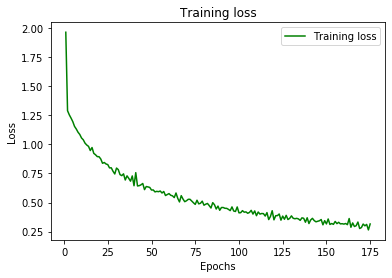

In [35]:
# Plot the loss vs the number of epoch
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

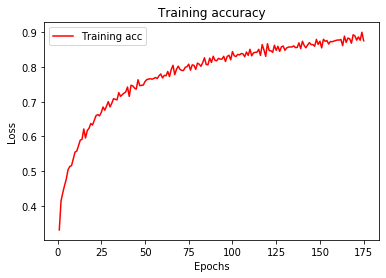

In [36]:
# Plot the training accuracy vs the number of epochs

acc_values = history_dict['accuracy'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
# Output (probability) predictions for the test set 
y_hat_test = model.predict(test)
len(y_hat_test)

20426

In [38]:
# Print the loss and accuracy for the training set 
results_train = model.evaluate(train, label_train)
results_train

81707/81707 [==============================] - 14s 167us/step


[0.24616399902655203, 0.9096160531044006]

In [39]:
# Print the loss and accuracy for the test set 
results_test = model.evaluate(test, label_test)
results_test

20426/20426 [==============================] - 3s 168us/step


[0.4839462114281534, 0.821159303188324]

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
#save model
model.save('model.h5')

In [42]:
# load model
model = load_model('model.h5')

In [198]:
def initialize():
    '''Loads model and tokenizer.'''

    # load model
    model = load_model('model.h5')

    # load tokenizer
    file = open('tokenizer.pickle', 'rb') 
    tokenizer = pickle.load(file)
    
    return model, tokenizer

In [176]:
def lemmatize(data):
    '''With raw text data passed in as a single array, will return
    each word with each sentence and its punctuation lemmatized'''
    wnl = WordNetLemmatizer()
    processed = ' '.join(data.splitlines())
    tokens = [word for sent in nltk.sent_tokenize(processed) for word in nltk.word_tokenize(sent)]
    lemmas = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            lemmas.append(wnl.lemmatize(token))
        else:
            lemmas.append(token)
    return lemmas

In [177]:
def preprocessing(para):
    '''Loads stopwords to be used, splits data up into managable chunks for the model, 
    lemmatizes input data, and vectorizes data.'''
    
    # loading stopwords (combination of elizabethan stopwords and nltk's english stopwords)
    file = open('stopwords.pickle', 'rb')
    stop_words = pickle.load(file)

    # generating paragraphs to evaluate based on full texts
    tt = TextTilingTokenizer(stopwords=stop_words)

    # ensure data passed in is a string
    para = str(para)
    
    try:
        # splitting data into smaller bits to pass into model
        print('Splitting input.')
        paragraph = tt.tokenize(para)
        # text processing -lemmatizing to pass into model
        print('Processing input.')
        lemmas = lemmatize(paragraph)
    except ValueError:
        # text processing -lemmatizing to pass into model
        print('Processing input.')
        lemmas = lemmatize(para)

    print('Returning data.')
    # vectoring
    one_hot_results= tokenizer.texts_to_matrix([lemmas], mode='tfidf') 

    return one_hot_results

In [200]:
model, tokenizer = initialize()

In [66]:
fake_para = 'Keras is a simple and powerful Python library for deep learning.\nGiven that deep learning models can take hours, days and even weeks to train, it is important to know how to save and load them from disk.\nIn this post, you will discover how you can save your Keras models to file and load them up again to make predictions.'

In [180]:
science_art = 'Scientists have resurrected a purple-blue hue that had been lost to time.\nCalled folium, this watercolor had been used to paint images on the pages of medieval manuscripts. But long ago, it fell out of use. Now scientists have tracked down folium’s source to a plant. They’ve also mapped out the molecule that produces its blue hue./nSuch chemical information can be key to conserving art. “We want to mimic these ancient colors to know how to … preserve them,” explains Maria Melo. She works at Universidade Nova de Lisboa in Caparica, Portugal. There she studies ancient art and how to preserve or restore it. To unmask folium’s identity, her team had to first find out where it came from./nThe pigment hadn’t been used for centuries. Everyone who knew how to prepare it had died long ago. So the researchers turned to books from the 1400’s and found one that described the plant that was its source. That led them on a scavenger hunt to find living specimens of this plant.'

In [210]:
def model_predict(text):
    '''Passes preprocessed text into model and classifies text, returning approximate lexile level.'''
    file = open('labels.pickle', 'rb')
    classes = pickle.load(file)
    file.close()
    for index, value in enumerate(model.predict(preprocessing(text))[0]):
        if value > 0.70:
            print('Lexile Found!')
            found_lexile = classes[index]
            if found_lexile == classes[0]:
                to_post = 'This text is suitable for early elemetary aged readers. The lexile range for this text is from 0 to 650L.'
            elif found_lexile == classes[3]:
                to_post = 'This text is suitable for late elementary aged readers. The lexile range for this text is from 650L to 1050L.'
            elif found_lexile == classes[1]:
                to_post = 'This text is suitable for middle school aged readers. The lexile range for this text is from 1050L to 1200L.'
            else:
                to_post = 'This text is suitable for high school aged readers. The lexile range for this text is from 1200L to 1400L.'
            break
        elif value > 0.3:
            found_lexile = classes[index]
            if found_lexile == classes[0]:
                to_post = 'This text is most similar to texts suitable for early elemetary aged readers. The lexile match is closet to the range 0 to 650L.'
            elif found_lexile == classes[3]:
                to_post = 'This text is most similar to texts suitable for late elementary aged readers. The lexile match is closet to the range 650L to 1050L.'
            elif found_lexile == classes[1]:
                to_post = 'This text is most similar to texts suitable for middle school aged readers. The lexile match is closet to the range 1050L to 1200L.'
            else:
                to_post = 'This text is most similar to texts suitable for high school aged readers. The lexile match is closet to the range 1200L to 1400L.'
            break
        elif index > 3:
            to_post = 'No lexile match'
        else:
            print('Reevaluating.')
    return to_post

In [211]:
model_predict(science_art)

Splitting input.
Processing input.
Returning data.
Reevaluating.
Lexile Found!


'This text is suitable for middle school aged readers. The lexile range for this text is from 1050L to 1200L.'

In [212]:
more_science_art='They enlisted the help of a botanist, a scientist who studies plants. The team landed on Chrozophora tinctoria (Croh-ZOFF-or-uh Tink-TOR-ee-uh). They found this tiny herb with silvery-green leaves in a village in south Portugal. It was growing along roadsides and in fields after harvest. The team gathered its pebble-sized fruit with care.\nBack in the lab, the scientists extracted the pigment with the help of a medieval text on colors. “It’s very specific,” notes Paula Nabais. She’s a conservation scientist who was part of the research team. “So we were able to use that recipe [and] reproduce it.” Nabais also works at Universidade Nova de Lisboa.\n“That’s pretty cool to have done that work of looking in the historical recipes and traveling back in time,” says Francesca Casadio. She’s a chemist and museum scientist at the Art Institute of Chicago in Illinois. Casadio, who was not part of this study, says the new work is a good example of what’s called experimental archaeology. It recreates an ancient process. By making the dye, the scientists could study its chemistry without experimenting on priceless works of art, she points out.\nThe researchers used many techniques to analyze the dye and identify its chemical structure. They reported how they did it April 17 in Science Advances. They also simulated how light interacts with the candidate molecule. That helped the scientists check whether the structure would give them the blue they desired.\nKnowing a paint’s chemistry helps conservation scientists know how to preserve art that used it. For instance, these data might be used to slow a paint’s degradation. Or if the piece needs to be restored, museum scientists can find compatible pigments. “This is absolutely vital to conservation,” says Mark Clarke. He’s a conservation scientist at Universidade Nova de Lisboa. He was not part of this team but has studied folium before.\nFolium had presented scientists with a difficult chemistry puzzle. “People have been tinkering with [this dye] since the ‘30s and they’ve finally cracked it,” he says.\nThis team succeeded because it brought together experts from fields as diverse as chemistry, botany and medieval literature. In the end, Clarke says, you’ve got “new science from old books.” And, he adds, these very modern things are being used to answer “very old problems.”'

In [213]:
model_predict(science_art + more_science_art)

Splitting input.
Processing input.
Returning data.
Reevaluating.
Lexile Found!


'This text is suitable for middle school aged readers. The lexile range for this text is from 1050L to 1200L.'

In [214]:
bubbles = 'Bubbles are everywhere. You just need to know where to look. There’s the obvious place — the soap bubbles in your bath. There are also bubbles in your body. They’re responsible for your cracking knuckles. The gems in a ring might have bubbles, called inclusions. Going farther out, humpback whales use bubbles to hunt. And scientists figured out a way to heal wounds with bubbles.\nBut the best bubbles, at least on a sunny summer day, are probably the bubbles you blow in your own backyard. Scientists have found these bubbles to be alluring, too. They’ve figured out the best way to blow perfect bubbles, and the secret recipe for making huge ones. They’ve also listened in on bubble bursts to figure out the physics that underlie the gentle “pfttt” that accompanies a bubble’s demise.'

In [215]:
model_predict(bubbles)

Splitting input.
Processing input.
Returning data.
Reevaluating.
Lexile Found!


'This text is suitable for middle school aged readers. The lexile range for this text is from 1050L to 1200L.'

In [216]:
science_method = "The basic scientific method includes the steps scientists use and follow when trying to solve a problem or prove or disprove a theory. The methods are used by scientists all over the world. This is done so scientists can work together to solve some of the same problems.\nThere are usually five steps which are a part of the scientific method. The steps can occur in any order, but the first step is usually observation. An observation is the use of one or more of the five senses, which include seeing, hearing, feeling, smelling, and tasting. The five senses are used to learn about or identify an event or object the scientist wants to study. For example, while observing a spider a scientist may observe the pattern or size of the spider's web.\nThe second step of the scientific method is the question being researched, the hypothesis. It is the question that is turned into a statement about an event or object the scientist would like to research. A good hypothesis includes three things: The explanation for the observations, it is able to be tested by other scientists, and it will usually predict new outcomes or conclusions. The scientist observing the spider building the web may have a question about the strength of the web. An example of the hypothesis might be: The larger the spider, the stronger the web. This hypothesis includes the explanation for the observation, it can be tested, and new conclusions may be reached.\nThe third step of the scientific method is the experiment. An experiment is a test which will either challenge or support the hypothesis. The hypothesis will then be true or false. Using the spider hypothesis, a scientist may experiment by measuring spider webs in relation to a spider's size. Often, even when a hypothesis is disproved much can still be learned during the experiment. For example, while measuring the strength of spider webs the scientist may discover something new about them.\nThe final step in the scientific method is the conclusion. The conclusion will either clearly support the hypothesis or it will not. If the results support the hypothesis a conclusion can be written. If it does not support the hypothesis, the scientist may choose to change the hypothesis or write a new one based on what was learned during the experiment. In the example, if the scientist proves that larger spiders build stronger webs, then that is the conclusion. If it was not proven, the scientist may change the hypothesis to: The size of a spider does has no bearing on the strength of its web.\nThe scientific method is used for simple experiments students may do in the classroom or very complex or difficult experiments being done all over the world. The spider experiment may be done by any scientist in the world.\nIn summary, the scientific method includes the steps scientists use to solve a problem or to prove or disprove a theory. There are four basic steps involved with the scientific method. The usual steps include observation, hypothesis, experiment, and conclusion. The steps may not always be completed in the same order. Following the four steps, the results of the experiment will either support the hypothesis or will not support the hypothesis. Scientists are always free to change or write a new hypothesis and start the four steps all over again. The scientific method is used for simple experiments or for more difficult experiments."

In [217]:
model_predict(science_method)

Splitting input.
Processing input.
Returning data.
Lexile Found!


'This text is suitable for early elemetary aged readers. The lexile range for this text is from 0 to 650L.'

In [218]:
evolution = "In 1859, Charles Darwin published convincing evidence that species evolve. He further explained how this process occurs. From that evidence and explanation, we have what scientists and others call today, the Theory of Evolution.\nLike all scientific theories, the theory of evolution has developed through decades of scientific observations and experimentation. Today almost all scientists accept that evolution is the basis for the diversity of life on earth.\nAfter years of research and study, Darwin suggested that by surviving long enough to reproduce, populations have the opportunity to pass on favorable characteristics to offspring. Over time, these characteristics will increase in a population and the nature of that population will gradually change. Darwin called this process by which populations change in response to their environment natural selection.\nDarwin suggested that organisms differ from place to place because their habitats present different challenges to survival and reproduction. As a result, each species has evolved in response to their specific environment. This changing process in response to a particular environment is called adaption. Darwin concluded that the species in a particular place evolved from a species that previously lived there or that migrated from a nearby area.\nDarwin's evidence was based on the idea that in any population, individuals that are best suited to survive and do well in their environment will produce the most offspring. By doing so, the traits of that offspring will be passed on and become more common as each new generation arrives. Traits are the genetic characteristics that may be physical, such as hair color; or behavioral, such as birds building nests.'nScientist now know that genes are responsible for inherited traits. Therefore, certain forms of a trait become more common because more of the species carry the gene that is passed on. In other words, natural selection causes the frequency of genes in a population to increase or decrease over time.\nFossils offer the most direct evidence that evolution takes place. A fossil is the preserved or mineralized remains or imprint of an organism that lived past life-forms. Change over time, or evolution can be seen in the fossils. For example, fossil links have been found between fish and amphibians, between retiles and birds, and between reptiles and mammals. All of which add valuable evidence to the history of vertebrates./nToday, Darwin's theory of evolution is almost universally accepted by scientists as the best available explanation for the biological diversity on earth. Based on this supporting evidence, most scientist agree on the following three major points: 1) Earth is about 4.5 billion years old, 2) Organisms have inhabited earth for most of its history, and 3) All organisms living today evolved from earlier, simpler life-forms.\nIn summary, at age 22, Charles Darwin set off on a journey by the urging of his college professor on the naval voyage of the HMS Beagle that forever changed his life and the way people think of themselves. It was on this journey that evidence was collected to support what is universally accepted today as Darwin's Theory of Evolution."

In [219]:
model_predict(evolution)

Splitting input.
Processing input.
Returning data.
Lexile Found!


'This text is suitable for early elemetary aged readers. The lexile range for this text is from 0 to 650L.'

In [220]:
corona = "A letter, published in The New England Journal of Medicine (NEJM), warns of new-onset diabetes in COVID-19 patients.\nDr Abd Tahrani, Senior Lecturer in Metabolic Endocrinology and Obesity Medicine and NIHR Clinician Scientist; University of Birmingham, said:\,“The current evidence suggest that diabetes and poor glycaemic control are risk factors for severe COVID-19 and that COVID-19 might precipitate diabetes-related ketoacidosis. However, whether COVID-19 can increase the risk of developing diabetes mellitus remains unknown and the correspondence published at NEJM provides plausible mechanisms for a bi-directional relationship between diabetes and COVID-19. Hence, it is important to examine these complex interactions between diabetes and COVID-19 further and the setting up of the global registry CoviDIAB is an important step in that regards. However, for now and till further evidence is available, it is important that we improve glycaemic control in people with diabetes to reduce the risk of severe COVID-19 as well as working on strategies that prevent the development of Type 2 diabetes.  An essential step in that direction is treating people with obesity and making obesity treatments (from life style interventions to bariatric surgery) available to patients with obesity that require treatment nationally as current treatment option availability is post code lottery.” \nDr Gabriela da Silva Xavier, Senior Lecturer in Cellular Metabolism, University of Birmingham, said:\n“The three papers that were cited to support the need for further research represents one case study describing the case of one patient with new onset diabetes and two papers describing larger cohorts with diabetes where the disease may have been aggravated by COVID-19.  None of the studies cited explicitly describe diabetes brought on by COVID-19.\n“One of the cited papers provides circumstantial evidence for potential damage of the cells that produce insulin, the pancreatic beta cells, by SARS, not COVID-19.\n“Taken together, it is currently unclear whether COVID-19 is causal for diabetes, but there is some correlation with worsening of disease with COVID-19.  It is, therefore, logical to want to investigate whether COVID-19 is causal for or exacerbates diabetes by establishing a registry where patient history of diabetes is systematically logged, as proposed in the letter. \n“In short it would be unfair to take the cited data to indicate that COVID-19 is causal of diabetes and diabetes complications but, given the observations, it is reasonable to propose to look at this carefully, as proposed in the letter.”\nProf Naveed Sattar, Professor of Metabolic Medicine, University of Glasgow, said:\n“This is definitely an important question that many doctors are watching but we need to see what happens to diabetes rates over the next 1-2 years to confirm or refute such risks.  We will certainly get these data as all national datasets are keeping close watch.  In meantime, people should be encouraged to keep active and eat healthily or as best they can to keep their weights stable or to lose a few pounds to lessen their risks of diabetes now (and in the future) and potentially to reduce their risks of developing more severe COVID-19 should then succumb to the infection. That is the best we can do and we need more governmental help to promote and make healthier lifestyles easier as we come out of lockdown.”  \nDr Riyaz Patel, Associate Professor of Cardiology & Consultant Cardiologist, UCLH, said:\n“There is no robust data yet to indicate that COVID-19 causes new diabetes or worsens existing diabetes. Some data however suggests there could be a possible link so researchers are seeking to explore this further.\n“Observational data linking the two may be confounded for a few reasons. For example we know that any stress inducing illness can cause blood sugar levels to temporarily rise and we see this for example with heart attacks. Also people who are more likely to get very sick with covid may be at risk of developing diabetes anyway perhaps because they are overweight. We know that obesity is linked to worse outcomes with COVID.\n“However there are many uncertainties about COVID, how it affects our cells and especially the longer term effects after surviving the illness. The researchers are experts in diabetes and propose to study this in more detail by collecting data at scale internationally. If there is a direct link then that will have important implications on how we treat COVID patients during and after the acute illness.\nProf Lora Heisler, Chair in Human Nutrition, University of Aberdeen, said:\n“Information collected about people who have unfortunately caught highly contagious COVID-19 has shown that some people are at more risk of developing more serious symptoms and particularly upsetting, at greater risk of not surviving if they get COVID-19.  This higher risk group includes older folks and those who already have diseases, including type 2 diabetes.  What isn’t clear is why people who already have type 2 diabetes are at greater risk for more serious symptoms and possible fatality from COVID-19.  Since COVID-19 is so new, scientists and doctors just don’t know.  Some positive news was reported by Hongliang Li earlier this month in the journal Cell Metabolism.  They found that people with type 2 diabetes with better management of their blood sugar had a better outcome with COVID-19 as compared to patients with poorer control of their blood sugar. \n“What is really important about this new initiative is that it is asking a different question – does COVID-19 trigger diabetes, either type 1 or type 2, in people who did not have diabetes before getting COVID-19?  To begin to answer this, these experts are establishing a Global Registry –  or a list – of new cases of diabetes in patients with COVID-19.  This registry is a great first step in trying to answer this question.  A challenge, however, will be trying to figure out whether the diabetes is actually new before COVID-19 because some people may have undiagnosed diabetes.  Even still, this registry will provide very valuable information about the emerging association between these two diseases.”"

In [221]:
model_predict(corona)

Splitting input.
Processing input.
Returning data.
Reevaluating.
Lexile Found!


'This text is suitable for middle school aged readers. The lexile range for this text is from 1050L to 1200L.'

In [222]:
perception = "Scientists’ Perception of a “Gap” The notion of a gap between science and the media may not be a valid description of the science–media interface if it is taken to mean a gap separating scientists and journalists, with scientists standing on one side and journalists on the other. As shown later, scientists and journalists seem to get along together quite well. However, as a metaphor to describe a separation of “arenas” of internal scientific and public communication, it captures some important aspects of public science communication. According to this view, scientists are communicators in each of the two arenas,which are structured by different institutions and governed by different rules. Scientists in the “public arena”—an arena still ultimately structured by journalistic mass media—have to adjust to the logic of the media to attract attention.\nSurvey data presented later suggest that the majority of scientists do actually distinguish clearly between the arenas of internal scientific and public communication as far as journalistic mass media are concerned. This distinction has at least two aspects: the exclusion of the public from communication dealing with knowledge creation and validation, and the conceptualization of scientific knowledge as “special knowledge.” Both distinctions lead to a communication pattern that is usually labeled “popularization,” i.e., the use of selected, simplified, sensationalized, and pedagogically tailored messages when addressing the general public. These messages systematically differ from the content of the internal scientific discussion without being completely detached from it (40). Dissemination of “science reconstructed for public consumption” (41) is thus seen as a follow-up step after scientific results have been achieved.\nEmpirically, we find evidence of both aspects of demarcation of public communication from internal scientific communication in the surveys mentioned earlier. More than half of US neuroscientists and more than 60% of German neuroscientists perceive the so-called Ingelfinger rule (42) as still effective. According to that rule, “acceptance of a publication by a scientific journal [is] threatened if the research results have already been reported in the mass media” (Table 1). The data also suggest that this rule is not simply imposed on reluctant scientists by jealous journal editors attempting to protect the exclusivity of the content of their journals, but that it actually conforms to scientific norms, in particular those of the biomedical research community. In the fivecountry study of biomedical researchers in 2005 mentioned earlier, 71% to 83% of the respondents agreed that “scientists should communicate research findings to the general public only after they have been published in a scientific journal.” In another study, leading US nanoresearchers also tended to agree with that statement (35). Approximately half of the neuroscientists and scientists at large surveyed in Germany and the United States in 2011 to 2012 disagree with the demand that scientists, if asked, should “provide information about current research or research that has not yet appeared in scientific publications” (Table 1). Perhaps most relevant as an indicator of a respective norm, 48% of German scientists, 57% of German neuroscientists, and 69% of US neuroscientists think it is an important condition that makes talking to the media about research results acceptable to their peers, namely that these results have been previously published in a scientific journal (Table 1)."

In [223]:
model_predict(perception)

Splitting input.
Processing input.
Returning data.
Reevaluating.
Lexile Found!


'This text is suitable for middle school aged readers. The lexile range for this text is from 1050L to 1200L.'

In [224]:
act_passage = "Of all the numerous enemies of the honey-bee, the Bee-Moth (Tinea mellonella), in climates of hot summers, is by far the most to be dreaded. So widespread and fatal have been its ravages in this country that thousands have abandoned the cultivation of bees in despair, and in districts which once produced abundant supplies of the purest honey, bee-keeping has gradually dwindled down into a very insignificant pursuit. Contrivances almost without number have been devised to defend the bees against this invidious foe, but still it continues its desolating inroads, almost unchecked, laughing as it were to scorn at all the so-called “moth-proof” hives, and turning many of the ingenious fixtures designed to entrap or exclude it into actual aids and comforts in its nefarious designs."

In [225]:
model_predict(act_passage)

Splitting input.
Processing input.
Returning data.
Reevaluating.


'This text is most similar to texts suitable for middle school aged readers. The lexile match is closet to the range 1050L to 1200L.'

In [219]:
def count_vectorize(data, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(data))
    
    word_dict = {i:0 for i in unique_words}
    
    for word in data:
        word_dict[word] += 1
    
    return word_dict

In [220]:
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [80]:
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    # Iterate through list of dfs and add index to vocab_set
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab_set}
    
    # Loop through each word in full_vocab_dict
    for word, val in full_vocab_dict.items():
        docs = 0
        
        # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if word in d:
                docs += 1
        
        # Now that we know denominator for equation, compute and set IDF value for word
        
        full_vocab_dict[word] = np.log((len(list_of_dicts)/ float(docs)))
    
    return full_vocab_dict

In [64]:
def tf_idf(list_of_dicts):
    # Create empty dictionary containing full vocabulary of entire corpus
    doc_tf_idf = {}
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    # Create tf-idf list of dictionaries, containing a dictionary that will be updated for each document
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in list_of_dicts:
        doc_tf = term_frequency(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    
    return tf_idf_list_of_dicts

In [221]:
def main(filenames):
    # Iterate through list of filenames and read each in
    count_vectorized_all_documents = []
    for file in filenames:
        raw_data = file.splitlines()
        # Clean and tokenize raw text
        tokenized = tokenize(raw_data)
        
        # Get count vectorized representation and store in count_vectorized_all_documents  
        count_vectorized_document = count_vectorize(tokenized)
        count_vectorized_all_documents.append(count_vectorized_document)
    
    # Now that we have a list of BoW respresentations of each song, create a tf-idf representation of everything
    tf_idf_all_docs = tf_idf(count_vectorized_all_documents)
    
    return tf_idf_all_docs

In [84]:
num_dims = len(tf_idf_all_docs[0])
print("Number of Dimensions: {}".format(num_dims))

Number of Dimensions: 172702


In [85]:
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]

[0.0001167405709233649,
 0.00010966426228220272,
 3.6933587751607945e-06,
 1.522105958376205e-07,
 3.8118192468340294e-05,
 2.725276976449104e-05,
 9.037397974179912e-06,
 7.386717550321589e-06,
 8.489414829332928e-08,
 2.4042861310956603e-05]

In [87]:
# for visualization
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d

array([[-111.40537   ,   47.300793  ,   21.838274  ],
       [  85.7389    ,   32.539722  ,  -38.156727  ],
       [ 103.32683   ,    1.0667629 ,  -67.78644   ],
       [  64.91214   ,  -22.351534  ,   87.86254   ],
       [  -9.342592  ,    0.19844949,  -23.50951   ],
       [ -44.480457  ,  107.53309   ,   42.296993  ],
       [  38.75074   ,  117.904785  ,  -17.328749  ],
       [ -44.42687   ,   16.238974  ,   38.428528  ],
       [  66.457085  ,  104.64825   ,   14.912856  ],
       [ -20.690498  ,   -5.5475593 ,  -76.0181    ],
       [  10.071681  ,    9.620786  ,   50.872505  ],
       [ -55.97351   ,  -18.443426  ,   99.216835  ],
       [ -85.50403   ,   89.370995  ,  -35.941616  ],
       [  -3.493172  ,  -56.70975   ,   -3.3378894 ],
       [ -29.75462   ,  -30.326687  ,   23.967226  ],
       [   4.813328  ,   19.025925  ,  -58.870857  ],
       [ -36.458553  ,  -51.23837   ,  -65.08172   ],
       [ 137.58379   ,   18.324486  ,  -43.51771   ],
       [ -65.93308   ,   52.

In [88]:
# for visualization
t_sne_object_2d = TSNE(n_components=2)
transformed_data_2d = t_sne_object_2d.fit_transform(tf_idf_vals_list)
transformed_data_2d

array([[ 1.6336211 , -0.6645062 ],
       [ 1.6334335 , -0.6638181 ],
       [ 1.6330639 , -0.6611795 ],
       [ 1.6330651 , -0.66378254],
       [ 1.6332344 , -0.6637379 ],
       [ 1.6334339 , -0.67498606],
       [ 1.6337028 , -0.6638484 ],
       [ 1.6333034 , -0.6642064 ],
       [ 1.6334901 , -0.66134053],
       [ 1.6330651 , -0.6637837 ],
       [ 1.6331373 , -0.663061  ],
       [ 1.6336162 , -0.6622454 ],
       [ 1.6332356 , -0.66286963],
       [ 1.6330906 , -0.66584384],
       [ 1.6330643 , -0.6609426 ],
       [ 1.633193  , -0.6632854 ],
       [ 1.6331931 , -0.66330516],
       [ 1.6331946 , -0.6626391 ],
       [ 1.6337029 , -0.6638218 ],
       [ 1.6330856 , -0.664505  ],
       [ 1.633066  , -0.6637808 ],
       [ 1.6330856 , -0.6645052 ],
       [ 1.6333015 , -0.66420984],
       [ 1.6331373 , -0.66306704],
       [ 1.6330642 , -0.66092384],
       [ 1.633066  , -0.6637869 ],
       [ 1.633288  , -0.664212  ],
       [ 1.6330662 , -0.66381943],
       [ 1.6337028 ,

predictive text

split data into what's being passed in

train test split (for new data exclude test from tokenize) (for smaller dataset include test in tokenizer) 
(train test validate split (https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn))

tokenize

fit transform on training, transform only on the test


google collab for cloud gpu ($10/month, daily allocation for free)

## Lexile Level Interpretation

In [30]:
grade_df = pd.read_csv('Lexile levels by grade.csv')
grade_df

Unnamed: 0    50th   90th
0           K  BR160L   150L
1           1    165L   570L
2           2    425L   795L
3           3    645L   985L
4           4    850L  1160L
5           5    950L  1260L
6           6   1030L  1340L
7           7   1095L  1410L
8           8   1155L  1470L
9           9   1205L  1520L
10         10   1250L  1570L
11         11   1295L  1610L
12         12   1295L  1610L

# Future Work

sonority sequencing from nltk